# Assignment Overview


## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.

---
#### Imports and Data Loading
- Import pandas, numpy, matplotlib, seaborn, os and warnings
- Load the data into dataframes
- Display the first 5 rows of each dataframe and the shape
- Merge dataframes (preliminary step for some data quality tests)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import skew, kurtosis, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDRegressor
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import warnings

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_rows", 100)
warnings.filterwarnings("ignore")
random_seed = 30  # for reproducible results in plotting the scatter plots and training the models with Stochastic Gradient Descent

In [2]:
df_customer = pd.read_csv("ABC_df_customer.csv", index_col=0)
print("*" * 150 + "\ndf_customer:")
display(df_customer.head())
print("\nShape:", df_customer.shape)
print("\nDTypes:")
display(df_customer.dtypes)
print("\nBasic Stats:")
display(df_customer.describe())

df_demographic = pd.read_csv("ABC_df_demographic.csv", index_col=0)
print("\n" + "*" * 150 + "\ndf_demographic:")
display(df_demographic.head())
print("\nShape:", df_demographic.shape)
print("\nDTypes:")
display(df_demographic.dtypes)
print("\nBasic Stats:")
display(df_demographic.describe())

df_termination = pd.read_csv("ABC_df_termination.csv", index_col=0)
print("\n" + "*" * 150 + "\ndf_termination:")
display(df_termination.head())
print("\nShape:", df_termination.shape)
print("\nDTypes:")
display(df_termination.dtypes)
print("\nBasic Stats:")
display(df_termination.describe())

******************************************************************************************************************************************************
df_customer:


,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,221300017872.00,521300005982.00,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.88,518.00,411
1,221300134410.00,521300051115.00,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.20,558.42,414
2,221300673028.00,521300247929.00,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.38,701.65,442
3,221301573419.00,521300570147.00,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.41,401.52,463
4,221301622347.00,521300588399.00,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.63,772.86,366



Shape: (2303124, 9)

DTypes:


INDIVIDUAL_ID             float64
ADDRESS_ID                float64
CUST_ORIG_DATE             object
DATE_OF_BIRTH              object
SOCIAL_SECURITY_NUMBER     object
CUST_START_DATE            object
CURR_ANN_AMT_CAR          float64
CURR_ANN_AMT_HEALTH       float64
CURR_ANN_AMT_HOUSE          int64
dtype: object


Basic Stats:


,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
count,2303123.00,2303123.00,2303124.00,2303124.00,2303124.00
mean,221301774743.98,521300683848.64,1431.07,572.53,429.32
std,991526.85,417065.34,243.93,189.67,76.06
min,221300000002.00,521300000001.00,286.96,-351.62,90.00
25%,221300910808.00,521300334851.50,1264.83,444.21,377.00
50%,221301810068.00,521300656162.00,1425.76,572.02,427.00
75%,221302713575.50,521300983454.00,1591.79,700.13,479.00
max,221303307753.00,521301537317.00,2769.37,1617.53,887.00



******************************************************************************************************************************************************
df_demographic:


,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,221302803089.00,187500.00,1.00,8.00,Single,300000 - 349999,1,1,1,Y
1,221303165601.00,63750.00,0.00,0.00,Single,NaN,0,0,0,N
2,221303160257.00,41250.00,0.00,15.00,Married,75000 - 99999,1,0,1,N
3,221303153810.00,120558.26,0.00,0.00,NaN,1000 - 24999,1,0,0,N
4,221303153255.00,187500.00,0.00,0.00,NaN,NaN,0,0,1,Y



Shape: (2112579, 10)

DTypes:


INDIVIDUAL_ID          float64
INCOME                 float64
HAS_CHILDREN           float64
LENGTH_OF_RESIDENCE    float64
MARITAL_STATUS          object
HOME_MARKET_VALUE       object
HOME_OWNER               int64
COLLEGE_DEGREE           int64
GOOD_CREDIT              int64
ADVANCED_STUDIES        object
dtype: object


Basic Stats:


,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
count,2112579.00,2112579.00,2112579.00,2112579.00,2112579.00,2112579.00,2112579.00
mean,221301774808.14,120558.26,0.47,6.80,0.70,0.30,0.82
std,991620.71,75041.65,0.59,5.09,0.46,0.46,0.38
min,221300000002.00,7500.00,0.00,0.00,0.00,0.00,0.00
25%,221300910499.00,71250.00,0.00,2.00,0.00,0.00,1.00
50%,221301810238.00,120558.26,0.00,6.80,1.00,0.00,1.00
75%,221302713815.00,131250.00,1.00,11.00,1.00,1.00,1.00
max,221303307753.00,375000.00,6.00,15.00,1.00,1.00,1.00



******************************************************************************************************************************************************
df_termination:


,INDIVIDUAL_ID,SUSPD_DATE
0,221302577308.00,2022-10-09
1,221302825760.00,2022-04-24
2,221302678990.00,2022-05-21
3,221300210549.00,2022-04-27
4,221302553479.00,2022-09-16



Shape: (269259, 2)

DTypes:


INDIVIDUAL_ID    float64
SUSPD_DATE        object
dtype: object


Basic Stats:


,INDIVIDUAL_ID
count,269259.00
mean,221301768048.43
std,989098.67
min,221300000013.00
25%,221300906119.00
50%,221301798678.00
75%,221302699189.00
max,221303307749.00


In [3]:
# The dataframes will be joined using left join on df_customer, since it
# has the higher shape[0] value
df_merged = df_customer.merge(
    right=df_demographic, how="left", on="INDIVIDUAL_ID"
)
df_merged = df_merged.merge(
    right=df_termination, how="left", on="INDIVIDUAL_ID"
)
display(df_merged.head())
print("\nShape:", df_merged.shape)

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE
0,221300017872.00,521300005982.00,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.88,518.00,411,33750.00,2.00,15.00,Married,50000 - 74999,1.00,1.00,1.00,N,NaN
1,221300134410.00,521300051115.00,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.20,558.42,414,41250.00,0.00,2.00,Single,50000 - 74999,1.00,0.00,0.00,N,NaN
2,221300673028.00,521300247929.00,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.38,701.65,442,63750.00,0.00,10.00,Married,75000 - 99999,1.00,0.00,0.00,N,NaN
3,221301573419.00,521300570147.00,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.41,401.52,463,187500.00,2.00,6.00,Married,175000 - 199999,1.00,0.00,1.00,N,2021-12-22
4,221301622347.00,521300588399.00,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.63,772.86,366,131250.00,1.00,4.00,Married,225000 - 249999,1.00,1.00,1.00,Y,NaN



Shape: (2303124, 19)


---
#### Data Quality Dimensions
In order to measure Data Quality in the multiple datasets, the following data quality dimensions will be considered:
1. **Completeness**: Data values are present;
    - Compute number of NaNs in each dataset, by column & row, total and percentages
    - Compute number of NaNs of the merged dataset, by column & row, total and percentages
    
2. **Consistency**:  Data satisfies constraints (format, allowable ranges and values, domain rules);
    - Evaluate Current Dtypes and Formats
    - Test Consistency of datetime variables - CUST_ORIG_DATE must be smaller than CUST_START_DATE, DATE_OF_BIRTH must be earlier than both, SUSPD_DATE must be later than all previous dates and all dates need to be earlier the current date
    - Calculate the min, max, mean, and median values of numerical variables
    - Compute the value counts of categorical variables
    - Check the distribution, namely if it fits any distribution type and if it has excessive skewness and/or kurtosis; perform Shapiro-Wilk test
    - Compute Outliers

3. **Uniqueness**: Records representing a single customer are not replicated;
    - Look for repeat entries based on the INDIVIDUAL_ID variable

4. **Timeliness**: Data is up-to-date to their real-world state for the task in hand;
    - Based on the date time variables, check if the data refers to old customers or current customers
    
Other data quality measures - **Correctness**, **Stability**, **Relevance**, **Contextualization** and **Trustworthiness** - are either irrelevant or unfeasible to test, so we will assume they have good quality and no measures will be computed for them.

---

#### Issues Found:
The implementation of the fixes to the problems below will be detailed along the code. Only minimal cleaning that allows us to perform EDA tasks will be done. Any specific cleaning required for model building (e..g normalization of scales) should be done in Feature Engeneering.

- Significant number of NaNs in CUST_START_DATE, MARITAL_STATUS and HOME_MARKET_VALUE. NaNs can negatively affect descriptive analysis, since NaNs are excluded from calculations such as the mean and variance and are not represented in distributions; and ML models since NaNs limit the usable dataset (either rows or variables) and therefore introduce bias to the models, and may even cause training errors in models that cannot handle NaNs directly. There were also found lots of NaNs in the demographic variables after merging the data sources, due to customers present in df_customer not being in df_demographic. These NaNs can also have the effect mentioned on the analysis.

- Unusuable data formats for the time variables - CUST_ORIG_DATE, DATE_OF_BIRTH, CUST_START_DATE and SUSPD_DATE -, the categorical variables -  MARITAL_STATUS and ADVANCED_STUDIES - and the numerical variable HOME_MARKET_VALUE. Since these were formatted as strings, any statisical analysis and predictive model building would be impossible, as the used methods don't work with this format. Other innacurate dtypes were also detected and fixed, although they wouldn't affect the analysis.

- 194930 rows (8.46%) have inconsistent dates. However, since it is unlikely that dates will be included in the type of analysis we will conduct (building predictive models). Most likely, we will use the DATE_OF_BIRTH variable into the model, after converted to age. When focused on DATE_OF_BIRTH, the number of inconsistencies was only 884 rows (0.04%), so we can remove these faulty entries.

- The numerical variables analyzed seem to have differences in scale. For example, CURR_ANN_AMT_CAR ranges from 286.96 to 2769.37, while HOME_MARKET_VALUE ranges from 12999.50 to 1000000.00. If we feed these variables into a predictive model without normalizing the scale, the model will be more sensitive to changes of the variable with the bigger scale, and therefore be biased.

- The reformatted DATE_OF_BIRTH date value into age has a max value of 116, meaning some entries include customers that most probably are no longer alive. Still, the information is still relevant for the correlations, so any step to remove these entries should go on feature engeneering.

- The numerical variable CURR_ANN_AMT_HEALTH has a min value of -351.62. Further tests showed also that a lot of values, though positive, are in the low double digits, which is suspicious when considering the values of CURR_ANN_AMT_CAR and CURR_ANN_AMT_HOUSE. 14176 values (0.62%) are either negative or in positive double digits. These values can missrepresent the distribution of the yearly health insurance payments and produce predictive models that don't reflect reality. Since very little rows are affected, we can remove the problematic entries (below the first percentile).

- INCOME and LENGHT_OF_RESIDENCE have non-normal and non-continuous distributions. This can affect statistical analysis, as analysis involving Confidence Intervals and Hypothesis Testing or ML models like Gaussian Naive Bayes and Linear Regression assume features have a Normal distribution.

- There are 22336 (0.98%) duplicated customers in df_customer. Duplicates increase the weight of certain observations over others in the dataset, which missrepresents the reality and produces bad statistical results and predictive models. Luckily, only a small percentage of the data is duplicated, so after removing it we still have healthy dataset. One thing to notice, is that the duplicate INDIVIDUAL_IDs only have one thiung different from each other, which is different CURR_ANN_AMT_HEALTH values. To solve the issue, only the first instance of the INDIVIDUAL_ID will be kept, since there is not clear pattern that explains the difference in CURR_ANN_AMT_HEALTH values.

---

#### Metrics Used & Results Detailed Along Code
---
#### Further EDA:
So far, we have only performed univariate EDA. In this section, we will be focused on Bivariate EDA. We will study relationships between variables through scatter plots correlations and cross tabulations. In next question's answer, the outcomes of this analysis will be organized and related to the business context.

---
##### 1. Completeness
 - There is a significant number of NaNs in the CUST_START_DATE column of df_customers and in MARITAL_STATUS and HOME_MARKET_VALUE of df_demographic. In df_merged, there is a lot of demographic information missing, meaning that some of the customers in df_customer don't have information available. Almost all rows (92.44%) have missing values, so disposing of the rows with any NaNs is not viable. It is also worthwhile to keep the information, though incomplete, to calculate correlations, and only after remove what is not used for the models. As for the SUSPD_DATE, we assume that any missing data simply means that the customer's policy hasn't been suspended.

 - For the CUST_START_DATE, we test how many times the CUST_START_DATE is equal to CUST_ORIG_DATE (after removing NaNs). The test showed the in almost 90% of cases, the values are equal. So, it is not problematic to solve the 4% of entries with NaN by substituting with the CUST_ORIG_DATE.

 - For  MARITAL_STATUS, we will leave the value as NaN, as there are too many NaN values to remove the rows affected. In case the Bivariate EDA shows this variable is very important, we may revisit this issue.

 - In the case of the HOME_MARKET_VALUE, after testing the relation between NaNs and the value of HOME_OWNER, we can see that most NaNs are when the customer is not a home owner, which would make sense. On the counterpart, only 6545 entries have missing market value and are of an home owner, so we can remove them without compromising the quality of the data.

 - We will also remove the row where both INDIVIDUAL_ID and ADDRESS_ID are NaN.

In [4]:
# Compute number of NaNs in each dataset, by column & row, total and percentages

def nan_stats(df: pd.DataFrame, print_output: bool = True) -> list:
    """
    Computes NaN statisitcs of 'df'
    
    Parameters
    ---------------
    df: pd.DataFrame
        Pandas dataframe used to compute the NaN statistics
    print_output: bool
        Boolean value with default value True, that determines whether
        the computed NaN statistics are printed when function is called
 
    Returns
    ---------------
    l_nan_stats: list
        A list with the NaN statistics. First position [0] will have the
        sum by column, second position [1] the number of rows with at
        least one NaN, third position [2] the percentage of rows with at
        least one NaN, forth [3] the total number of NaNs and fith [4]
        the percentage of NaN values in the dataframe
    
    """
    var_name = [name for name, value in globals().items() if value is df][0]
    temp_shape = df.shape
    temp_sum_col = df.isna().sum()
    temp_sum_row = sum(df.isna().sum(axis=1) > 0)
    temp_percent_row = round(100 * temp_sum_row / temp_shape[0], 2)
    temp_sum_all = temp_sum_col.sum()
    temp_percent_all = round(
        100 * temp_sum_all / (temp_shape[0] * temp_shape[1]), 2
    )

    if print_output:
        print("\n" + "*" * 150, "\nNaNs in {}:".format(var_name))
        display(temp_sum_col)
        print("Total Rows with NaNs:", temp_sum_row)
        print("Percentage of Rows with NaNs", str(temp_percent_row) + "%")
        print("Total NaNs:", temp_sum_all)
        print("Percentage of NaNs", str(temp_percent_all) + "%")
        return None

    l_nan_stats = [
        temp_sum_col, temp_sum_row, temp_percent_row, temp_sum_all,
        temp_percent_all
    ]
    return l_nan_stats

nan_stats(df_customer)
nan_stats(df_demographic)
nan_stats(df_termination)
nan_stats(df_merged)

n_completeness_old = nan_stats(df_merged, print_output=False)[3]
p_completeness_old = nan_stats(df_merged, print_output=False)[4]


****************************************************************************************************************************************************** 
NaNs in df_customer:


INDIVIDUAL_ID                 1
ADDRESS_ID                    1
CUST_ORIG_DATE                0
DATE_OF_BIRTH                 0
SOCIAL_SECURITY_NUMBER        0
CUST_START_DATE           91213
CURR_ANN_AMT_CAR              0
CURR_ANN_AMT_HEALTH           0
CURR_ANN_AMT_HOUSE            0
dtype: int64

Total Rows with NaNs: 91214
Percentage of Rows with NaNs 3.96%
Total NaNs: 91215
Percentage of NaNs 0.44%

****************************************************************************************************************************************************** 
NaNs in df_demographic:


INDIVIDUAL_ID               0
INCOME                      0
HAS_CHILDREN                0
LENGTH_OF_RESIDENCE         0
MARITAL_STATUS         431648
HOME_MARKET_VALUE      190205
HOME_OWNER                  0
COLLEGE_DEGREE              0
GOOD_CREDIT                 0
ADVANCED_STUDIES            0
dtype: int64

Total Rows with NaNs: 523935
Percentage of Rows with NaNs 24.8%
Total NaNs: 621853
Percentage of NaNs 2.94%

****************************************************************************************************************************************************** 
NaNs in df_termination:


INDIVIDUAL_ID       0
SUSPD_DATE       2693
dtype: int64

Total Rows with NaNs: 2693
Percentage of Rows with NaNs 1.0%
Total NaNs: 2693
Percentage of NaNs 0.5%

****************************************************************************************************************************************************** 
NaNs in df_merged:


INDIVIDUAL_ID                   1
ADDRESS_ID                      1
CUST_ORIG_DATE                  0
DATE_OF_BIRTH                   0
SOCIAL_SECURITY_NUMBER          0
CUST_START_DATE             91213
CURR_ANN_AMT_CAR                0
CURR_ANN_AMT_HEALTH             0
CURR_ANN_AMT_HOUSE              0
INCOME                     169439
HAS_CHILDREN               169439
LENGTH_OF_RESIDENCE        169439
MARITAL_STATUS             605334
HOME_MARKET_VALUE          361586
HOME_OWNER                 169439
COLLEGE_DEGREE             169439
GOOD_CREDIT                169439
ADVANCED_STUDIES           169439
SUSPD_DATE                2033964
dtype: int64

Total Rows with NaNs: 2128949
Percentage of Rows with NaNs 92.44%
Total NaNs: 4278172
Percentage of NaNs 9.78%


In [5]:
# Test to see how common is "CUST_START_DATE" == "CUST_ORIG_DATE"
temp_df = df_customer.dropna(subset="CUST_START_DATE").loc[
    df_customer["CUST_START_DATE"] == df_customer["CUST_ORIG_DATE"],
    ["CUST_START_DATE", "CUST_ORIG_DATE"]
]
display(temp_df.head())
print("Absolute Number:", temp_df.shape[0])
print("Percentage:", 
      str(round(100 * temp_df.shape[0] / df_customer.shape[0], 2)) + "%")

# Test the cause of NaNs in "HOME_MARKET_VALUE"
temp_df = df_demographic[df_demographic['HOME_MARKET_VALUE'].isna()].copy()
display(temp_df.head())
display(temp_df.value_counts(subset="HOME_OWNER"))

del temp_df

,CUST_START_DATE,CUST_ORIG_DATE
0,2018-12-09,2018-12-09
1,2018-01-02,2018-01-02
2,2009-09-23,2009-09-23
3,2022-07-25,2022-07-25
4,2006-10-11,2006-10-11


Absolute Number: 2056301
Percentage: 89.28%


,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
1,221303165601.00,63750.00,0.00,0.00,Single,NaN,0,0,0,N
4,221303153255.00,187500.00,0.00,0.00,NaN,NaN,0,0,1,Y
16,221301487702.00,105000.00,0.00,0.00,NaN,NaN,0,0,1,N
22,221300774055.00,71250.00,0.00,0.00,NaN,NaN,0,0,1,N
28,221301728054.00,41250.00,0.00,0.00,Single,NaN,0,0,1,N


HOME_OWNER
0    183660
1      6545
Name: count, dtype: int64

In [6]:
# Substitute the NaNs in CUST_START_DATE by the values in CUST_ORIG_DATE
df_customer.loc[
    df_customer["CUST_START_DATE"].isna(), "CUST_START_DATE"
] = df_customer.loc[df_customer["CUST_START_DATE"].isna(), "CUST_ORIG_DATE"]

# Remove the rows where customer is a home owner and home market value is NaN
df_demographic = df_demographic.loc[~(
    (df_demographic["HOME_OWNER"] == 1) & 
    (df_demographic["HOME_MARKET_VALUE"].isna())
)]

# Remove the entry with INDIVIDUAL_ID and ADDRESS_ID NaN
df_customer.drop(index=df_customer[df_customer['INDIVIDUAL_ID'].isna()].index, inplace=True)

---
##### 2. Consistency
- Incorrect Dtypes/Format found: 
    - INDIVIDUAL_ID, ADDRESS_ID, HAS_CHILDREN, LENGTH_OF_RESIDENCE, HOME_OWNER, COLLEGE_DEGREE and GOOD_CREDIT have floats instead of ints;

    - CUST_ORIG_DATE, DATE_OF_BIRTH, CUST_START_DATE and SUSPD_DATE have strings instead of datetime objects (will use pandas built-in datetime); After testing the consistency of the dates, these variables can be converted to age (better format for ML models);

    - MARITAL_STATUS has strings with 'Single' and 'Married' and ADVANCED_STUDIES has strings with 'Y' and 'N' instead of 0 and 1;

    - HOME_MARKET_VALUE expressed as a range in string format instead of a single numerical value. In some cases, the value is '1000000 Plus' instead of a range. Because only 2543 have that value, inputting 1000000 shouldn't introduce any meaningful bias.

    - HAS_CHILDREN has the number of children instead of a binary variable with 0 for no children and 1 for any children, as specified in the variable description

- Inconsistencies in datetime variables found:
    - 194930 rows, or 8.46% of the rows are not consistent. Due to the significant number of rows that have issues, we will not solve the issue for now. If the rest of the EDA reveals that one these variables would be important to include in a predictive model, we may revisit this issue;

    - We will just focus on the DATE_OF_BIRTH column, as it is most likely to be significant for our analysis. Only 884 rows are inconsistent, so we can remove them. Then, we can convert DATE_OF_BIRTH into age. 

- min, max, mean and median values of numerical variables:
    - Numerical variables analyzed have greatly different scales, but this issue should be address in Feature Selection;

    - CURR_ANN_AMT_HEALTH has a min value of -351.62 and 14176 (0.62%) values are either negative or in the double digits. By computing the mean values for other variables, such as income and other insurances annual payments, nothing out of the ordinary is observable. Since little rows are affected, we will remove all rows where values are below the first percentile, 133.85;

    - DATE_OF_BIRTH has a max value of 116, meaning some entries include customers that most probably are no longer alive. Still, the information is still relevant for the correlations, so any step to remove these entries should go on feature engeneering.

- Value counts of categorical variables:
    - No out of the ordinary values.
    
- Distribution & Outliers:
    - CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH and CURR_ANN_AMT_HOUSE distributions are normally shapped, with moderate values for skewness and kurtosis (with CURR_ANN_AMT_HEALTH being slightly more skewed to the right than the other two variables). The percentage of outliers is low;

    - DATE_OF_BIRTH has a normal distribution and low amount of outliers;

    - INCOME and LENGTH_OF_RESIDENCE seem to have non-normal non-continuous distributions, with INCOME having a slightly greater percentage of outliers than other numerical variables, higher skewness to the right and leptokurtic distribution, while HAS_CHILDREN LENGTH_OF_RESIDENCE has no outliers, has only a slight skewness to the right and is platykurtic;

    - All variables tested failed the Shapiro–Wilk test, but this test is vulnerable to large datasets and may not represent the truth about the normality of the data. Based on the histograms, only INCOME and LENGHT_OF_RESIDENCE are not normal. This problem will only be considered and fixed if these features are found to be important to the models that are going to be trained.

In [7]:
# Evaluate current dtypes and formats
print("df_customer:")
display(df_customer.head())
print(df_customer.dtypes)

print("\n" + "*" * 150 + "\ndf_demographic:")
display(df_demographic.head())
print(df_demographic.dtypes)

print("\n" + "*" * 150 + "\ndf_termination:")
display(df_termination.head())
print(df_termination.dtypes)

# Check specific variables showing as 'object' in dtypes
print("*" * 150)
print("CUST_ORIG_DATE:", type(df_customer.iloc[0]["CUST_ORIG_DATE"]))
print("DATE_OF_BIRTH:", type(df_customer.iloc[0]["DATE_OF_BIRTH"]))
print("SOCIAL_SECURITY_NUMBER:", type(df_customer.iloc[0]["SOCIAL_SECURITY_NUMBER"]))
print("CUST_START_DATE:", type(df_customer.iloc[0]["CUST_START_DATE"]))
print("MARITAL_STATUS:", type(df_demographic.iloc[0]["MARITAL_STATUS"]))
print("HOME_MARKET_VALUE:", type(df_demographic.iloc[0]["HOME_MARKET_VALUE"]))
print("ADVANCED_STUDIES:", type(df_demographic.iloc[0]["ADVANCED_STUDIES"]))
print("SUSPD_DATE:", type(df_termination.iloc[0]["SUSPD_DATE"]))

df_customer:


,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,221300017872.00,521300005982.00,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.88,518.00,411
1,221300134410.00,521300051115.00,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.20,558.42,414
2,221300673028.00,521300247929.00,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.38,701.65,442
3,221301573419.00,521300570147.00,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.41,401.52,463
4,221301622347.00,521300588399.00,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.63,772.86,366


INDIVIDUAL_ID             float64
ADDRESS_ID                float64
CUST_ORIG_DATE             object
DATE_OF_BIRTH              object
SOCIAL_SECURITY_NUMBER     object
CUST_START_DATE            object
CURR_ANN_AMT_CAR          float64
CURR_ANN_AMT_HEALTH       float64
CURR_ANN_AMT_HOUSE          int64
dtype: object

******************************************************************************************************************************************************
df_demographic:


,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,221302803089.00,187500.00,1.00,8.00,Single,300000 - 349999,1,1,1,Y
1,221303165601.00,63750.00,0.00,0.00,Single,NaN,0,0,0,N
2,221303160257.00,41250.00,0.00,15.00,Married,75000 - 99999,1,0,1,N
3,221303153810.00,120558.26,0.00,0.00,NaN,1000 - 24999,1,0,0,N
4,221303153255.00,187500.00,0.00,0.00,NaN,NaN,0,0,1,Y


INDIVIDUAL_ID          float64
INCOME                 float64
HAS_CHILDREN           float64
LENGTH_OF_RESIDENCE    float64
MARITAL_STATUS          object
HOME_MARKET_VALUE       object
HOME_OWNER               int64
COLLEGE_DEGREE           int64
GOOD_CREDIT              int64
ADVANCED_STUDIES        object
dtype: object

******************************************************************************************************************************************************
df_termination:


,INDIVIDUAL_ID,SUSPD_DATE
0,221302577308.00,2022-10-09
1,221302825760.00,2022-04-24
2,221302678990.00,2022-05-21
3,221300210549.00,2022-04-27
4,221302553479.00,2022-09-16


INDIVIDUAL_ID    float64
SUSPD_DATE        object
dtype: object
******************************************************************************************************************************************************
CUST_ORIG_DATE: <class 'str'>
DATE_OF_BIRTH: <class 'str'>
SOCIAL_SECURITY_NUMBER: <class 'str'>
CUST_START_DATE: <class 'str'>
MARITAL_STATUS: <class 'str'>
HOME_MARKET_VALUE: <class 'str'>
ADVANCED_STUDIES: <class 'str'>
SUSPD_DATE: <class 'str'>


In [8]:
# Change floats to ints
df_customer = df_customer.astype({
    "INDIVIDUAL_ID" : "int64", "ADDRESS_ID": "int64"
})
df_demographic = df_demographic.astype({
    "INDIVIDUAL_ID" : "int64", "HAS_CHILDREN" : "int64",
    "LENGTH_OF_RESIDENCE" : "int64", "HOME_OWNER" : "int64",
    "COLLEGE_DEGREE" : "int64", "GOOD_CREDIT" : "int64"
})
df_termination["INDIVIDUAL_ID"] = df_termination["INDIVIDUAL_ID"].astype("int64")

# Change string dates to pandas datetime
df_customer["CUST_ORIG_DATE"] = pd.to_datetime(df_customer["CUST_ORIG_DATE"])
df_customer["DATE_OF_BIRTH"] = pd.to_datetime(df_customer["DATE_OF_BIRTH"])
df_customer["CUST_START_DATE"] = pd.to_datetime(df_customer["CUST_START_DATE"])
df_termination["SUSPD_DATE"] = pd.to_datetime(df_termination["SUSPD_DATE"])

# Change string categorical variables into OneHotEncoding format
# Only two values for the categorical variable, so no need to use sklearn.preprocessing.OneHotEncoder
df_demographic.loc[
    df_demographic["MARITAL_STATUS"] == "Single", "MARITAL_STATUS"
] = 0
df_demographic.loc[
    df_demographic["MARITAL_STATUS"] == "Married", "MARITAL_STATUS"
] = 1
df_demographic.loc[
    df_demographic["ADVANCED_STUDIES"] == "N", "ADVANCED_STUDIES"
] = 0
df_demographic.loc[
    df_demographic["ADVANCED_STUDIES"] == "Y", "ADVANCED_STUDIES"
] = 1

# Convert HOME_MARKET_VALUE from range string into single numerical value
print("Number of entries with '1000000 Plus' value:",
      df_demographic[
             df_demographic['HOME_MARKET_VALUE'] == '1000000 Plus'].shape[0]
)
def calculate_midpoint(range_str: str) -> float:
        """
    Computes the midpoint of the numerical range in 'range_str'
    In case the range_str value is NaN the function returns NaN
    
    Parameters
    ---------------
    range_str: string
        String containing a numerical range in the format 'XXXX - XXXX'
        In some cases, upper limit is '1000000 Plus'
 
    Returns
    ---------------
    midpoint: float
        A float with the midpoint of the range, calculated as 
        (start_range + end_range) / 2
        In case upper limit is 1000000 Plus, midpoing is 1000000
        In case the range_str value is NaN the function returns NaN
    """
        if pd.isna(range_str):
                return np.nan
        if range_str.find("Plus") != -1:
                midpoint = 1000000
        else:
            start_range, end_range = map(int, range_str.split(" - "))
            midpoint = (start_range + end_range) / 2
        return midpoint

df_demographic["HOME_MARKET_VALUE"] = df_demographic[
        "HOME_MARKET_VALUE"].apply(calculate_midpoint)

df_demographic.loc[df_demographic["HAS_CHILDREN"] == 0, "HAS_CHILDREN"] = 0
df_demographic.loc[df_demographic["HAS_CHILDREN"] > 0, "HAS_CHILDREN"] = 1

display(df_customer)
display(df_demographic)
display(df_termination)

Number of entries with '1000000 Plus' value: 2543


,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,221300017872,521300005982,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.88,518.00,411
1,221300134410,521300051115,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.20,558.42,414
2,221300673028,521300247929,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.38,701.65,442
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.41,401.52,463
4,221301622347,521300588399,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.63,772.86,366
...,...,...,...,...,...,...,...,...,...
2303119,221300253835,521300095910,2014-02-15,1967-07-07,882-XX-4608,2014-02-15,1361.29,623.37,426
2303120,221303101069,521301330630,2022-02-16,1965-05-26,709-XX-1726,2022-02-16,1563.92,997.48,507
2303121,221301349058,521300491645,2019-08-16,1967-07-07,317-XX-1336,2019-08-16,1128.05,393.82,300
2303122,221302147535,521300776583,2005-09-11,1948-10-31,110-XX-9215,2005-09-11,1380.20,556.79,424


,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,221302803089,187500.00,1,8,0,324999.50,1,1,1,1
1,221303165601,63750.00,0,0,0,NaN,0,0,0,0
2,221303160257,41250.00,0,15,1,87499.50,1,0,1,0
3,221303153810,120558.26,0,0,NaN,12999.50,1,0,0,0
4,221303153255,187500.00,0,0,NaN,NaN,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
2112574,221300563128,131250.00,1,12,1,62499.50,1,0,1,0
2112575,221300588221,56250.00,1,5,0,62499.50,0,0,1,0
2112576,221300587841,187500.00,0,13,1,237499.50,1,1,1,0
2112577,221300571983,187500.00,1,12,1,112499.50,1,0,1,1


,INDIVIDUAL_ID,SUSPD_DATE
0,221302577308,2022-10-09
1,221302825760,2022-04-24
2,221302678990,2022-05-21
3,221300210549,2022-04-27
4,221302553479,2022-09-16
...,...,...
269254,221302242242,2022-01-09
269255,221300715616,2022-02-27
269256,221302997736,2022-03-21
269257,221302512512,2022-02-26


In [9]:
# Test Consistency of date time variables
# Remerge dataframes
df_merged = df_customer.merge(
    right=df_demographic, how="left", on="INDIVIDUAL_ID"
)
df_merged = df_merged.merge(
    right=df_termination, how="left", on="INDIVIDUAL_ID"
)
df_merged["CUST_ORIG_DATE"] = pd.to_datetime(df_merged["CUST_ORIG_DATE"])
df_merged["DATE_OF_BIRTH"] = pd.to_datetime(df_merged["DATE_OF_BIRTH"])
df_merged["CUST_START_DATE"] = pd.to_datetime(df_merged["CUST_START_DATE"])
df_merged["SUSPD_DATE"] = pd.to_datetime(df_merged["SUSPD_DATE"])

df_temp = df_merged.loc[
    (df_merged["CUST_ORIG_DATE"] > dt.datetime.now()) |
    (df_merged["DATE_OF_BIRTH"] > dt.datetime.now()) |
    (df_merged["CUST_START_DATE"] > dt.datetime.now()) |
    (df_merged["SUSPD_DATE"] > dt.datetime.now()) |
    (df_merged["CUST_ORIG_DATE"] > df_merged["CUST_START_DATE"]) |
    (df_merged["DATE_OF_BIRTH"] > df_merged["CUST_ORIG_DATE"]) |
    (df_merged["SUSPD_DATE"] < df_merged["CUST_START_DATE"])
]   # use the contrary statement to not count NaN dates in SUSPD_DATE
temp_n_row = df_temp.shape[0]
temp_per_row = round(100 * temp_n_row / df_merged.shape[0], 2)

print("*" * 150 + "\nAll Inconsistencies:")
display(df_temp.head())
print("Number of Inconsistent Date Rows:", temp_n_row)
print("Percentage of Inconsistent Date Rows:", str(temp_per_row) + "%\n" )

# Focus on DATE_OF_BIRTH
df_temp = df_merged.loc[
    (df_merged['DATE_OF_BIRTH'] > dt.datetime.now()) |
    (df_merged['DATE_OF_BIRTH'] > df_merged['CUST_START_DATE']) |
    (df_merged['DATE_OF_BIRTH'] > df_merged['CUST_ORIG_DATE']) |
    (df_merged['DATE_OF_BIRTH'] > df_merged['SUSPD_DATE'])
] 
temp_n_row = df_temp.shape[0]
temp_per_row = round(100 * temp_n_row / df_merged.shape[0], 2)

print("*" * 150 + "\nDATE_OF_BIRTH Inconsistencies:")
display(df_temp.head())
print("Number of Inconsistent Date Rows:", temp_n_row)
print("Percentage of Inconsistent Date Rows:", str(temp_per_row) + "%" )

inconsistent_dates_old = temp_per_row

******************************************************************************************************************************************************
All Inconsistencies:


,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.41,401.52,463,187500.00,1.00,6.00,1,187499.50,1.00,0.00,1.00,0,2021-12-22
13,221303070400,521301299960,2018-07-10,1967-07-07,777-XX-2081,2030-07-07,1090.96,94.64,349,105000.00,0.00,0.00,NaN,NaN,0.00,0.00,1.00,0,NaT
16,221302113180,521300763928,2022-08-17,1990-05-20,277-XX-1871,2032-08-14,1069.84,562.17,347,120558.26,0.00,6.00,NaN,162499.50,0.00,1.00,1.00,0,NaT
17,221300941052,521300346046,2022-09-13,1967-07-07,563-XX-7554,2022-09-13,1461.04,549.46,457,71250.00,0.00,0.00,NaN,NaN,0.00,0.00,1.00,0,2022-06-12
18,221301392462,521300507544,2022-07-05,1963-11-28,551-XX-2401,2029-07-03,1341.02,496.31,428,86250.00,0.00,11.00,0,162499.50,0.00,0.00,1.00,0,NaT


Number of Inconsistent Date Rows: 194923
Percentage of Inconsistent Date Rows: 8.46%

******************************************************************************************************************************************************
DATE_OF_BIRTH Inconsistencies:


,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE
2494,221302413921,521300874586,2007-01-08,1999-01-21,862-XX-9994,1989-01-12,1581.80,927.23,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2624,221302357251,521300853301,2005-09-11,1994-12-13,854-XX-1747,1990-09-15,1289.48,591.80,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2681,221301281427,521300467245,2008-03-24,2001-11-22,603-XX-2868,1988-03-29,1600.26,595.05,467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
10902,221301060036,521300387261,2005-09-11,2001-12-29,574-XX-6795,1990-09-15,793.22,137.29,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
11864,221302843684,521301073244,2009-06-13,2001-05-24,518-XX-5104,1998-06-16,1688.42,781.30,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


Number of Inconsistent Date Rows: 884
Percentage of Inconsistent Date Rows: 0.04%


In [10]:
# Remove the rows with inconsistent DATE_OF_BIRTH values, while checking for mistakes
temp_shape = df_customer.shape[0]
df_customer = df_customer.loc[
    ~(df_customer["INDIVIDUAL_ID"].isin(df_temp["INDIVIDUAL_ID"]))
]
print("df_customer:", temp_shape - df_customer.shape[0])

temp_shape = df_demographic.shape[0]
df_demographic = df_demographic.loc[
    ~(df_demographic["INDIVIDUAL_ID"].isin(df_temp["INDIVIDUAL_ID"]))
]
print("df_demographic:", temp_shape - df_demographic.shape[0])

temp_shape = df_termination.shape[0]
df_termination = df_termination.loc[
    ~(df_termination["INDIVIDUAL_ID"].isin(df_temp["INDIVIDUAL_ID"]))
]
print("df_termination:", temp_shape - df_termination.shape[0])

temp_shape = df_merged.shape[0]
df_merged = df_merged.loc[
    ~(df_merged["INDIVIDUAL_ID"].isin(df_temp["INDIVIDUAL_ID"]))
]
print("df_merged:", temp_shape - df_merged.shape[0])

# Recompute the metric
df_temp = df_merged.loc[
    (df_merged['DATE_OF_BIRTH'] > dt.datetime.now()) |
    (df_merged['DATE_OF_BIRTH'] > df_merged['CUST_START_DATE']) |
    (df_merged['DATE_OF_BIRTH'] > df_merged['CUST_ORIG_DATE']) |
    (df_merged['DATE_OF_BIRTH'] > df_merged['SUSPD_DATE'])
] 
temp_n_row = df_temp.shape[0]
temp_per_row = round(100 * temp_n_row / df_merged.shape[0], 2)

print("*" * 150 + "\nDATE_OF_BIRTH Inconsistencies:")
print("Number of Inconsistent Date Rows:", temp_n_row)
print("Percentage of Inconsistent Date Rows:", str(temp_per_row) + "%" )

del df_temp, temp_n_row, temp_per_row, temp_shape

df_customer: 884
df_demographic: 5
df_termination: 52
df_merged: 884
******************************************************************************************************************************************************
DATE_OF_BIRTH Inconsistencies:
Number of Inconsistent Date Rows: 0
Percentage of Inconsistent Date Rows: 0.0%


In [11]:
# Convert DATE_OF_BIRTH from datetime to age (int)
def date_to_age(date) -> int:
        """
    Calculates age from 'date'
    
    Parameters:
    ---------------
    date: 
     A date object representing the date of birth
    
    Returns:
    ---------------
    - age: int
     An integer representing the age
    """
        age = dt.datetime.now().year - date.year
        return age

df_customer["DATE_OF_BIRTH"] = df_customer["DATE_OF_BIRTH"].apply(date_to_age)
df_merged["DATE_OF_BIRTH"] = df_merged["DATE_OF_BIRTH"].apply(date_to_age)

In [12]:
# Calculate the min, max, mean, and median values of numerical variables
display(df_merged[[
    "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE",
    "INCOME", "HAS_CHILDREN", "LENGTH_OF_RESIDENCE", "HOME_MARKET_VALUE",
    "DATE_OF_BIRTH"
]].describe())

,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,DATE_OF_BIRTH
count,2302239.00,2302239.00,2302239.00,2127069.00,2127069.00,2127069.00,1941534.00,2302239.00
mean,1431.07,572.53,429.32,120565.71,0.43,6.72,132987.77,55.33
std,243.93,189.67,76.06,75065.76,0.50,5.10,93255.33,14.66
min,286.96,-351.62,90.00,7500.00,0.00,0.00,12999.50,22.00
25%,1264.83,444.21,377.00,71250.00,0.00,2.00,87499.50,45.00
50%,1425.75,572.03,427.00,120558.26,0.00,6.00,112499.50,57.00
75%,1591.79,700.13,479.00,131250.00,1.00,11.00,162499.50,62.00
max,2769.37,1617.53,887.00,375000.00,1.00,15.00,1000000.00,116.00


In [13]:
# Test the number of observations with abnormal CURR_ANN_AMT_HEALTH values
temp_df = df_merged.loc[
    df_merged["CURR_ANN_AMT_HEALTH"] < 100, 
    ["INDIVIDUAL_ID", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", 
     "CURR_ANN_AMT_HOUSE", "INCOME", "DATE_OF_BIRTH"]
].sort_values(by="CURR_ANN_AMT_HEALTH")
display(temp_df)
print("Number of Rows:", temp_df.shape[0])
print("Percentage of Rows:", 
      str(round(100 * temp_df.shape[0] / df_merged.shape[0], 2)) + "%")

display(temp_df[[
    "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HOUSE", "INCOME"
]].mean())

temp_df = temp_df[temp_df["CURR_ANN_AMT_HEALTH"] >= 0]
display(temp_df)
print("Number of Rows:", temp_df.shape[0])
print("Percentage of Rows:", 
      str(round(100 * temp_df.shape[0] / df_merged.shape[0], 2)) + "%")

,INDIVIDUAL_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,DATE_OF_BIRTH
2071619,221302093742,1036.89,-351.62,338,56250.00,65
973139,221303009789,1166.17,-339.80,359,187500.00,49
1456706,221300893344,591.45,-326.84,149,187500.00,55
771054,221303273353,466.69,-319.24,150,105000.00,67
207020,221302525606,1044.74,-313.12,316,105000.00,57
...,...,...,...,...,...,...
665849,221302805984,948.17,99.98,291,105000.00,68
378722,221302343792,1114.12,99.98,320,131250.00,43
38689,221302596792,1351.17,99.99,393,187500.00,57
1844334,221301437494,1274.77,99.99,369,63750.00,64


Number of Rows: 14176
Percentage of Rows: 0.62%


CURR_ANN_AMT_HEALTH       39.44
CURR_ANN_AMT_CAR        1095.57
CURR_ANN_AMT_HOUSE       328.90
INCOME                111148.50
dtype: float64

,INDIVIDUAL_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,DATE_OF_BIRTH
118151,221303269902,1000.93,0.05,318,63750.00,61
367675,221302202529,1104.38,0.06,307,131250.00,65
2215592,221300299305,1177.53,0.10,339,41250.00,72
1603130,221302967355,881.45,0.11,266,243750.00,56
2273164,221301365269,1513.44,0.11,459,120558.26,57
...,...,...,...,...,...,...
665849,221302805984,948.17,99.98,291,105000.00,68
378722,221302343792,1114.12,99.98,320,131250.00,43
38689,221302596792,1351.17,99.99,393,187500.00,57
1844334,221301437494,1274.77,99.99,369,63750.00,64


Number of Rows: 11414
Percentage of Rows: 0.5%


In [14]:
# Removing the rows where CURR_ANN_AMT_HEALTH is below the first percentile
p1 = df_merged["CURR_ANN_AMT_HEALTH"].quantile(0.01)
print("P1:", p1)

df_customer = df_customer[~ (df_customer["CURR_ANN_AMT_HEALTH"] < p1)]
df_merged = df_merged[~ (df_merged["CURR_ANN_AMT_HEALTH"] < p1)]

P1: 133.8493399015378


In [15]:
# Compute the value counts of categorical variables
display(df_merged["HAS_CHILDREN"].value_counts())
display(df_merged["HAS_CHILDREN"].value_counts(normalize=True))
print("*" * 150)
display(df_merged["MARITAL_STATUS"].value_counts())
display(df_merged["MARITAL_STATUS"].value_counts(normalize=True))
print("*" * 150)
display(df_merged["HOME_OWNER"].value_counts())
display(df_merged["HOME_OWNER"].value_counts(normalize=True))
print("*" * 150)
display(df_merged["COLLEGE_DEGREE"].value_counts())
display(df_merged["COLLEGE_DEGREE"].value_counts(normalize=True))
print("*" * 150)
display(df_merged["GOOD_CREDIT"].value_counts())
display(df_merged["GOOD_CREDIT"].value_counts(normalize=True))
print("*" * 150)
display(df_merged["ADVANCED_STUDIES"].value_counts())
display(df_merged["ADVANCED_STUDIES"].value_counts(normalize=True))

HAS_CHILDREN
0.00    1193353
1.00     912404
Name: count, dtype: int64

HAS_CHILDREN
0.00   0.57
1.00   0.43
Name: proportion, dtype: float64

******************************************************************************************************************************************************


MARITAL_STATUS
1    1045767
0     629631
Name: count, dtype: int64

MARITAL_STATUS
1   0.62
0   0.38
Name: proportion, dtype: float64

******************************************************************************************************************************************************


HOME_OWNER
1.00    1469656
0.00     636101
Name: count, dtype: int64

HOME_OWNER
1.00   0.70
0.00   0.30
Name: proportion, dtype: float64

******************************************************************************************************************************************************


COLLEGE_DEGREE
0.00    1469856
1.00     635901
Name: count, dtype: int64

COLLEGE_DEGREE
0.00   0.70
1.00   0.30
Name: proportion, dtype: float64

******************************************************************************************************************************************************


GOOD_CREDIT
1.00    1727621
0.00     378136
Name: count, dtype: int64

GOOD_CREDIT
1.00   0.82
0.00   0.18
Name: proportion, dtype: float64

******************************************************************************************************************************************************


ADVANCED_STUDIES
0    1557620
1     548137
Name: count, dtype: int64

ADVANCED_STUDIES
0   0.74
1   0.26
Name: proportion, dtype: float64

******************************************************************************************************************************************************
CURR_ANN_AMT_CAR:


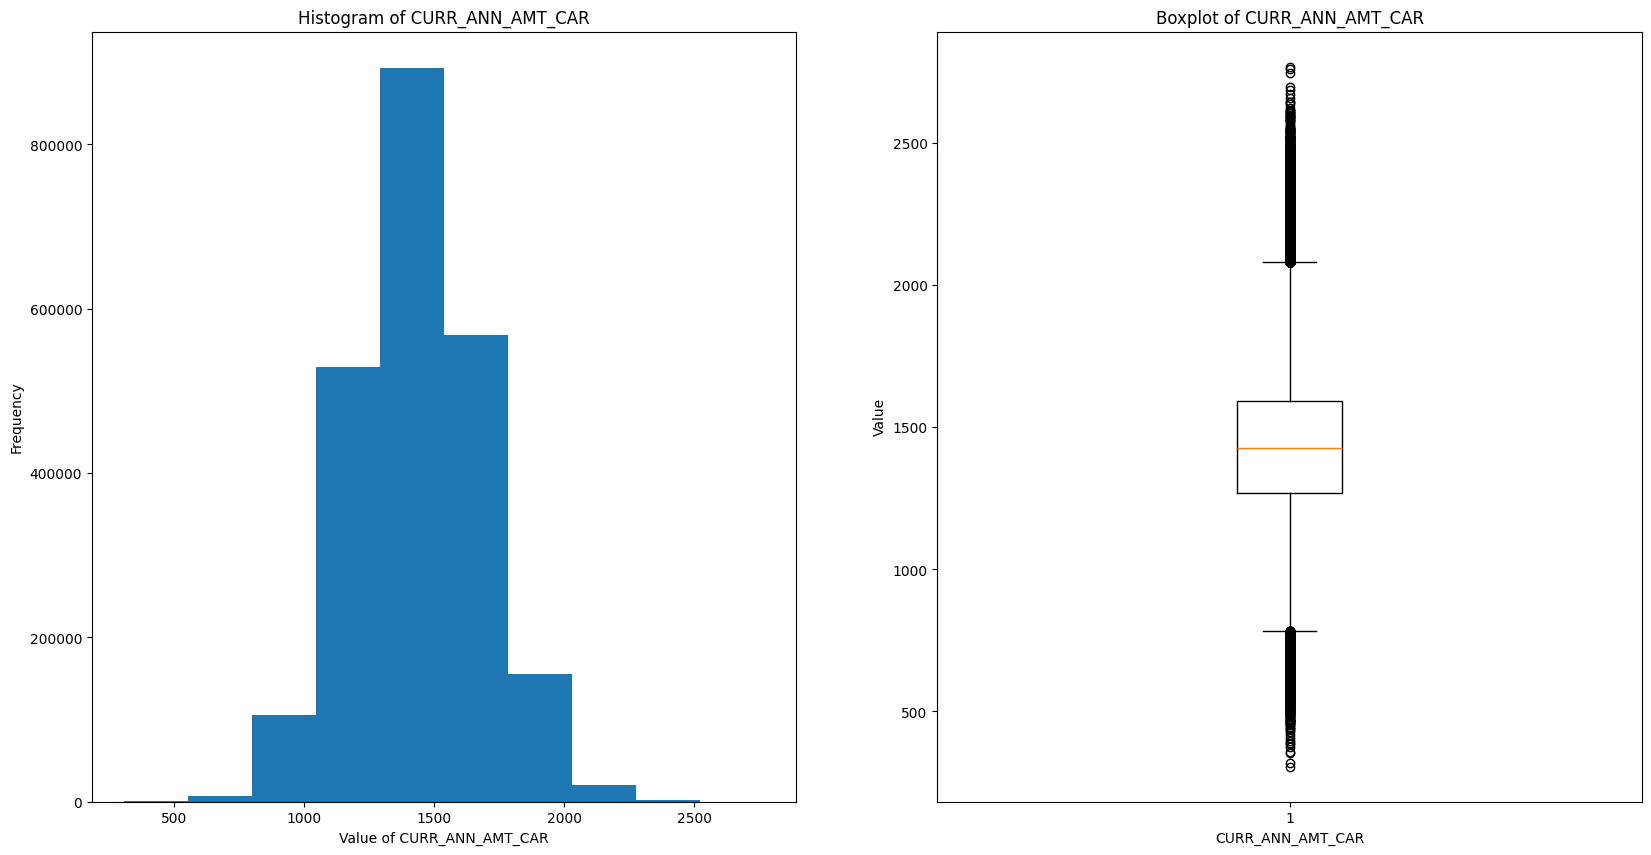

Number of Outliers: 18322
Percentage of Outliers 0.8%
Skewness: 0.14274341280360728
Kurtosis: 0.06990015984484543
Shapiro: 0.9988699062817764 | p_value: 1.944826355642355e-47 

******************************************************************************************************************************************************
CURR_ANN_AMT_HEALTH:


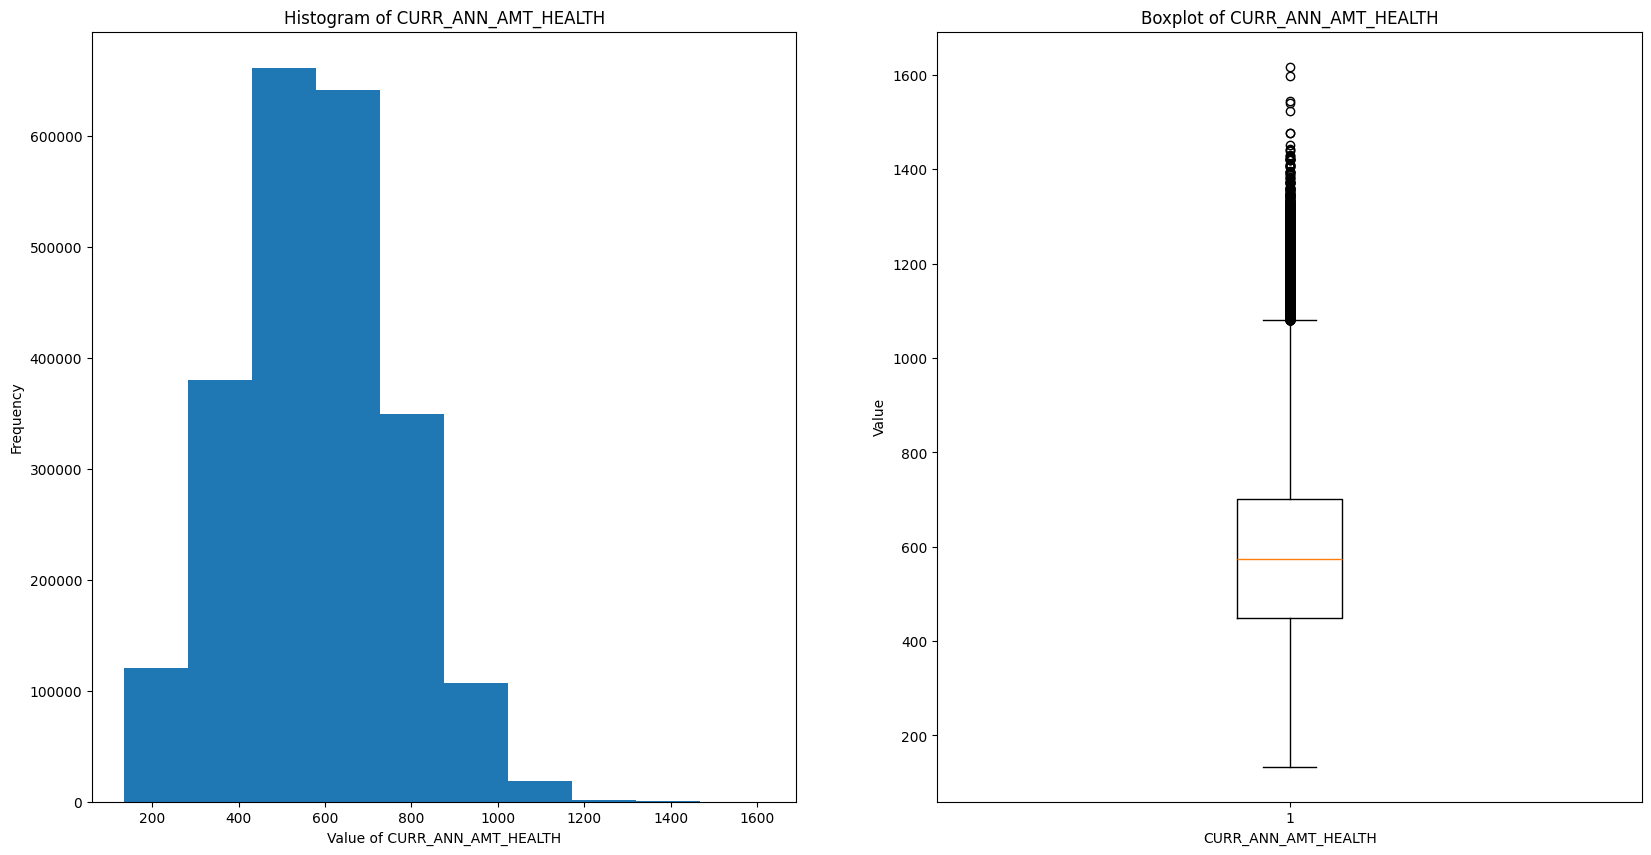

Number of Outliers: 8841
Percentage of Outliers 0.39%
Skewness: 0.15129117945646708
Kurtosis: -0.19066245438320495
Shapiro: 0.9970975371247746 | p_value: 8.562737246556007e-66 

******************************************************************************************************************************************************
CURR_ANN_AMT_HOUSE:


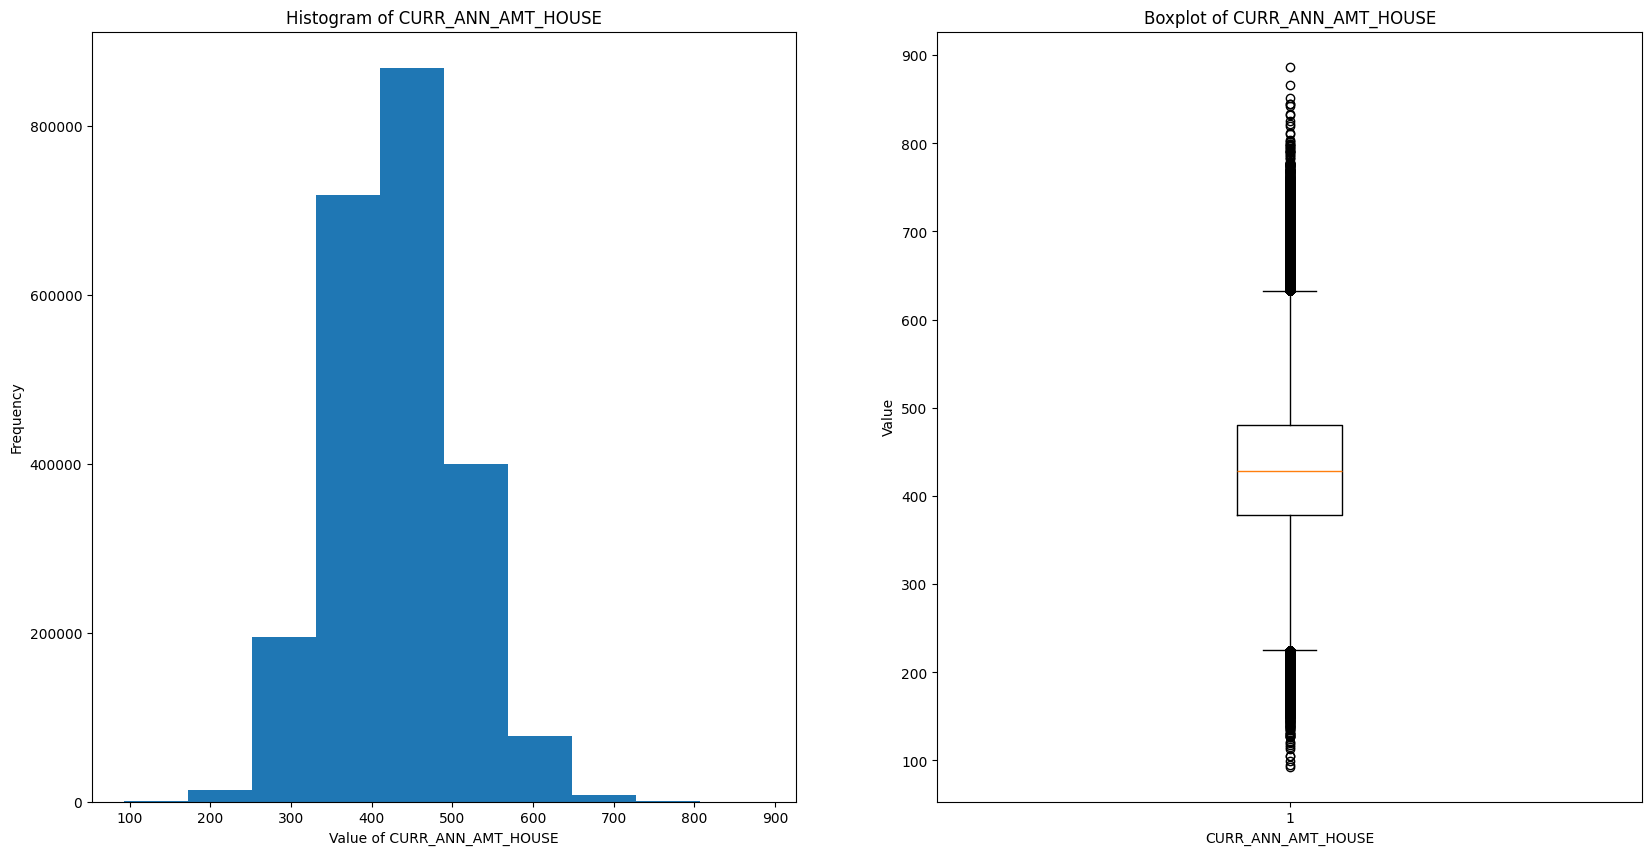

Number of Outliers: 17134
Percentage of Outliers 0.75%
Skewness: 0.1636511455141174
Kurtosis: 0.0711024937657605
Shapiro: 0.998507761037955 | p_value: 1.5857672829733186e-52 

******************************************************************************************************************************************************
INCOME:


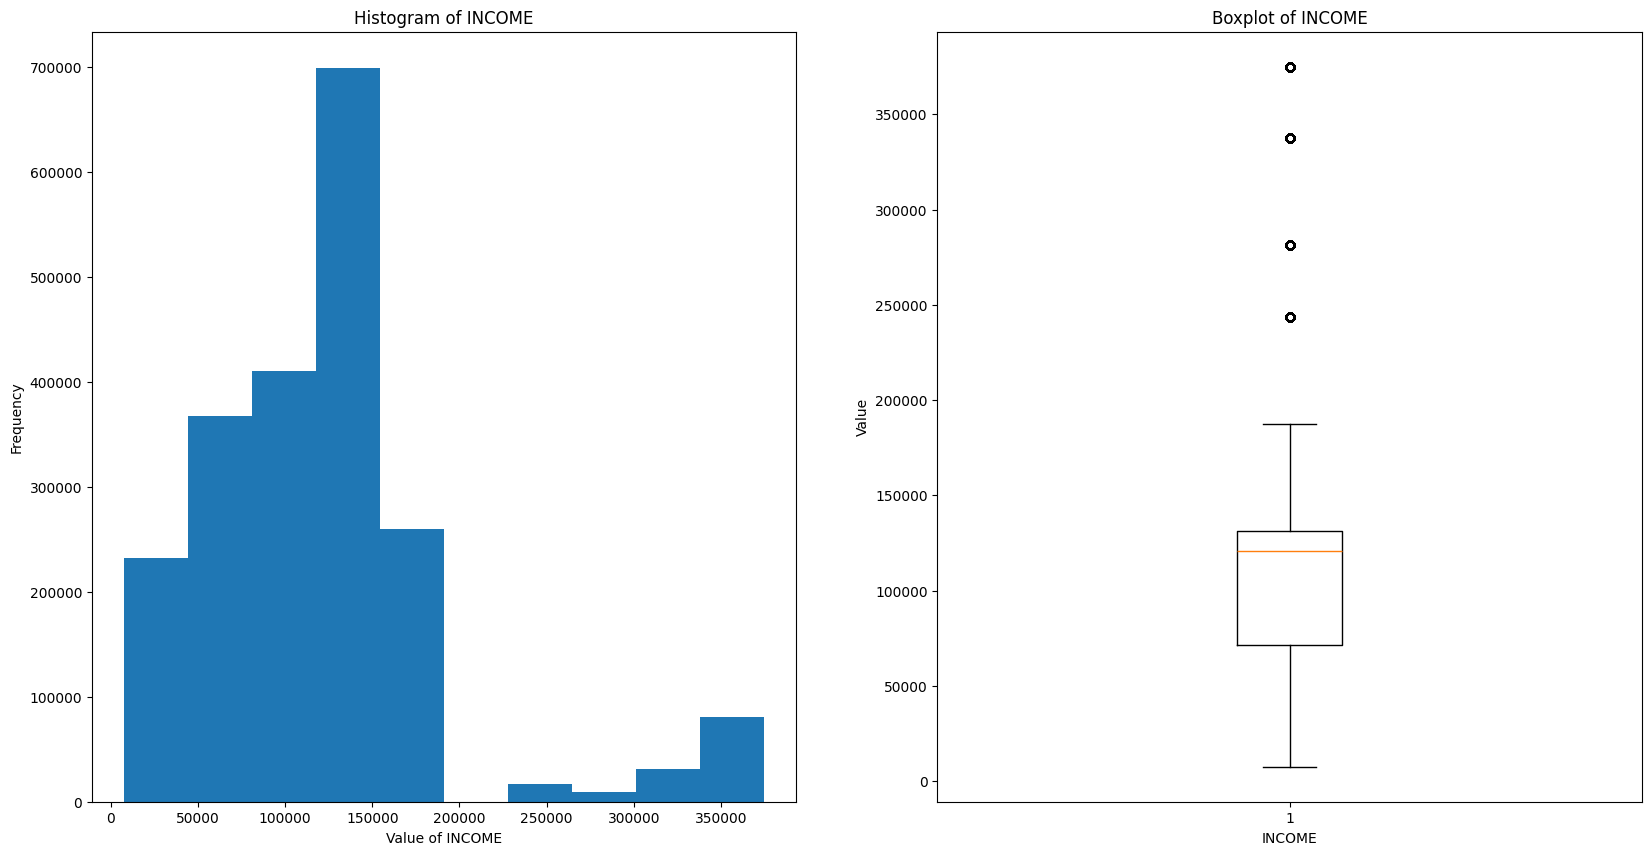

Number of Outliers: 138071
Percentage of Outliers 6.06%
Skewness: 1.6927006475483355
Kurtosis: 3.6389346914605065
Shapiro: 0.8277459931405419 | p_value: 2.4040165960560013e-180 

******************************************************************************************************************************************************
LENGTH_OF_RESIDENCE:


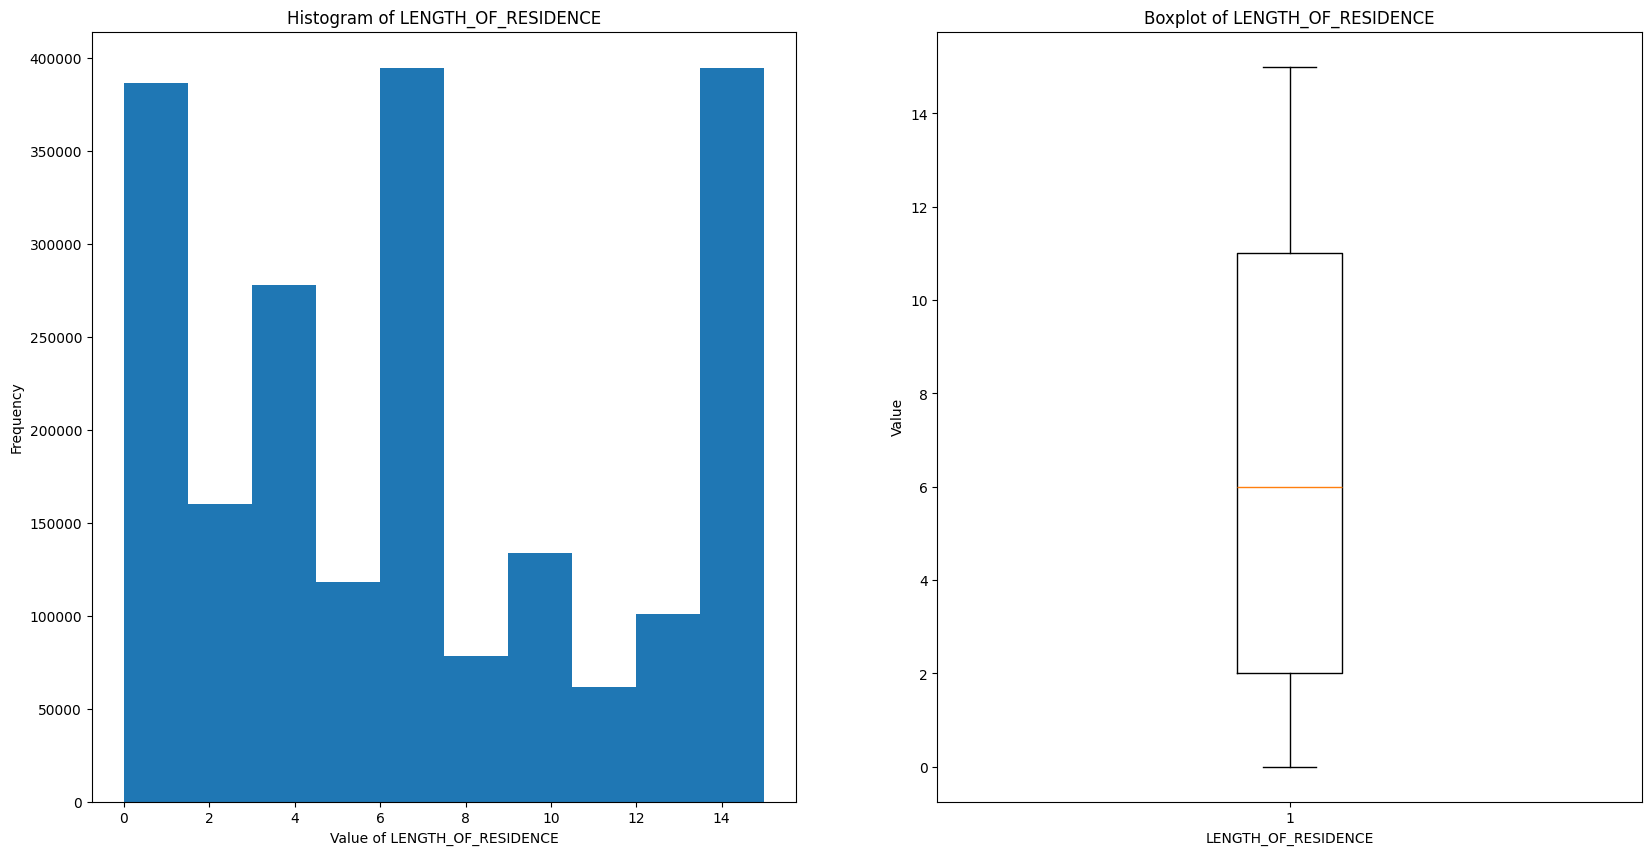

Number of Outliers: 0
Percentage of Outliers 0.0%
Skewness: 0.40745227887747165
Kurtosis: -1.1208762356130477
Shapiro: 0.899347072745894 | p_value: 6.632773406295208e-162 

******************************************************************************************************************************************************
DATE_OF_BIRTH:


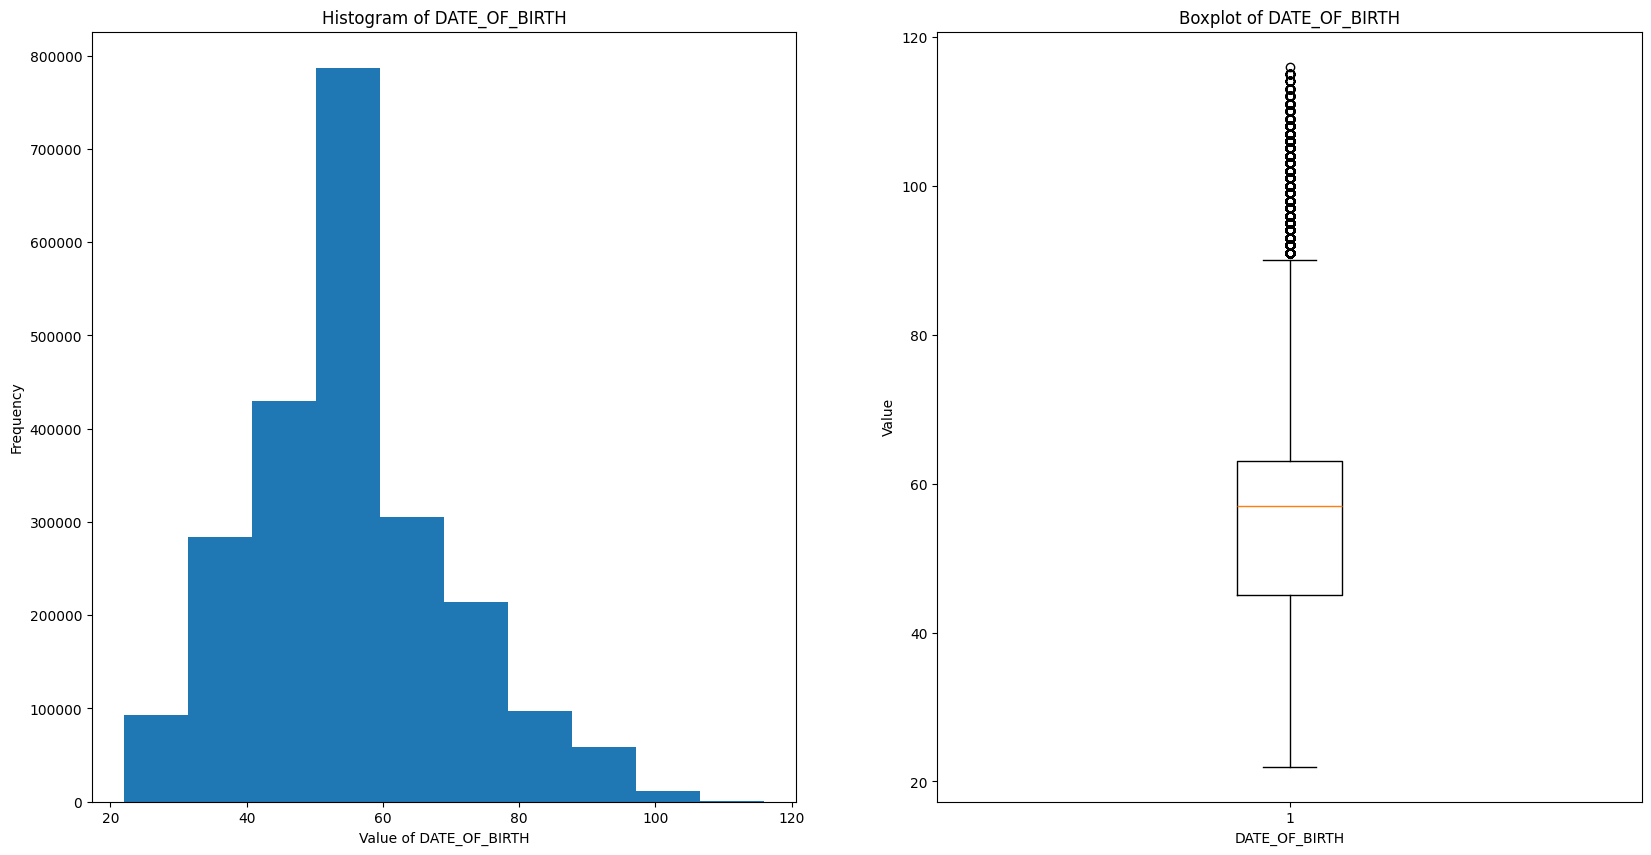

Number of Outliers: 47324
Percentage of Outliers 2.08%
Skewness: 0.4087504548896431
Kurtosis: 0.2967576621049819
Shapiro: 0.9774551274573875 | p_value: 2.4058758249717846e-116 



In [16]:
# Check the distribution & Compute Outliers

def distribution(df_col : pd.Series, plot_distribution : bool = True) -> list:
       """
    Computes distribution statisitcs of 'df_col'
    
    Parameters
    ---------------
    df_col: pd.Series
        Pandas series used to compute the distribution statistics
    plot_distribution: bool
        Boolean value with default value True, that determines whether
        an histogram and boxplot are plotted and if the calculated stats
        are printed
 
    Returns
    ---------------
    l_dist_stats: list
        A list with the distribution statistics. First position [0] has
        number of outliers, second position [1] the percentage of 
        outliers, third position [2] the skewness, forth [3] the 
        kurtosis and fith [4] and sixth [5] the outcomes of the 
        Shapiro-Wilk test (W-stat and p-value)
    
    """
       # Number of outliers computed using 1.5 IQR range
       q1 = df_col.quantile(0.25)
       q3 = df_col.quantile(0.75)
       iqr = q3 - q1
       n_outliers = df_col[
              (df_col < (q1 - 1.5 * iqr)) | ((df_col > (q3 + 1.5 * iqr)))
       ].shape[0]
       per_outliers = n_outliers / df_col.shape[0]

       # Skewness, Kurtosis and Shapiro-Wilk test computed using 
       # scipy.stats library (ignoring nans)
       skewness = skew(df_col, nan_policy="omit")
       kurt = kurtosis(df_col, nan_policy="omit")
       shapiro_stat, p_value = shapiro(df_col.dropna())

       if plot_distribution:
              df_plot = df_col.dropna()
              fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

              # Histogram
              ax1.hist(df_plot)
              ax1.set_title(f"Histogram of {df_plot.name}")
              ax1.set_xlabel(f"Value of {df_plot.name}")
              ax1.set_ylabel(f"Frequency")

              #Boxplot
              ax2.boxplot(df_plot, vert=True)
              ax2.set_title(f"Boxplot of {df_plot.name}")
              ax2.set_xlabel(df_plot.name)
              ax2.set_ylabel(f"Value")
              
              plt.show()

              # Print stats
              print("Number of Outliers:", n_outliers)
              print("Percentage of Outliers", 
                    str(round(100 * per_outliers, 2)) + "%")
              print("Skewness:", skewness)
              print("Kurtosis:", kurt)
              print("Shapiro:", shapiro_stat, "| p_value:", p_value, "\n")
              return None
       
       l_dist_stats = [
              n_outliers, per_outliers, skewness, kurt, shapiro_stat, p_value
       ]
       return l_dist_stats

temp_cols = [
       "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE",
       "INCOME", "LENGTH_OF_RESIDENCE", "DATE_OF_BIRTH"
]
for col in temp_cols:
       print("*" * 150 + f"\n{col}:")
       distribution(df_merged[col])

del temp_cols

---
##### 3. Uniqueness
- There are 22336 duplicates (0.98%) in df_customer, while df_demographic and df_termination have no duplicates. Within the duplicates, only CURR_ANN_AMT_HEALTH changes, but with no way of knowing which value is the correct one, the first instance of the INDIVIDUAL_ID will be selected and any subsequent ones dropped.

In [17]:
# Look for repeat entries based on the INDIVIDUAL_ID variable
def number_of_duplicates(df: pd.DataFrame, print_output: bool = True) -> int:
       """
       Computes number of duplicates of 'df', based on unique identifier 
       variable (INDIVIDUAL_ID)   
    Parameters
    ---------------
    df: pd.DataFrame
        Pandas series used to compute the distribution statistics
    print_output: bool
        Boolean value with default value True, that determines whether
        the number of duplicates will be printed in text output,
        in addition to an example of duplicate rows
 
    Returns
    ---------------
    n_duplicates: int
        Int value with the number of duplicate rows of 'df', based on
        the column INDIVIDUAL_ID
    
    """
       
       n_duplicates = df.duplicated(subset="INDIVIDUAL_ID").sum()
       p_duplicates = round(100 * n_duplicates / df.shape[0], 2)

       if print_output:
              var_name = [name for name, value in globals().items() if value is df][0]
              print("*" * 150, "\n" + var_name + ":")
              print("Number of Duplicates:", n_duplicates)
              print("Percentage of Duplicates:", str(p_duplicates) + "%")
              return None

       return n_duplicates, p_duplicates

number_of_duplicates(df_customer)
number_of_duplicates(df_demographic)
number_of_duplicates(df_termination)

uniqueness_old = round(100 * df_merged["INDIVIDUAL_ID"].nunique() / len(df_merged), 2)

****************************************************************************************************************************************************** 
df_customer:
Number of Duplicates: 22336
Percentage of Duplicates: 0.98%
****************************************************************************************************************************************************** 
df_demographic:
Number of Duplicates: 0
Percentage of Duplicates: 0.0%
****************************************************************************************************************************************************** 
df_termination:
Number of Duplicates: 0
Percentage of Duplicates: 0.0%


In [18]:
# Test to see duplicates in whole rows
display(df_customer[df_customer.duplicated()])

# Check the differences between equal INDIVIDUAL_ID rows
display(
    df_customer[
        df_customer.duplicated(subset="INDIVIDUAL_ID", keep=False)
    ].sort_values("INDIVIDUAL_ID")
)

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE


,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
203239,221300000280,521300000118,2022-03-16,55,708-XX-7803,2022-03-16,1573.14,473.99,480
2281222,221300000280,521300000118,2022-03-16,55,708-XX-7803,2022-03-16,1573.14,404.92,495
2298187,221300000401,521300000167,2005-09-11,64,910-XX-2724,2005-09-11,1680.52,645.00,512
1073007,221300000401,521300000167,2005-09-11,64,910-XX-2724,2005-09-11,1680.52,359.86,493
2291201,221300000638,521300000264,2022-07-19,57,500-XX-2924,2022-07-19,1671.37,717.03,472
...,...,...,...,...,...,...,...,...,...
756122,221303307496,521301537060,2005-09-11,56,486-XX-7000,2005-09-11,945.99,611.00,266
1190246,221303307528,521301537092,2019-08-16,57,170-XX-5011,2019-08-16,1222.48,526.61,387
2300140,221303307528,521301537092,2019-08-16,57,170-XX-5011,2019-08-16,1222.48,711.97,381
2298221,221303307601,521301537165,2005-09-11,41,247-XX-1253,2005-09-11,1087.57,419.08,316


In [19]:
# Remove duplicate entries
temp_shape = df_customer.shape
df_customer = df_customer[~df_customer.duplicated(subset="INDIVIDUAL_ID")]
print("Number of removed rows:", temp_shape[0] - df_customer.shape[0])
# Remerge datasets
df_merged = df_customer.merge(
    right=df_demographic, how="left", on="INDIVIDUAL_ID"
)
df_merged = df_merged.merge(
    right=df_termination, how="left", on="INDIVIDUAL_ID"
)

Number of removed rows: 22336


---
##### 4. Timeliness:
- CUST_ORIG_DATE, CUST_START_DATE and SUSPD_DATE seem to have current information based on the quantiles computed, except for the dates in the future mentioned previously in section 2;
- As mentioned in section 3, some of the ages in DATE_OF_BIRTH are too old to refer to current customers, but since they are not old enough to be irrelevant to the correlation analysis, fixing this issue should be done in Feature Engeneering.

In [20]:
# Based on the date time variables, check if the data refers to old customers or current customers
df_timestamps = df_merged[[
    "CUST_ORIG_DATE", "CUST_START_DATE", "SUSPD_DATE"
]].copy()

df_timestamps = df_timestamps.apply(lambda x: x.view('int64'))
quantiles = df_timestamps.quantile([0, 0.1, 0.25, 0.5, 0.75, 1])
quantile_dates = quantiles.apply(lambda x: pd.to_datetime(x))
display(quantile_dates)

display(df_merged["DATE_OF_BIRTH"].describe())

del df_timestamps, quantiles, quantile_dates

,CUST_ORIG_DATE,CUST_START_DATE,SUSPD_DATE
0.00,2005-09-11,1985-09-16,NaT
0.10,2005-09-11,2005-09-11,NaT
0.25,2005-09-11,2005-09-11,NaT
0.50,2013-06-06,2013-05-25,NaT
0.75,2019-06-23,2019-08-16,NaT
1.00,2022-11-12,2041-10-28,2026-12-01


count   2256880.00
mean         55.34
std          14.66
min          22.00
25%          45.00
50%          57.00
75%          63.00
max         116.00
Name: DATE_OF_BIRTH, dtype: float64

---
#### Data Quality Metrics:
Since most of the changes done are regarding formats of values and distributions, there are very little changes that we can assess through universal data quality metrics. Still, we are able to calculate the change in NaNs and percentage in NaNs for uniqueness, that marginally decreased, and the percentage of unique values that increased to 100%.


In [21]:
# Completeness
n_completeness_new = nan_stats(df_merged, print_output=False)[3]
p_completeness_new = round(n_completeness_new / len(df_merged), 2)
print("Change in NaNs:", n_completeness_old - n_completeness_new)
print("Old Percentage:", p_completeness_old, "New Percentage:", p_completeness_new)

del p_completeness_old, p_completeness_new, n_completeness_old, n_completeness_new

Change in NaNs: 131937
Old Percentage: 9.78 New Percentage: 1.84


In [22]:
# Uniqueness
uniqueness_new = round(100 * df_merged["INDIVIDUAL_ID"].nunique() / len(df_merged), 2)
print("Old Percentage:", uniqueness_old, "New Percentage", uniqueness_new)

del uniqueness_old, uniqueness_new

Old Percentage: 99.02 New Percentage 100.0


---
#### Further EDA

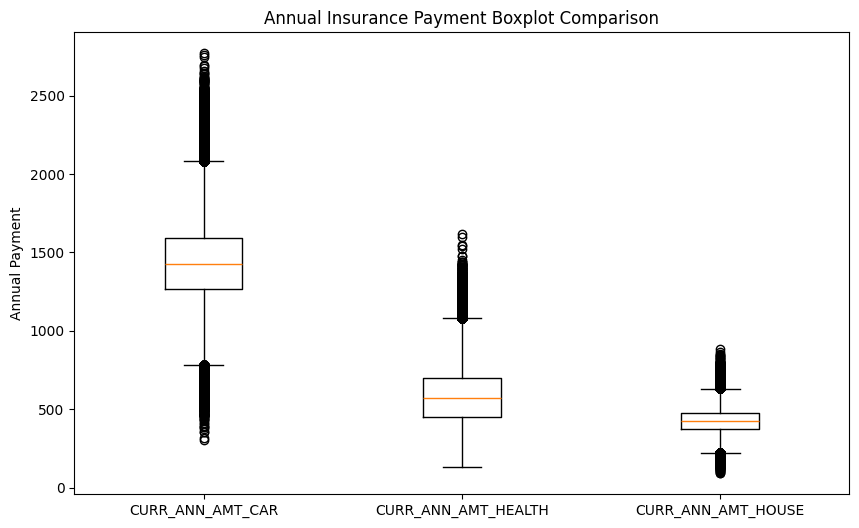

,CUST_ORIG_DATE,DATE_OF_BIRTH,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE
CUST_ORIG_DATE,1.00,-0.25,0.90,-0.02,-0.01,-0.02,-0.03,0.01,-0.12,-0.05,-0.00,-0.10,-0.06,-0.02,0.01,0.21
DATE_OF_BIRTH,-0.25,1.00,-0.23,0.07,0.04,0.07,-0.01,-0.16,0.27,0.11,-0.02,0.12,0.06,0.02,-0.03,-0.04
CUST_START_DATE,0.90,-0.23,1.00,-0.02,-0.01,-0.02,-0.02,0.00,-0.11,-0.05,-0.00,-0.09,-0.06,-0.02,0.01,0.19
CURR_ANN_AMT_CAR,-0.02,0.07,-0.02,1.00,0.50,0.96,0.13,-0.00,0.19,0.12,0.02,0.12,0.10,0.05,0.04,0.02
CURR_ANN_AMT_HEALTH,-0.01,0.04,-0.01,0.50,1.00,0.48,0.06,-0.00,0.10,0.06,0.01,0.06,0.05,0.03,0.02,0.01
CURR_ANN_AMT_HOUSE,-0.02,0.07,-0.02,0.96,0.48,1.00,0.12,-0.00,0.18,0.11,0.02,0.12,0.09,0.05,0.04,0.02
INCOME,-0.03,-0.01,-0.02,0.13,0.06,0.12,1.00,0.06,0.06,0.25,0.28,0.15,0.12,0.24,0.37,-0.01
HAS_CHILDREN,0.01,-0.16,0.00,-0.00,-0.00,-0.00,0.06,1.00,0.03,0.17,-0.00,0.23,0.11,0.05,-0.06,0.01
LENGTH_OF_RESIDENCE,-0.12,0.27,-0.11,0.19,0.10,0.18,0.06,0.03,1.00,0.19,-0.10,0.40,0.10,0.07,-0.02,-0.04
MARITAL_STATUS,-0.05,0.11,-0.05,0.12,0.06,0.11,0.25,0.17,0.19,1.00,0.05,0.27,0.08,0.08,0.11,-0.00


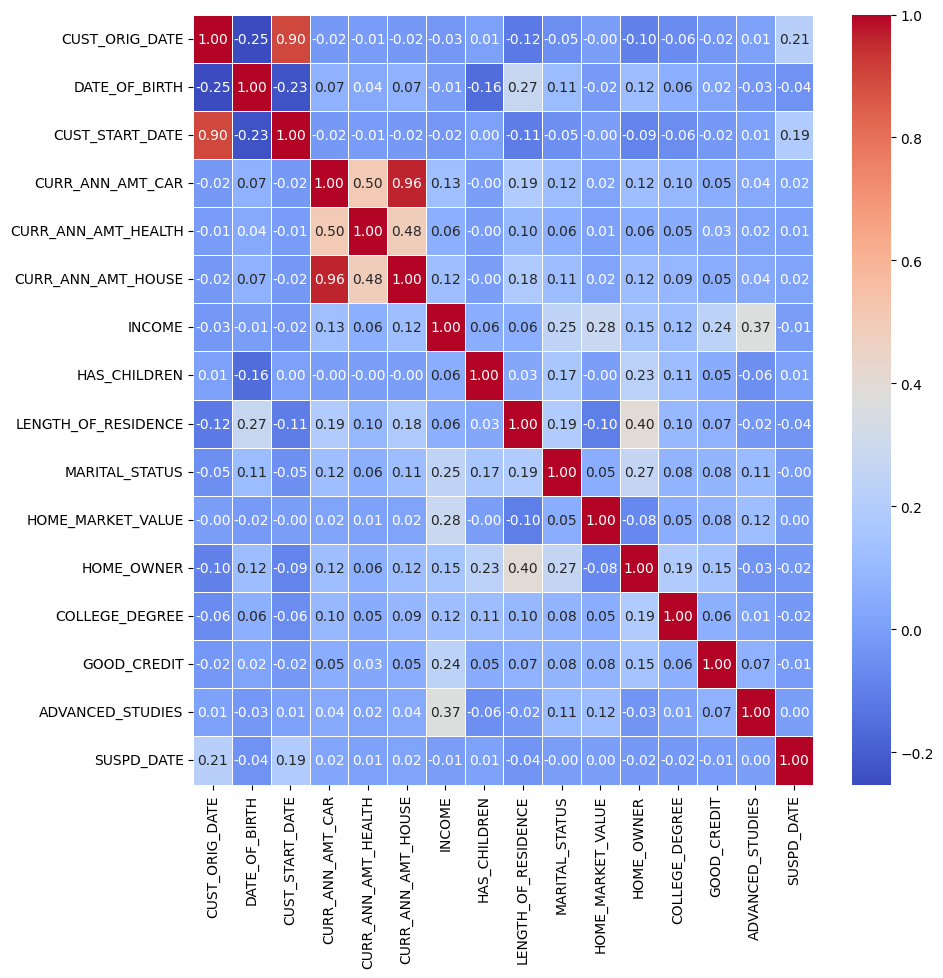

In [23]:
# Boxplot for the three insurance annual payments
plt.figure(figsize=(10, 6))
plt.boxplot([
    df_customer["CURR_ANN_AMT_CAR"], df_customer["CURR_ANN_AMT_HEALTH"], 
    df_customer["CURR_ANN_AMT_HOUSE"]
], labels=["CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"])
plt.title("Annual Insurance Payment Boxplot Comparison")
plt.ylabel("Annual Payment")
plt.show()

# Correlation Matrix
df_corr = df_merged.drop(columns=[
    "INDIVIDUAL_ID", "ADDRESS_ID", "SOCIAL_SECURITY_NUMBER"
])
df_corr["CUST_ORIG_DATE"] = df_corr["CUST_ORIG_DATE"].astype("int64")
df_corr["CUST_START_DATE"] = df_corr["CUST_START_DATE"].astype("int64")
df_corr["SUSPD_DATE"] = df_corr["SUSPD_DATE"].astype("int64")

correlation_matrix = df_corr.corr()
display(correlation_matrix)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=.5, cbar=True)
plt.show()

del df_corr, correlation_matrix

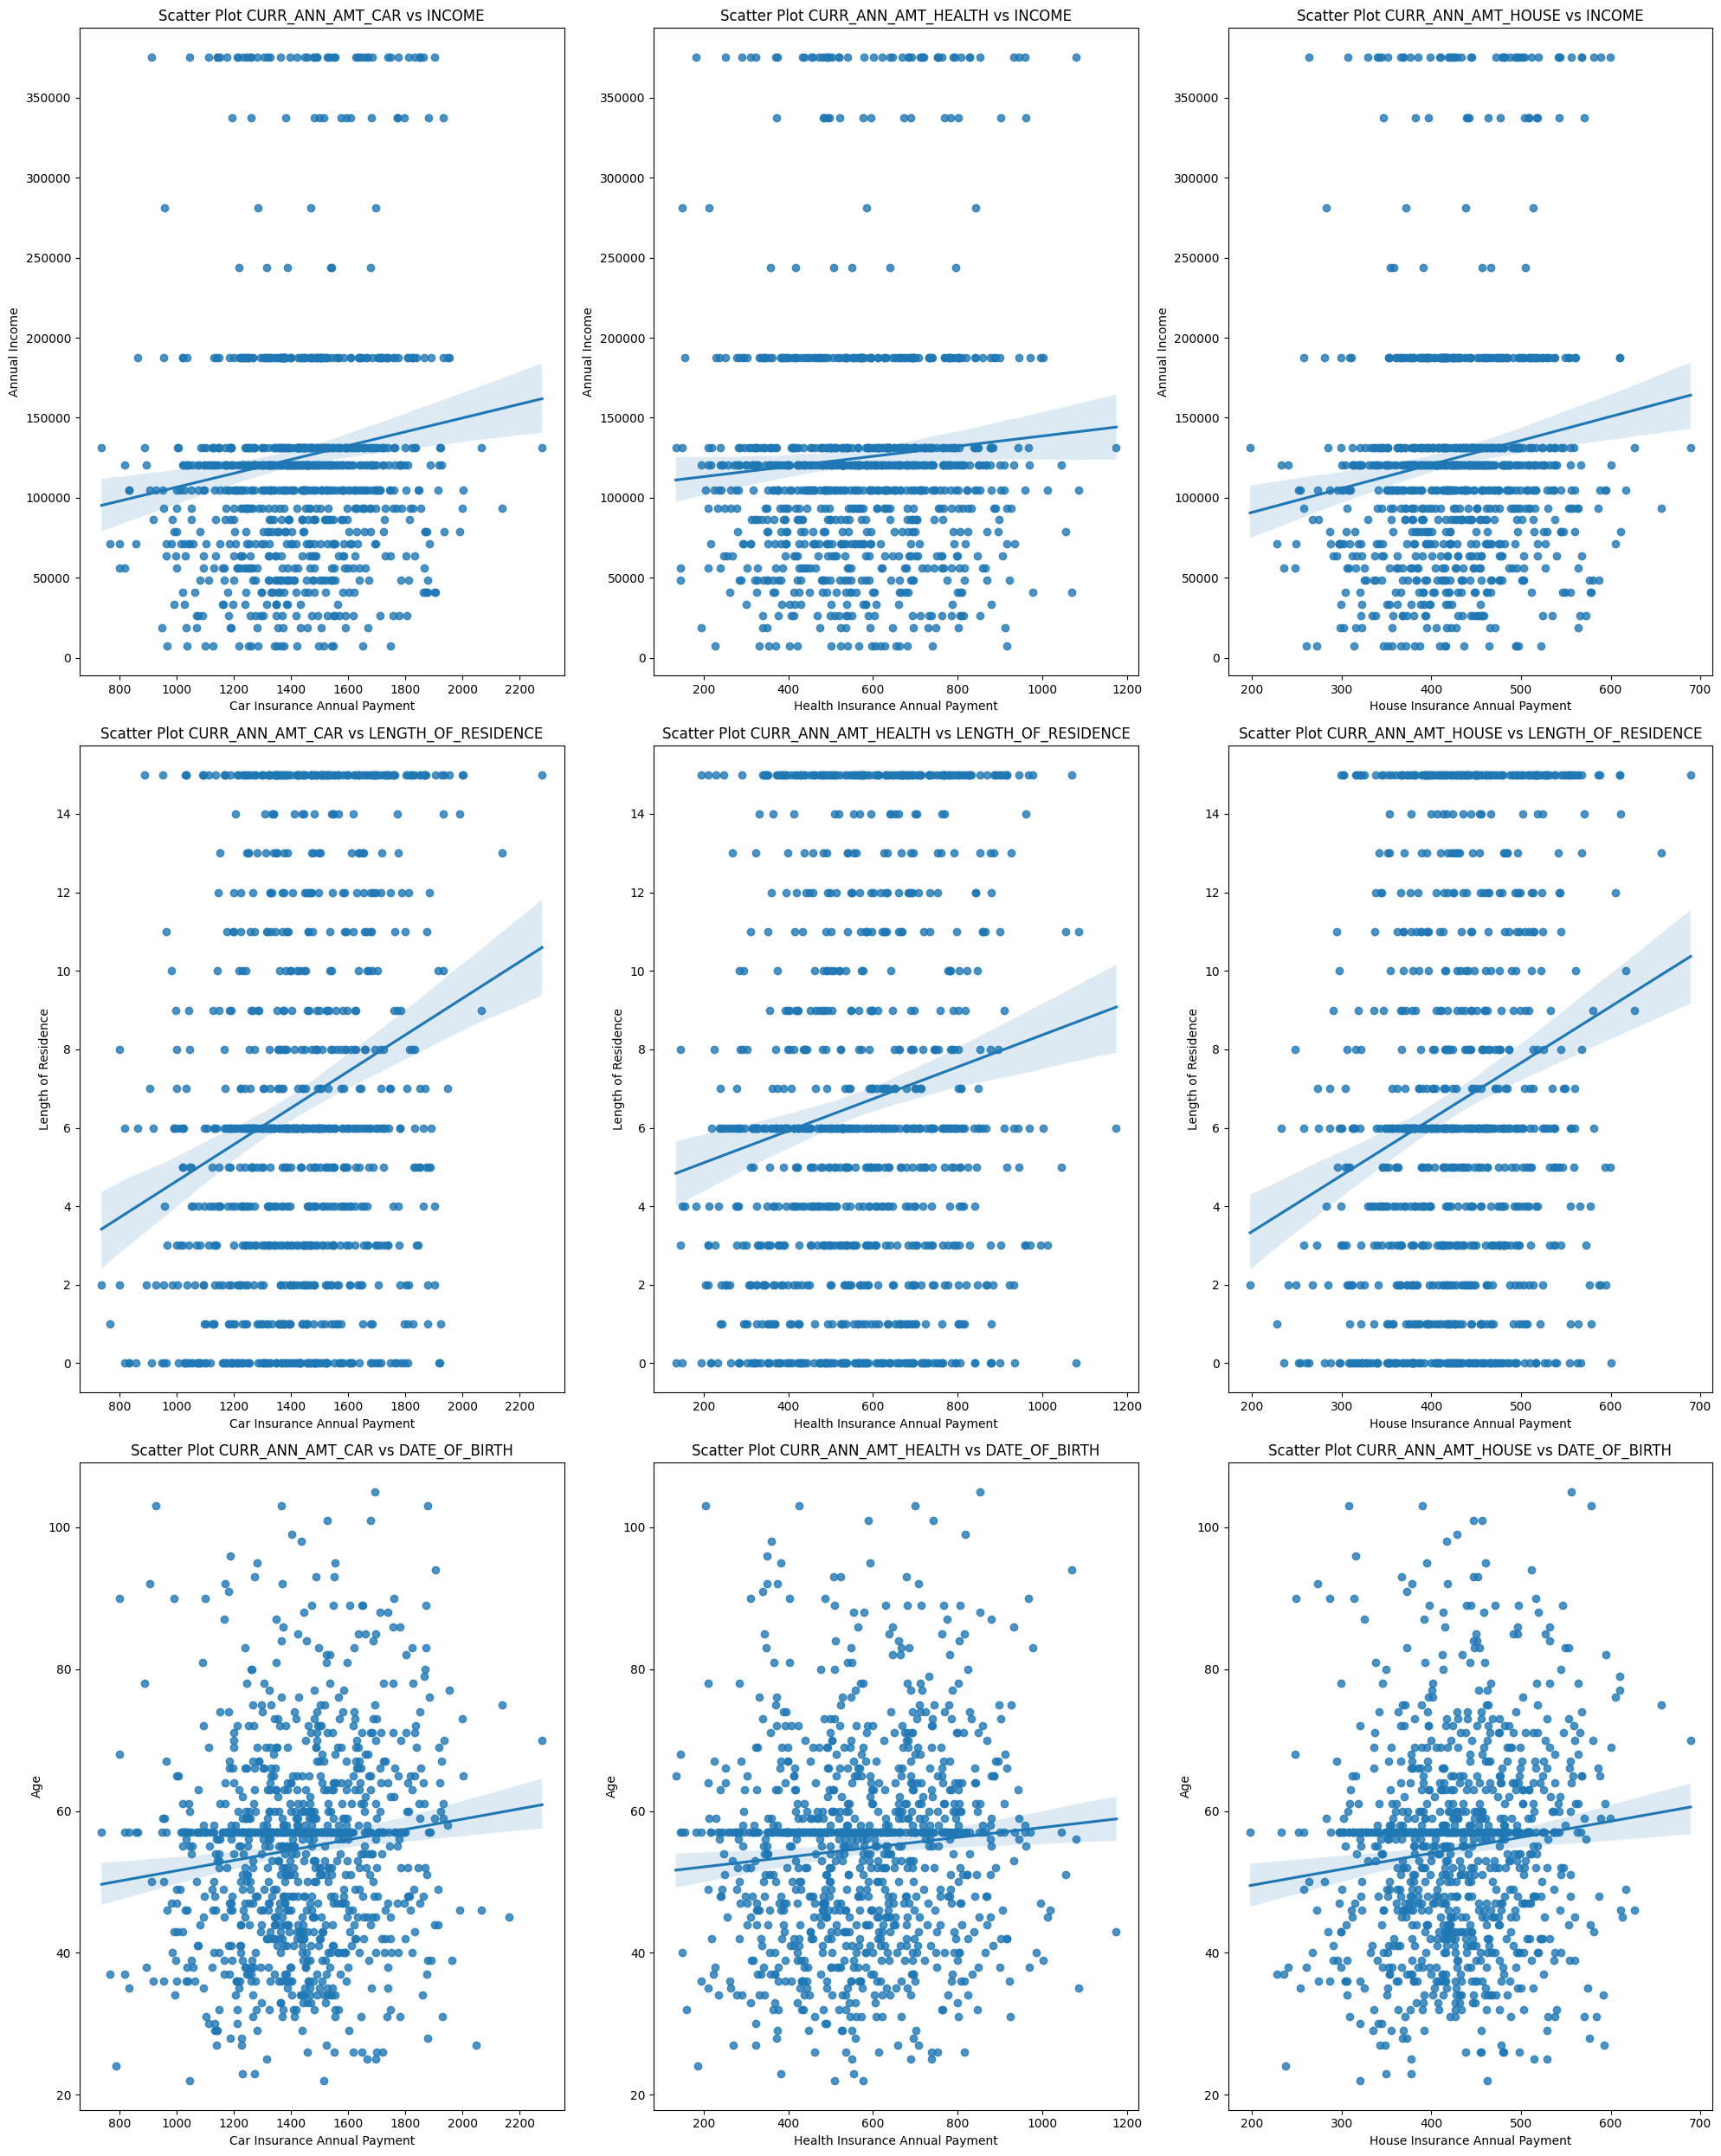

GOOD_CREDIT                      0.00  1.00   All
ADVANCED_STUDIES COLLEGE_DEGREE                  
0                0.00            0.11  0.41  0.52
                 1.00            0.04  0.18  0.22
1                0.00            0.03  0.15  0.18
                 1.00            0.01  0.07  0.08
All                              0.18  0.82  1.00

GOOD_CREDIT,0.00,1.00,All
HAS_CHILDREN,,,
0.00,0.11,0.46,0.57
1.00,0.07,0.36,0.43
All,0.18,0.82,1.00


GOOD_CREDIT,0.00,1.00,All
HOME_OWNER,,,
0.00,0.08,0.22,0.30
1.00,0.10,0.60,0.70
All,0.18,0.82,1.00


GOOD_CREDIT,0.00,1.00,All
MARITAL_STATUS,,,
0,0.07,0.30,0.38
1,0.08,0.54,0.62
All,0.16,0.84,1.00


In [24]:
# Scatter plots relevant to business context
df_plot = df_merged.sample(n=1000, random_state=random_seed)
plt.figure(figsize=(20, 25))

# INCOME and Annual Payments
plt.subplot(3, 3, 1)
sns.regplot(x="CURR_ANN_AMT_CAR", y="INCOME", data=df_plot)
plt.title("Scatter Plot CURR_ANN_AMT_CAR vs INCOME")
plt.xlabel("Car Insurance Annual Payment")
plt.ylabel("Annual Income")
plt.subplot(3, 3, 2)
sns.regplot(x="CURR_ANN_AMT_HEALTH", y="INCOME", data=df_plot)
plt.title("Scatter Plot CURR_ANN_AMT_HEALTH vs INCOME")
plt.xlabel("Health Insurance Annual Payment")
plt.ylabel("Annual Income")
plt.subplot(3, 3, 3)
sns.regplot(x="CURR_ANN_AMT_HOUSE", y="INCOME", data=df_plot)
plt.title("Scatter Plot CURR_ANN_AMT_HOUSE vs INCOME")
plt.xlabel("House Insurance Annual Payment")
plt.ylabel("Annual Income")

# LENGTH_OF_RESIDENCE and Annual Payments
plt.subplot(3, 3, 4)
sns.regplot(x="CURR_ANN_AMT_CAR", y="LENGTH_OF_RESIDENCE", data=df_plot)
plt.title("Scatter Plot CURR_ANN_AMT_CAR vs LENGTH_OF_RESIDENCE")
plt.xlabel("Car Insurance Annual Payment")
plt.ylabel("Length of Residence")
plt.subplot(3, 3, 5)
sns.regplot(x="CURR_ANN_AMT_HEALTH", y="LENGTH_OF_RESIDENCE", data=df_plot)
plt.title("Scatter Plot CURR_ANN_AMT_HEALTH vs LENGTH_OF_RESIDENCE")
plt.xlabel("Health Insurance Annual Payment")
plt.ylabel("Length of Residence")
plt.subplot(3, 3, 6)
sns.regplot(x="CURR_ANN_AMT_HOUSE", y="LENGTH_OF_RESIDENCE", data=df_plot)
plt.title("Scatter Plot CURR_ANN_AMT_HOUSE vs LENGTH_OF_RESIDENCE")
plt.xlabel("House Insurance Annual Payment")
plt.ylabel("Length of Residence")

# Age and Annual Payments
plt.subplot(3, 3, 7)
sns.regplot(x="CURR_ANN_AMT_CAR", y="DATE_OF_BIRTH", data=df_plot)
plt.title("Scatter Plot CURR_ANN_AMT_CAR vs DATE_OF_BIRTH")
plt.xlabel("Car Insurance Annual Payment")
plt.ylabel("Age")
plt.subplot(3, 3, 8)
sns.regplot(x="CURR_ANN_AMT_HEALTH", y="DATE_OF_BIRTH", data=df_plot)
plt.title("Scatter Plot CURR_ANN_AMT_HEALTH vs DATE_OF_BIRTH")
plt.xlabel("Health Insurance Annual Payment")
plt.ylabel("Age")
plt.subplot(3, 3, 9)
sns.regplot(x="CURR_ANN_AMT_HOUSE", y="DATE_OF_BIRTH", data=df_plot)
plt.title("Scatter Plot CURR_ANN_AMT_HOUSE vs DATE_OF_BIRTH")
plt.xlabel("House Insurance Annual Payment")
plt.ylabel("Age")

plt.tight_layout()
plt.show()

# Cross tabulations to business context
crosstab_education_credit = pd.crosstab(
    [df_merged["ADVANCED_STUDIES"], df_merged["COLLEGE_DEGREE"]],
    df_merged["GOOD_CREDIT"], margins=True, normalize="all"
)
display(crosstab_education_credit)

crosstab_children_credit = pd.crosstab(
    df_merged["HAS_CHILDREN"], df_merged["GOOD_CREDIT"],
    margins=True, normalize="all"
)
display(crosstab_children_credit)

crosstab_owner_credit = pd.crosstab(
    df_merged["HOME_OWNER"], df_merged["GOOD_CREDIT"],
    margins=True, normalize="all"
)
display(crosstab_owner_credit)

crosstab_married_credit = pd.crosstab(
    df_merged["MARITAL_STATUS"], df_merged["GOOD_CREDIT"],
    margins=True, normalize="all"
)
display(crosstab_married_credit)

del df_plot, crosstab_education_credit, crosstab_children_credit
del crosstab_owner_credit, crosstab_married_credit

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


#### A:
From the exploratory data analysis, we can already establish some important relationships between variables that statistically back business concepts. The first paragraph will be dedicated to the annual insurance amounts paid, and the second to the demographic variables of the customers. From the boxplot comparison between the annual insurance paid by customers, we can observe that the annual amount for cars is the most expensive on average and also has the biggest variance, followed by health insurance (also second in variance), and finally house insurance. This is because there is a higher frequency of claims for car damage (whether for road accidents or robbery) and the severity of claims is on average very high (due to the combination of property damage and medical damage caused, added to the liability to pay for external damage caused in case of fault). Also, car claims can range from small accidents where only the vehicle is slightly damaged to accidents involving mortality and lawsuits involving hundreds of thousands, which would only explain the variance based on specific factors of the driver. Additionally, there usually are many different coverages for car insurance, which also contributes to the variance. As for health insurance, there is also great diversity in the coverage and the claims, but not to the same severity as car insurance. Also, in many jurisdictions, car insurance is legally required while health and house insurance aren't, causing relatively less demand for both these products. Finally, for house insurance, there usually aren't as many house insurance claims and the coverage offers don't vary as much, which explains the values observed.

In general, the payments of all types of insurance seem to be correlated positively with age, as older people have more money to buy more complete offers and have to pay more for health insurance, income, length of residence at the current residence (which can be a proxy for financial stability after settling), being a homeowner (another proxy for financial stability), having good credit, and having higher education, but these correlations are generally weak. There are also logical positive correlations between the demographic variables, such as the correlation between income and higher education, good credit and income, income and homeownership and house value, and obviously the length of residence and homeownership. Overall, although the correlations are weaker than expected, the logical sense of them, together with some key business rules, indicates that the dataset is trustworthy and reflective of reality. The correlations identified and the distributions analyzed should be useful data for analysis since it allows the business to study its consumer base, learn what variables explain certain behaviors, and also leverage that knowledge to target consumers in ways that benefit the business's efficiency.

## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics. (15 points)

Since this is a prediction task for a quantitative value - the customer value - based on the CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields, we won't need to predict for the number of years the customer will be with the company, but instead just focus on predicting what customers have the highers sum of the three annual payments.

Based on the defined objective and the insights from the EDA, the baseline model that will be trained is a Regularized Linear Regression (using l2 regularization, or Ridge Regression). The features selected initially will be the customer's INCOME, LENGTH_OF_RESIDENCE,  COLLEGE_DEGREE and DATE_OF_BIRTH values. Even though HOME_OWNER, GOOD_CREDIT and HAS_CHILDREN have a decent enough correlation with the target variables, since they have a relatively higher correlation with variables like INCOME, LENGTH_OF_RESIDENCE and COLLEGE_DEGREE, so we won't include them in our model to avoid multicollinearity. After cleaning the features, we will use  Recursive feature elimination (RFE) to refine this list. It is not a good method to start with a bit list of variables with lost of correlations between the variables, since RFE is vulnerable to multicollinearity aswell.

We will start by performing Feature Engeneering, namely winsorizing outliers in INCOME and DATE_OF_BIRTH , normalizing the distributions of INCOME and LENGTH_OF_RESIDENCE and getting dropping any remaining NaNs and standardizing the scale of the numerical variables. This should address all vulnerabilities of the Linear model to the issues identified in the EDA that were not corrected yet.

In [25]:
# Define a copy of the df_merged, in order to leave original data unaffected by the model specific Feature Engeneering
df_value_baseline = df_merged[[
    "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE",
    "INCOME", "LENGTH_OF_RESIDENCE", "COLLEGE_DEGREE", "DATE_OF_BIRTH",
]].copy()
# Calculate the target value - CUST_VALUE
df_value_baseline["CUST_VALUE"] = df_value_baseline[[
    "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"
]].sum(axis=1)
df_value_baseline.drop(columns=[
    "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"
], inplace=True)

display(df_value_baseline)
display(df_value_baseline.isna().sum())
display(100 * df_value_baseline.isna().sum() / df_value_baseline.shape[0])

,INCOME,LENGTH_OF_RESIDENCE,COLLEGE_DEGREE,DATE_OF_BIRTH,CUST_VALUE
0,33750.00,15.00,1.00,46,2247.88
1,41250.00,2.00,0.00,74,2446.62
2,63750.00,10.00,0.00,57,2611.02
3,187500.00,6.00,0.00,55,2356.93
4,131250.00,4.00,1.00,52,2423.49
...,...,...,...,...,...
2256875,131250.00,2.00,0.00,44,1542.95
2256876,120558.26,1.00,0.00,50,1760.43
2256877,131250.00,10.00,0.00,56,1461.05
2256878,120558.26,6.00,0.00,57,1396.44


INCOME                 171755
LENGTH_OF_RESIDENCE    171755
COLLEGE_DEGREE         171755
DATE_OF_BIRTH               0
CUST_VALUE                  0
dtype: int64

INCOME                7.61
LENGTH_OF_RESIDENCE   7.61
COLLEGE_DEGREE        7.61
DATE_OF_BIRTH         0.00
CUST_VALUE            0.00
dtype: float64

INCOME:


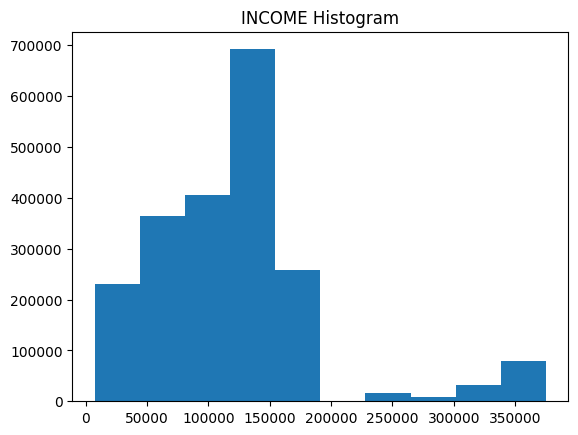

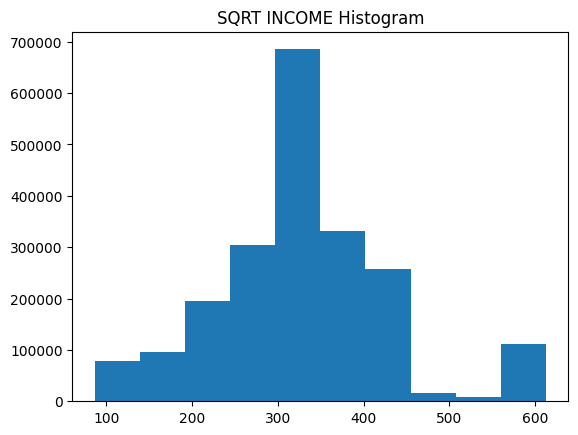

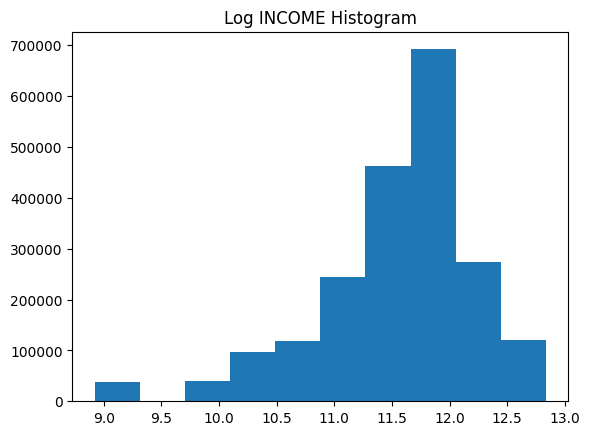

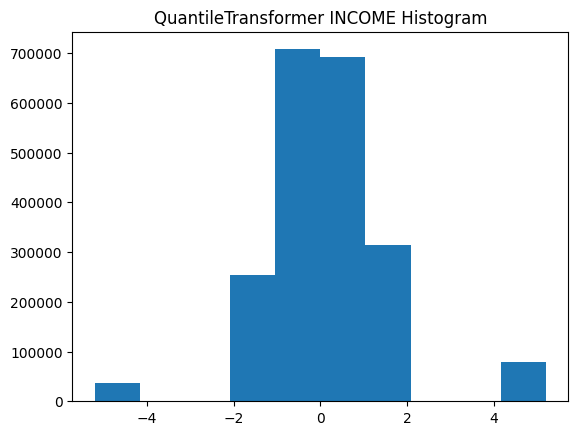

******************************************************************************************************************************************************
LENGTH_OF_RESIDENCE:


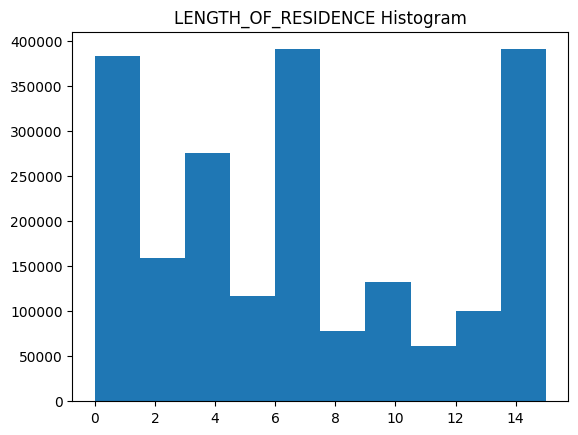

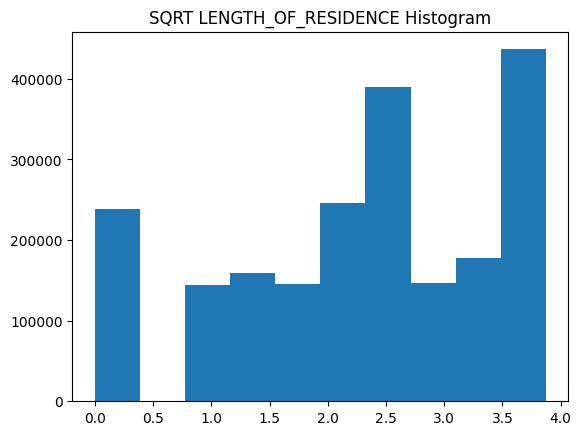

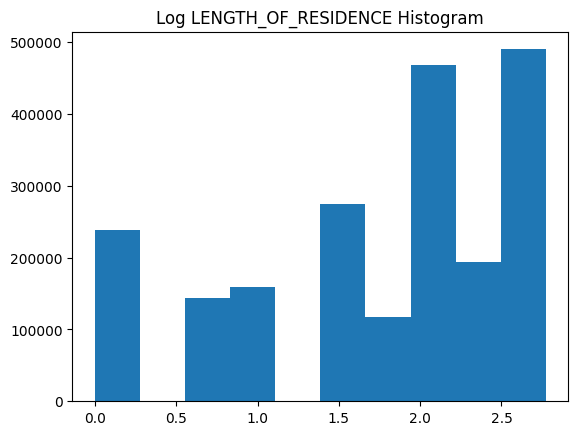

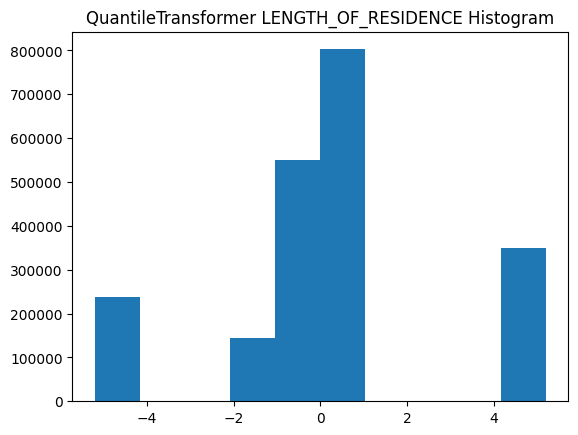

In [26]:
# Since only 7.61% of the rows have NaNs and our dataset as a big size, we will drop 
# the NaNs instead of dealing with them with other methods such as imputation, since these may introduce bias
df_value_baseline.dropna(inplace=True)

# winsorize INCOME and DATE_OF_BIRTH outliers, with limits at the 5th and 95th percentiles
df_value_baseline["INCOME"] = winsorize(df_value_baseline["INCOME"],
                                         limits=[0.05, 0.05])
df_value_baseline["DATE_OF_BIRTH"] = winsorize(df_value_baseline["DATE_OF_BIRTH"],
                                         limits=[0.05, 0.05])

# Testing Transformations for INCOME (using original data)
print("INCOME:")
temp_df = df_merged["INCOME"].copy()
plt.hist(temp_df)
plt.title("INCOME Histogram")
plt.show()

plt.hist(np.sqrt(temp_df))
plt.title("SQRT INCOME Histogram")
plt.show()

plt.hist(np.log(temp_df))
plt.title("Log INCOME Histogram")
plt.show()

qt = QuantileTransformer(output_distribution="normal")
temp_df = qt.fit_transform(temp_df.to_frame())
plt.hist(temp_df)
plt.title("QuantileTransformer INCOME Histogram")
plt.show()
print("*" * 150)

# Testing Transformations for LENGTH_OF_RESIDENCE (using original data)
print("LENGTH_OF_RESIDENCE:")
temp_df = df_merged["LENGTH_OF_RESIDENCE"].copy()
plt.hist(temp_df)
plt.title("LENGTH_OF_RESIDENCE Histogram")
plt.show()

plt.hist(np.sqrt(temp_df))
plt.title("SQRT LENGTH_OF_RESIDENCE Histogram")
plt.show()

plt.hist(np.log(temp_df + 1)) # LENGTH_OF_RESIDENCE contains 0, + 1 so that zeros remain the the transformed distribution
plt.title("Log LENGTH_OF_RESIDENCE Histogram")
plt.show()

qt = QuantileTransformer(output_distribution="normal")
temp_df = qt.fit_transform(temp_df.to_frame())
plt.hist(temp_df)
plt.title("QuantileTransformer LENGTH_OF_RESIDENCE Histogram")
plt.show()

del temp_df, qt

In [27]:
# Based on the results above, use SQRT transformation to normalize INCOME and LENGTH_OF_RESIDENCE
df_value_baseline["INCOME"] = np.sqrt(df_value_baseline["INCOME"])
df_value_baseline["LENGTH_OF_RESIDENCE"] = np.sqrt(df_value_baseline["LENGTH_OF_RESIDENCE"])

# Standardize Scales for the numerical variables
scaled_data = StandardScaler().fit_transform(
    df_value_baseline[["INCOME", "LENGTH_OF_RESIDENCE", "DATE_OF_BIRTH"]])

df_value_baseline_scaled = df_value_baseline.copy()
df_value_baseline_scaled[["INCOME", "LENGTH_OF_RESIDENCE", 
                          "DATE_OF_BIRTH"]] = scaled_data

display(df_value_baseline_scaled)

,INCOME,LENGTH_OF_RESIDENCE,COLLEGE_DEGREE,DATE_OF_BIRTH,CUST_VALUE
0,-1.56,1.31,1.00,-0.86,2247.88
1,-1.36,-0.75,0.00,1.35,2446.62
2,-0.84,0.72,0.00,0.01,2611.02
3,1.05,0.12,0.00,-0.15,2356.93
4,0.31,-0.25,1.00,-0.38,2423.49
...,...,...,...,...,...
2256875,0.31,-0.75,0.00,-1.01,1542.95
2256876,0.15,-1.09,0.00,-0.54,1760.43
2256877,0.31,0.72,0.00,-0.07,1461.05
2256878,0.15,0.12,0.00,0.01,1396.44


******************************************************************************************************************************************************
INCOME:


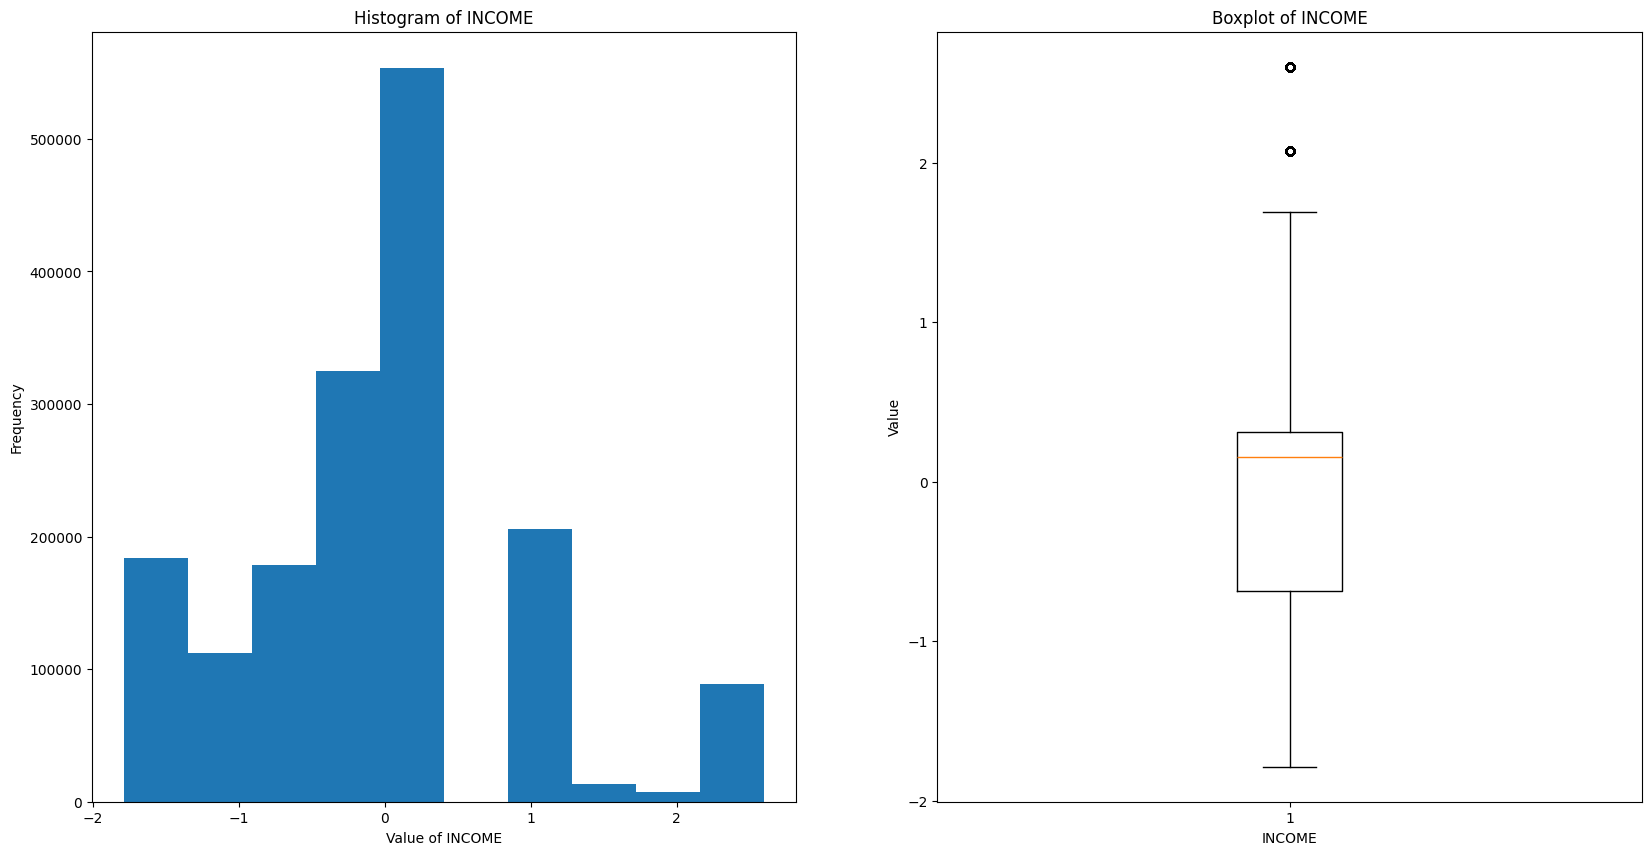

Number of Outliers: 95978
Percentage of Outliers 5.75%
Skewness: 0.5314409045825088
Kurtosis: 0.7103333713726085
Shapiro: 0.9338870265101548 | p_value: 2.5328138489062933e-146 



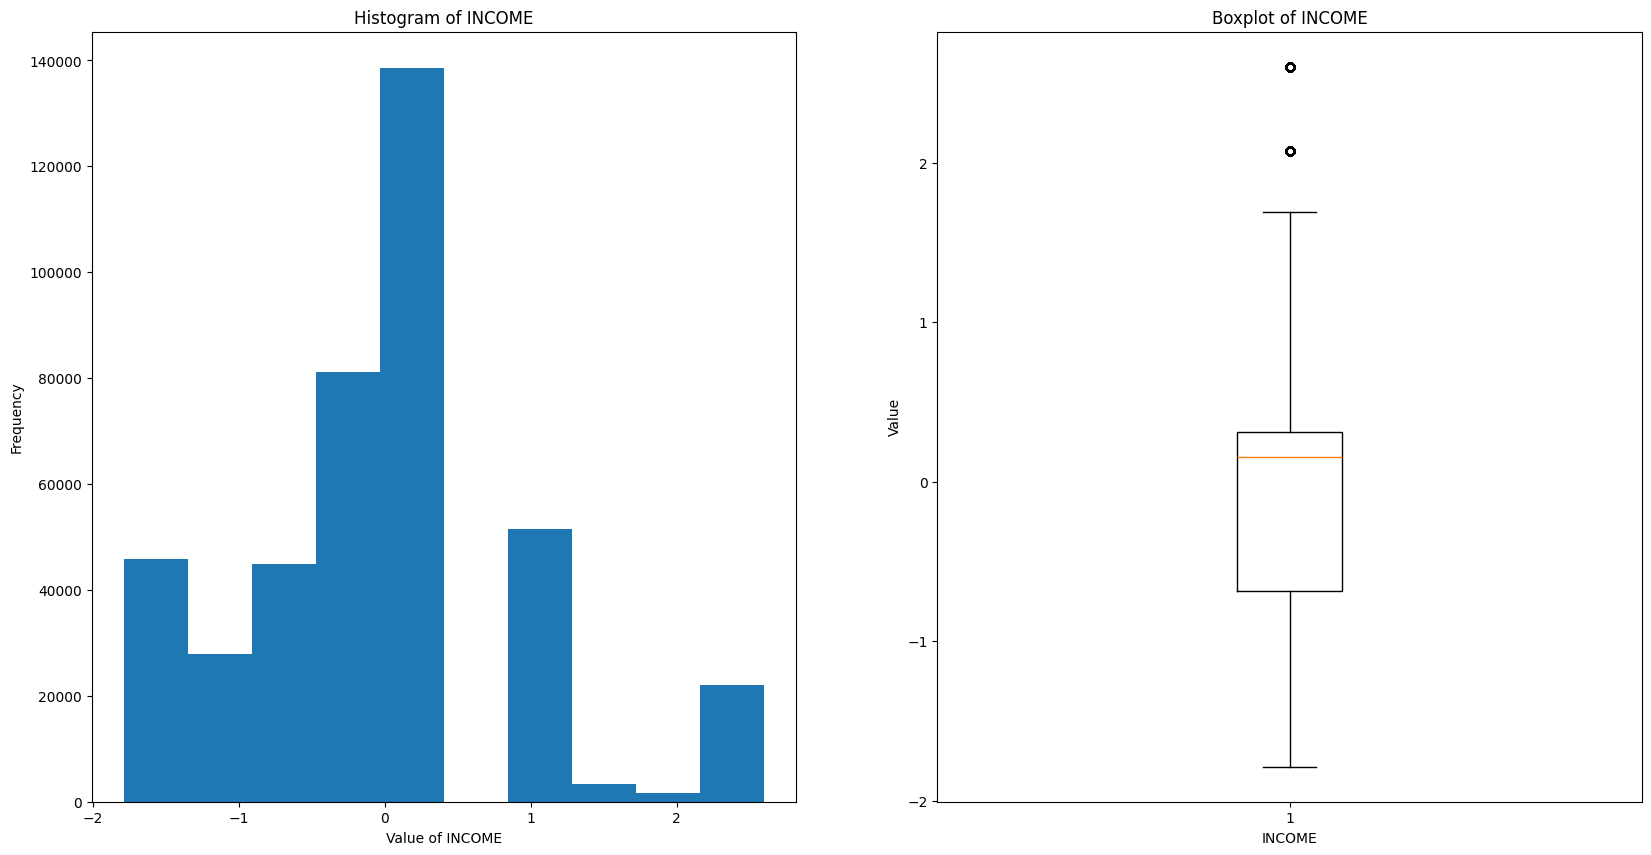

Number of Outliers: 23697
Percentage of Outliers 5.68%
Skewness: 0.5287363845391065
Kurtosis: 0.7184640037825778
Shapiro: 0.9338779791058391 | p_value: 2.6196939847817143e-128 

******************************************************************************************************************************************************
LENGTH_OF_RESIDENCE:


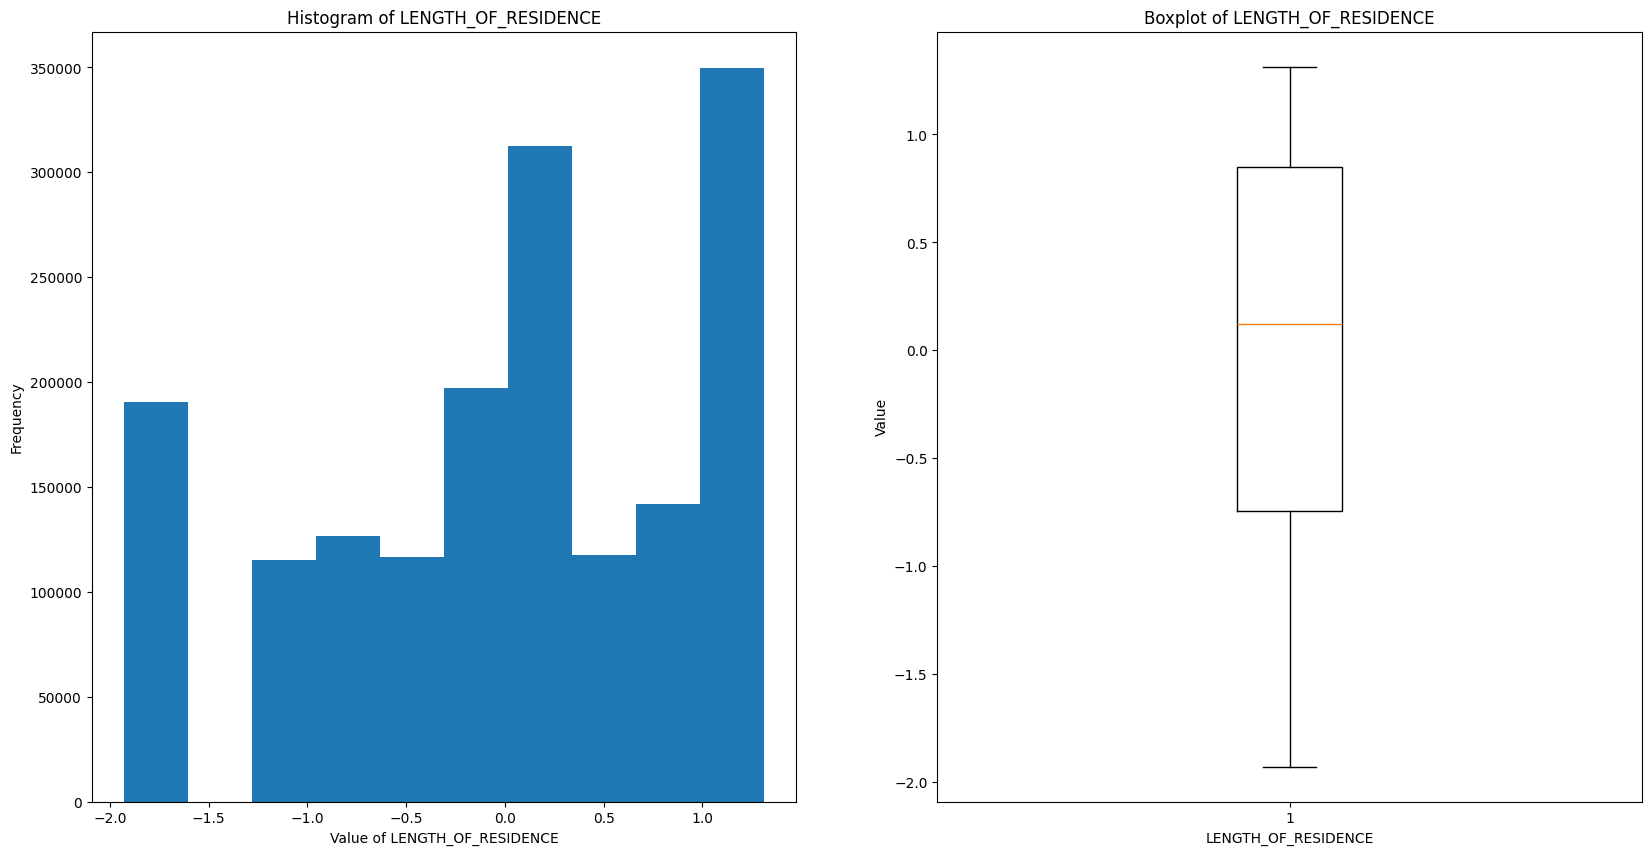

Number of Outliers: 0
Percentage of Outliers 0.0%
Skewness: -0.4445953742816458
Kurtosis: -0.6648705919971616
Shapiro: 0.9231622515282526 | p_value: 3.894614831409988e-151 



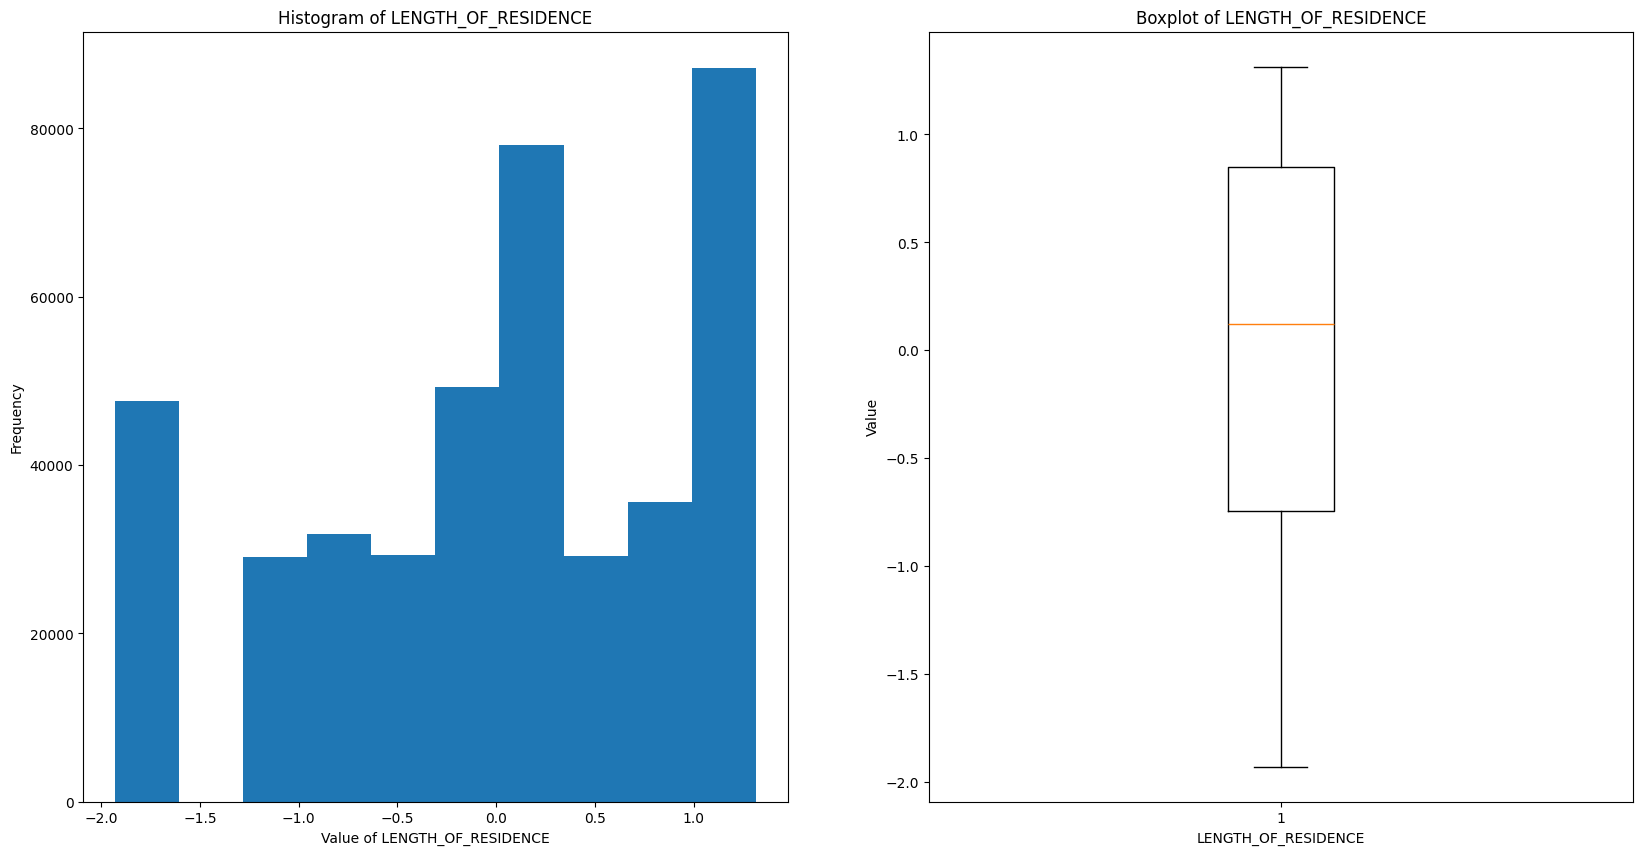

Number of Outliers: 0
Percentage of Outliers 0.0%
Skewness: -0.4413058805843751
Kurtosis: -0.6673230509261003
Shapiro: 0.9234464839549238 | p_value: 1.0694183870085302e-132 

******************************************************************************************************************************************************
COLLEGE_DEGREE:


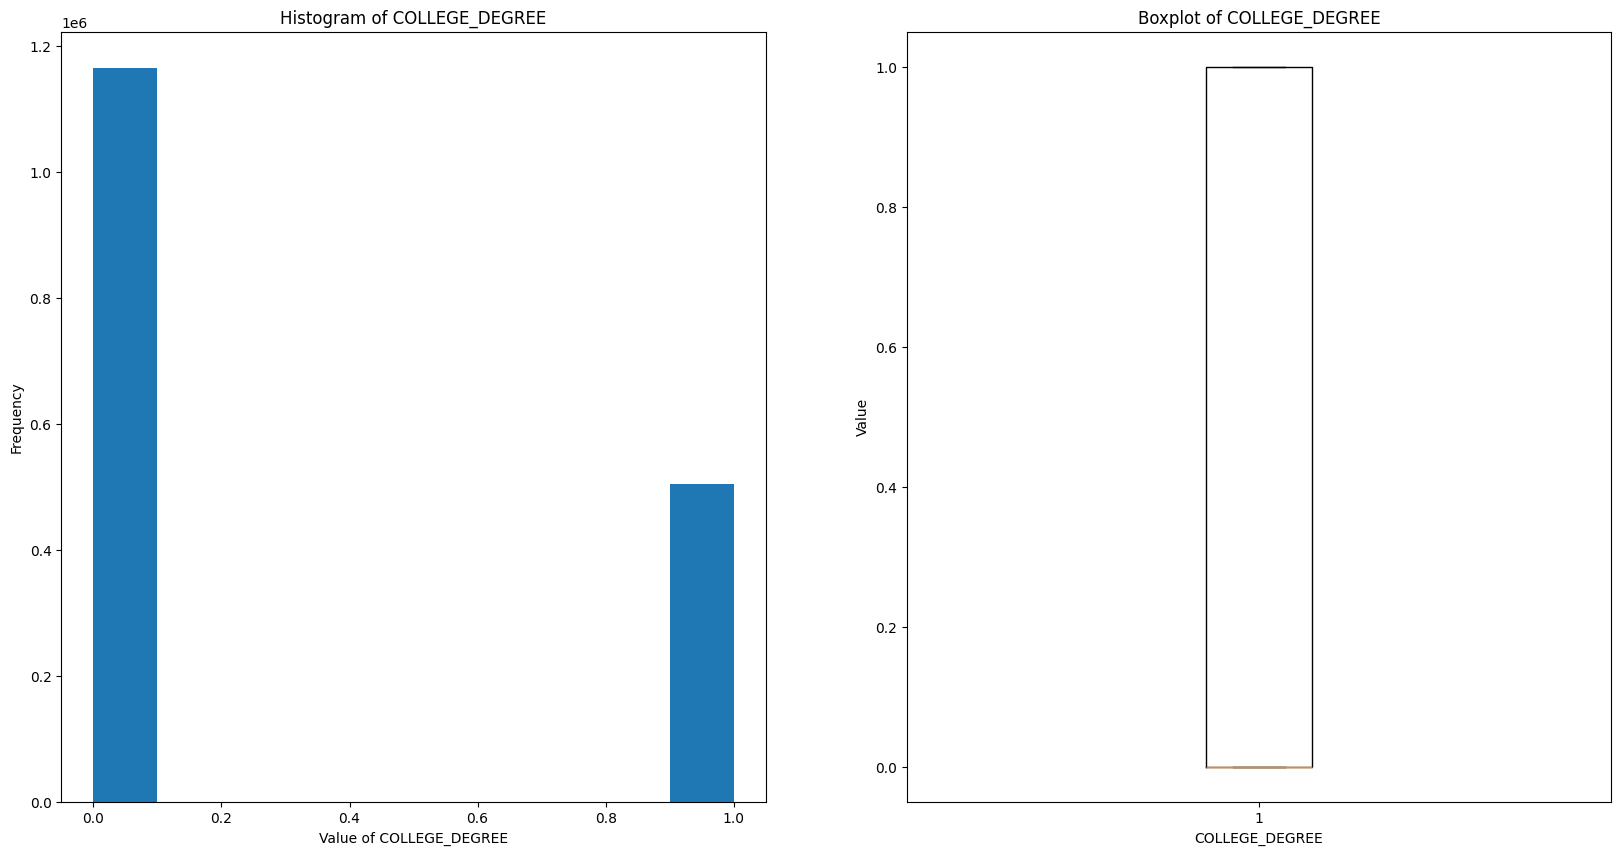

Number of Outliers: 0
Percentage of Outliers 0.0%
Skewness: 0.8615071652353637
Kurtosis: -1.2578054042481284
Shapiro: 0.5770624943650406 | p_value: 2.879191250257622e-211 



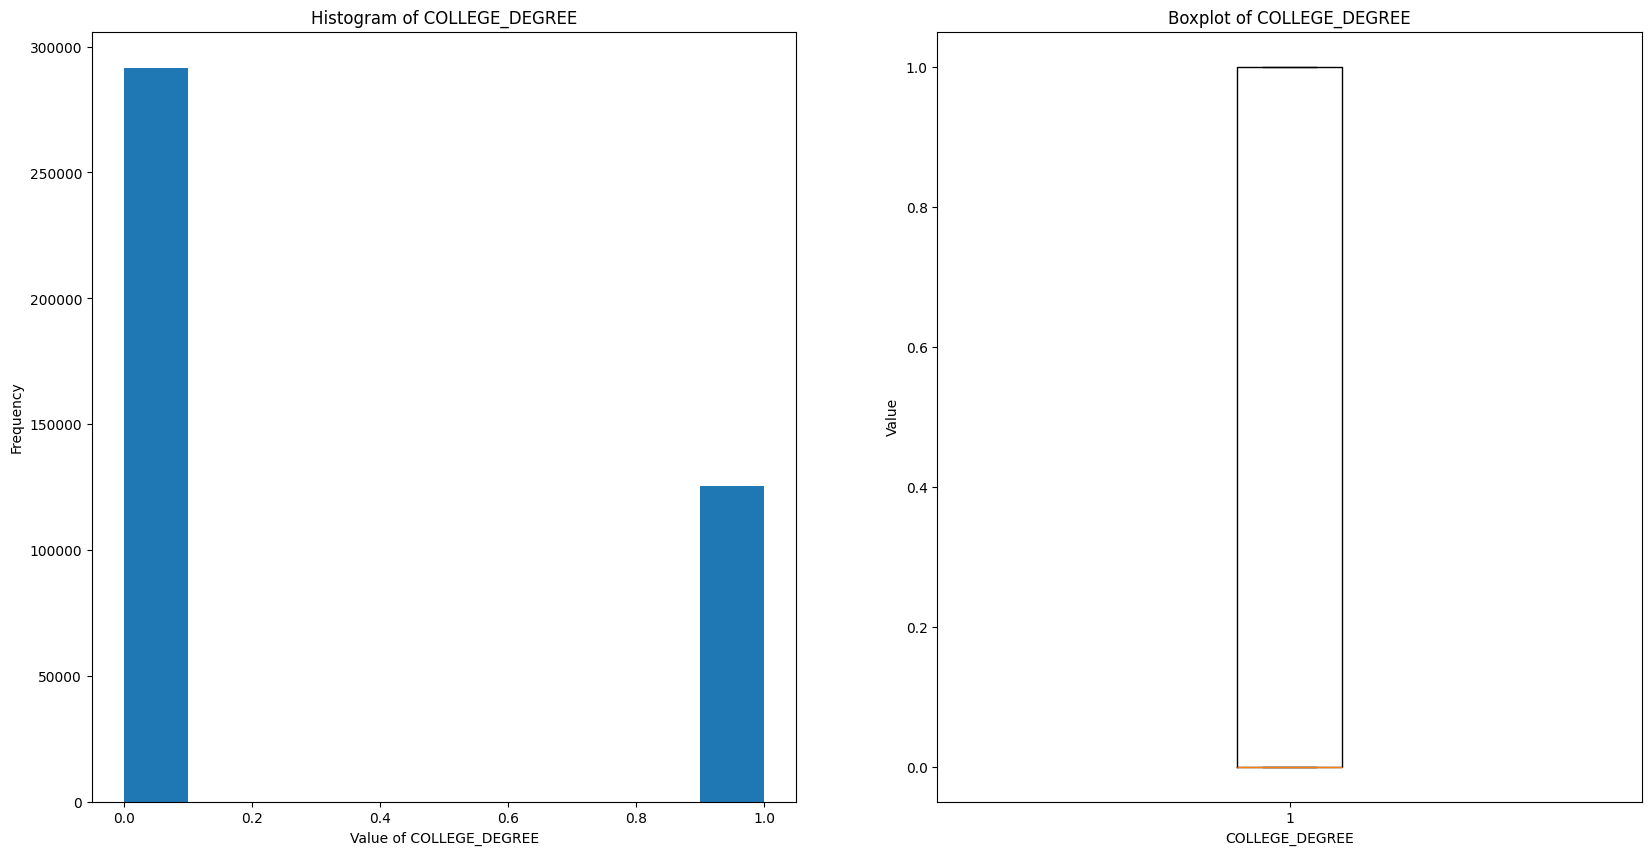

Number of Outliers: 0
Percentage of Outliers 0.0%
Skewness: 0.8667334584617753
Kurtosis: -1.2487731119828898
Shapiro: 0.576422558414939 | p_value: 1.6857027481518556e-189 

******************************************************************************************************************************************************
DATE_OF_BIRTH:


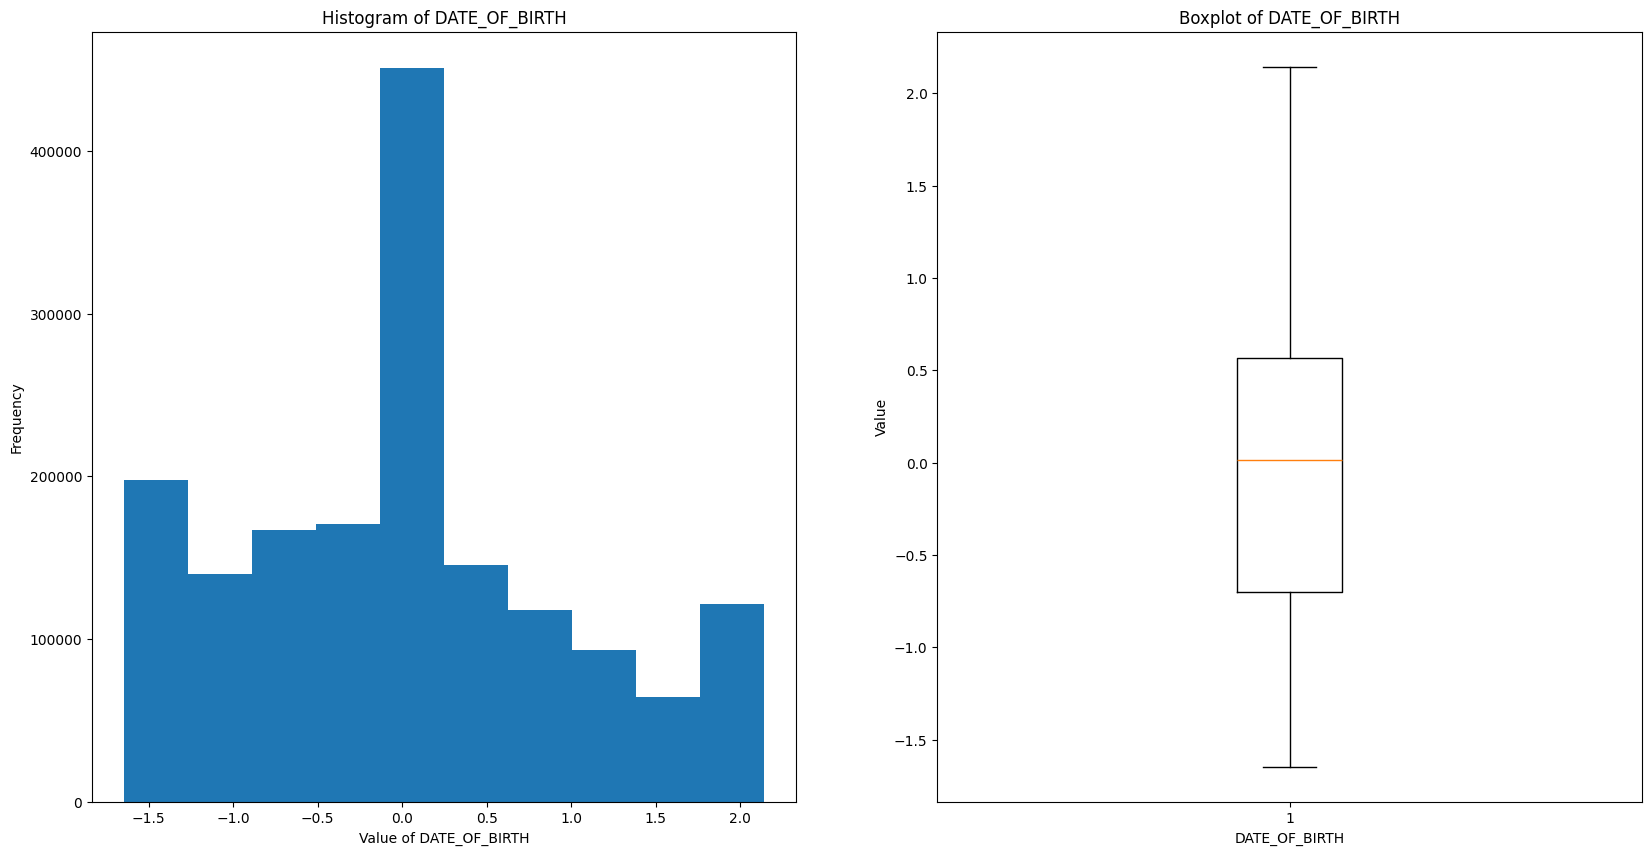

Number of Outliers: 0
Percentage of Outliers 0.0%
Skewness: 0.35599829455929644
Kurtosis: -0.3565266445983877
Shapiro: 0.9561613818647833 | p_value: 1.4300886988262938e-133 



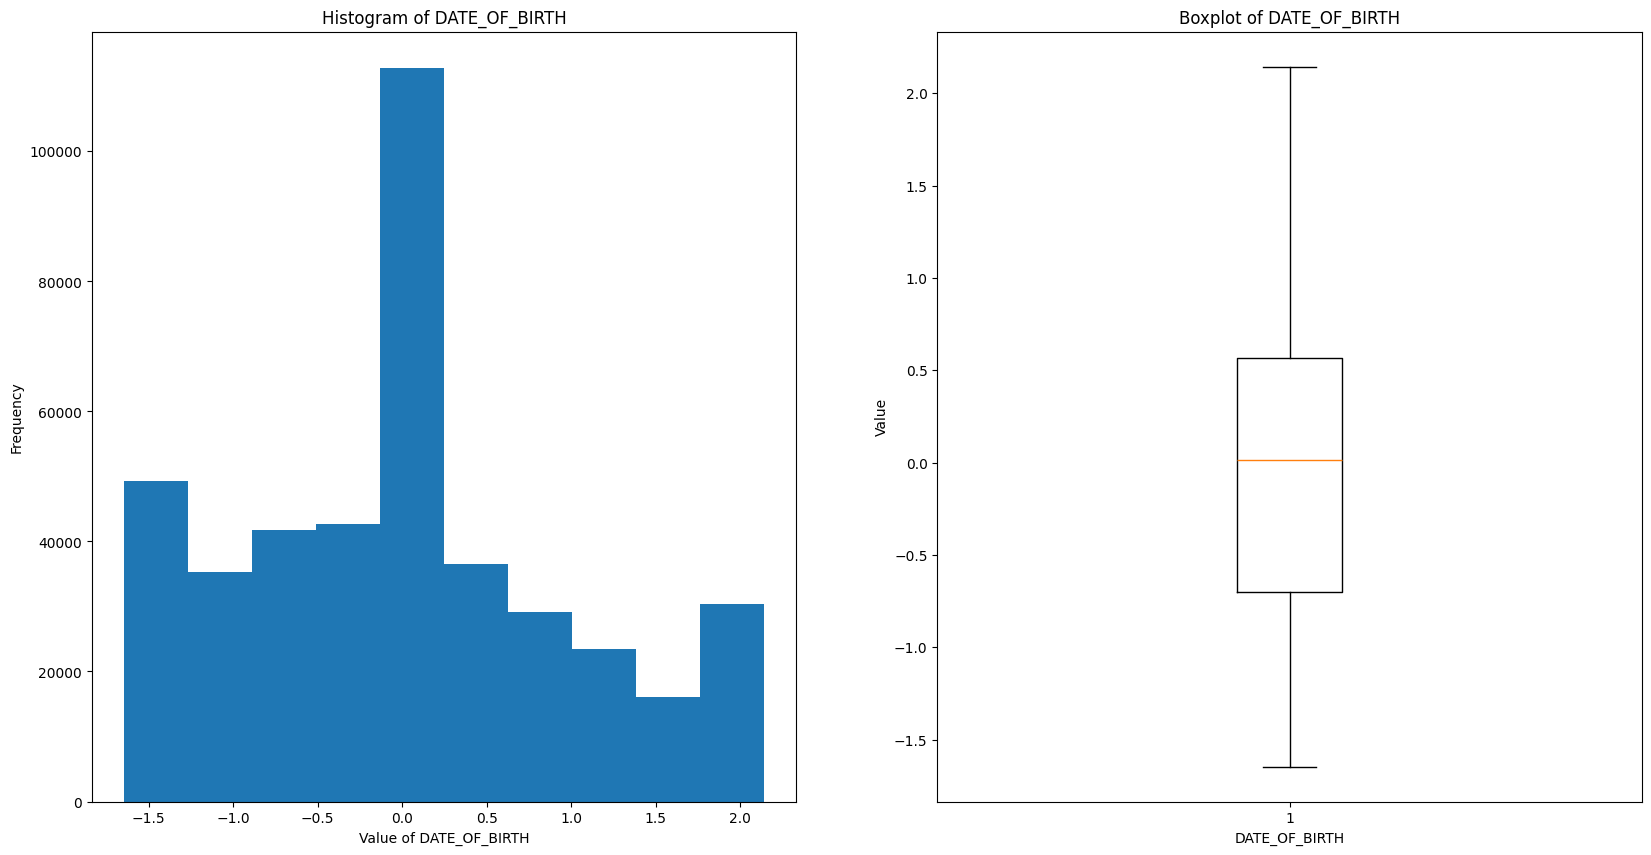

Number of Outliers: 0
Percentage of Outliers 0.0%
Skewness: 0.3567820009122592
Kurtosis: -0.35540490161361005
Shapiro: 0.9561424330531687 | p_value: 2.090994393683197e-116 

******************************************************************************************************************************************************
******************************************************************************************************************************************************
CUST_VALUE:


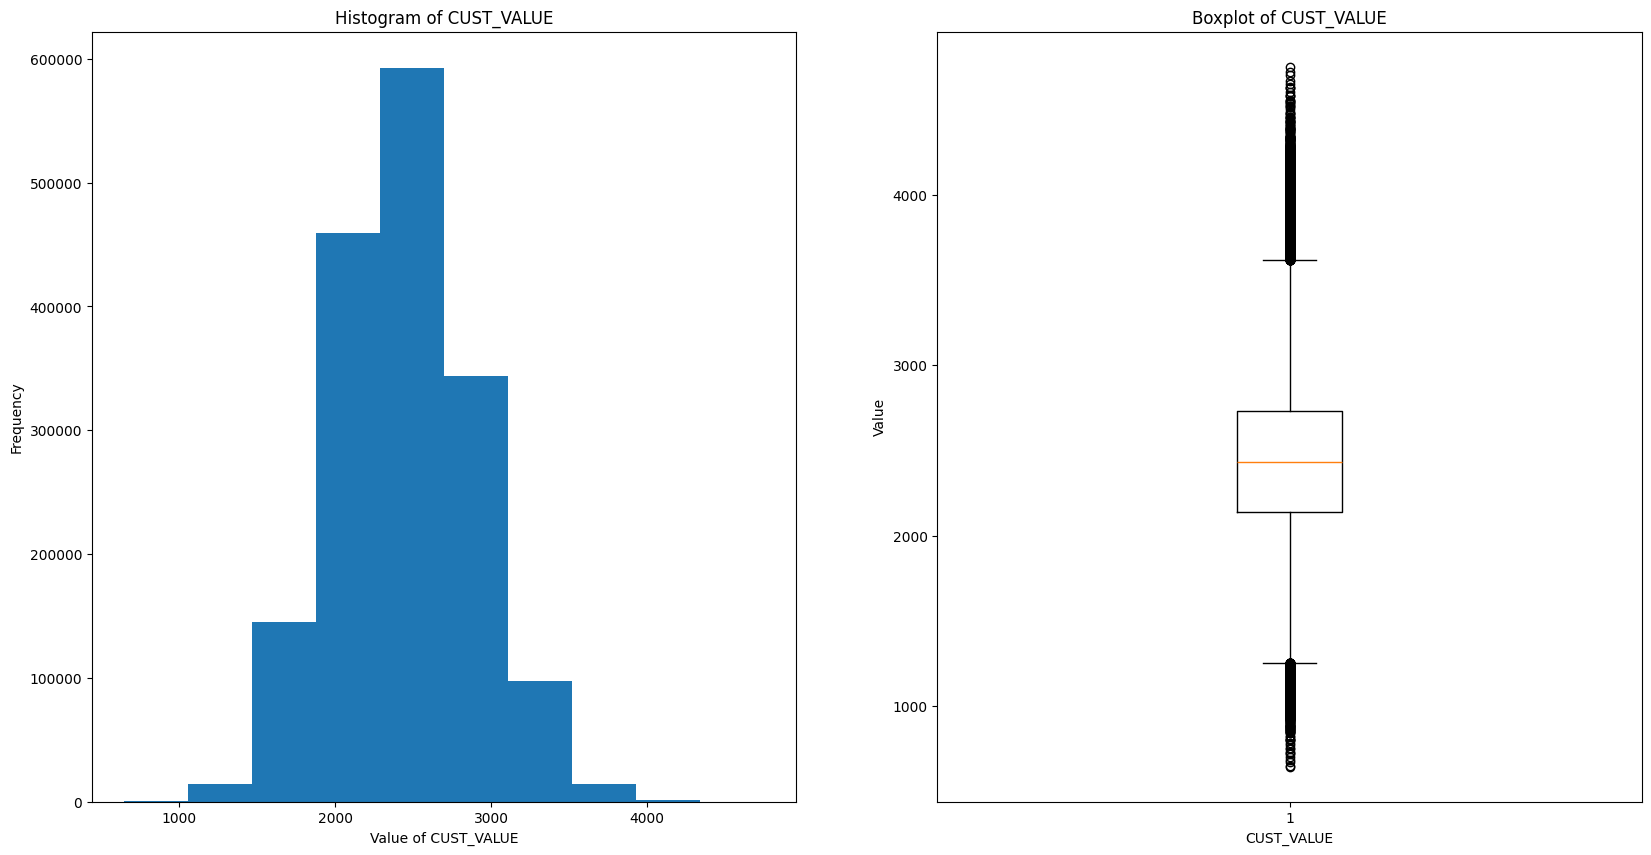

Number of Outliers: 11191
Percentage of Outliers 0.67%
Skewness: 0.16253474779873772
Kurtosis: -9.464034074424532e-05
Shapiro: 0.9984795246876188 | p_value: 2.3472785474075875e-51 



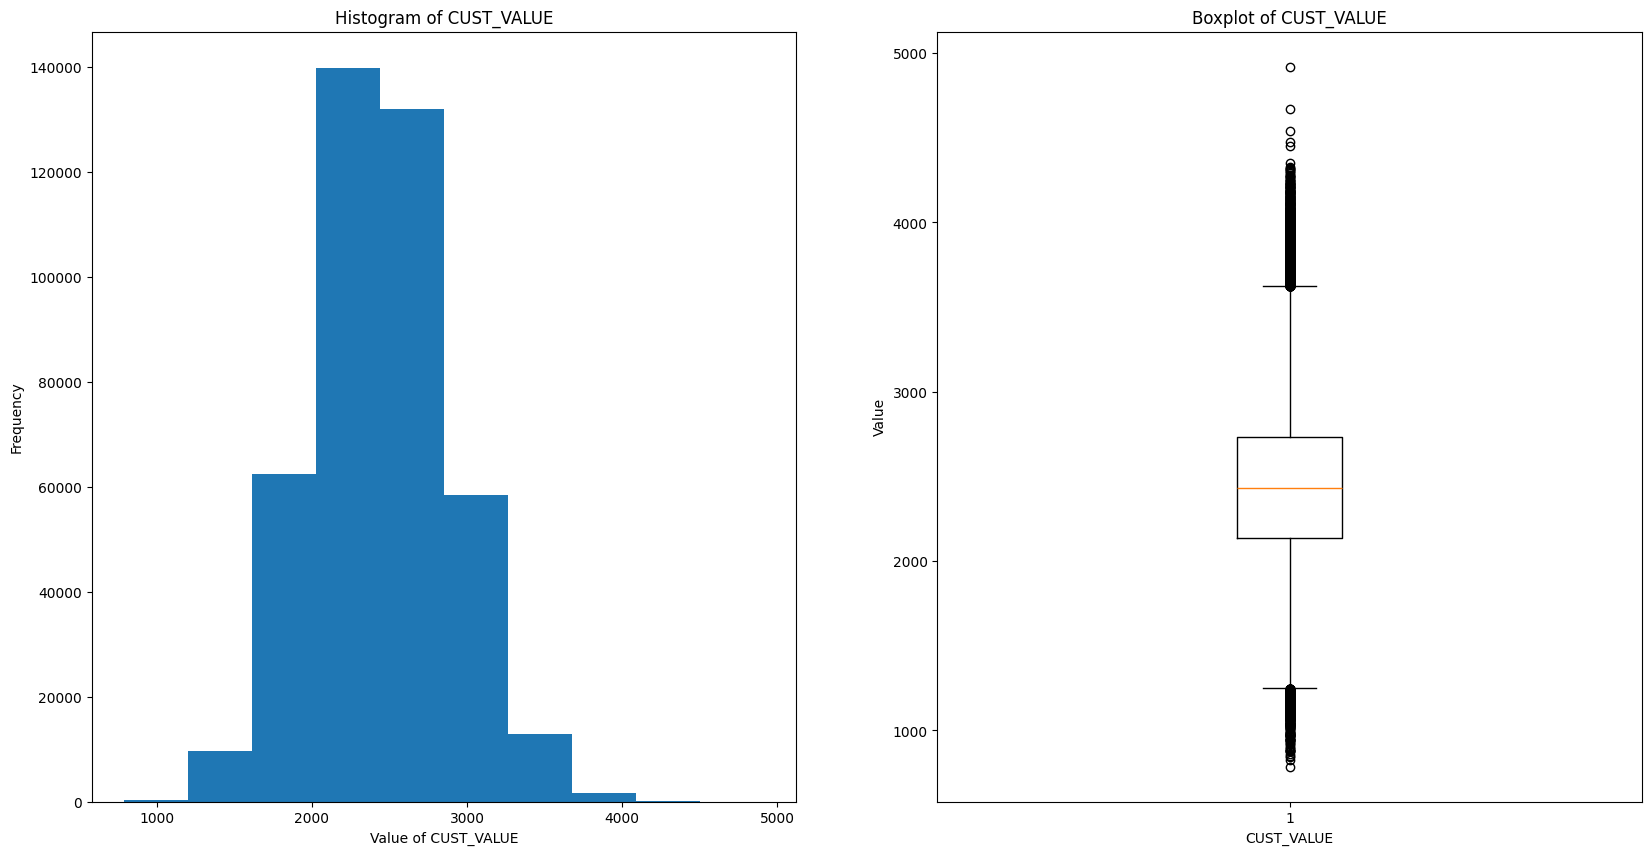

Number of Outliers: 2905
Percentage of Outliers 0.7%
Skewness: 0.16962691978499053
Kurtosis: -0.004704870579127718
Shapiro: 0.998334983491508 | p_value: 1.4323314311847858e-42 



In [28]:
# Divide dataset into train and test
train_set, test_set = train_test_split(df_value_baseline_scaled, test_size=0.2,
                                        random_state=random_seed)
train_y = train_set[["CUST_VALUE"]]
train_x = train_set.drop(columns="CUST_VALUE")
test_y = test_set[["CUST_VALUE"]]
test_x = test_set.drop(columns="CUST_VALUE")

# Minimal EDA to check if train and test sets have similar patterns
for col in [i for i in train_x.columns]:
    print("*" * 150 + f"\n{col}:")
    distribution(train_x[col])
    distribution(test_x[col])

print("*" * 150 + "\n" + "*" * 150 + "\nCUST_VALUE:")
distribution(train_y["CUST_VALUE"])
distribution(test_y["CUST_VALUE"])

# Same distributions between after train-test split

Selected features: Index(['INCOME', 'LENGTH_OF_RESIDENCE', 'COLLEGE_DEGREE'], dtype='object')
Feature ranking: [1 1 1 2]


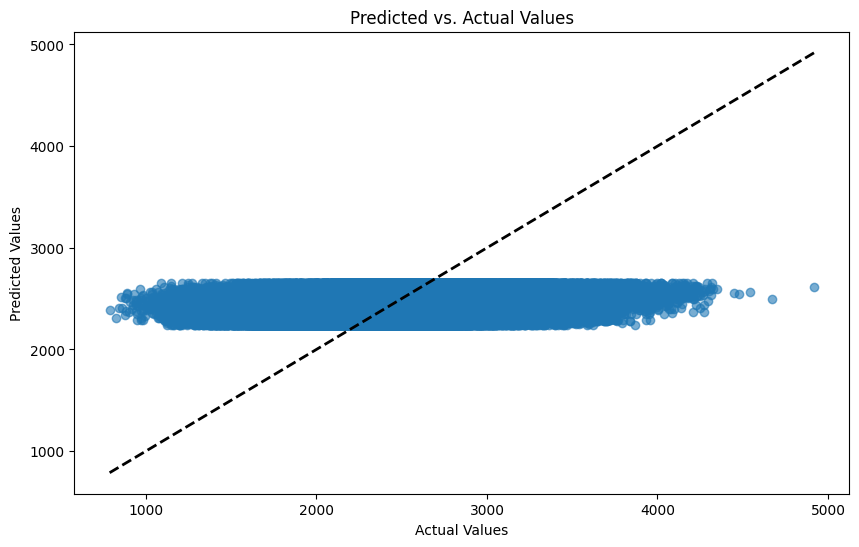

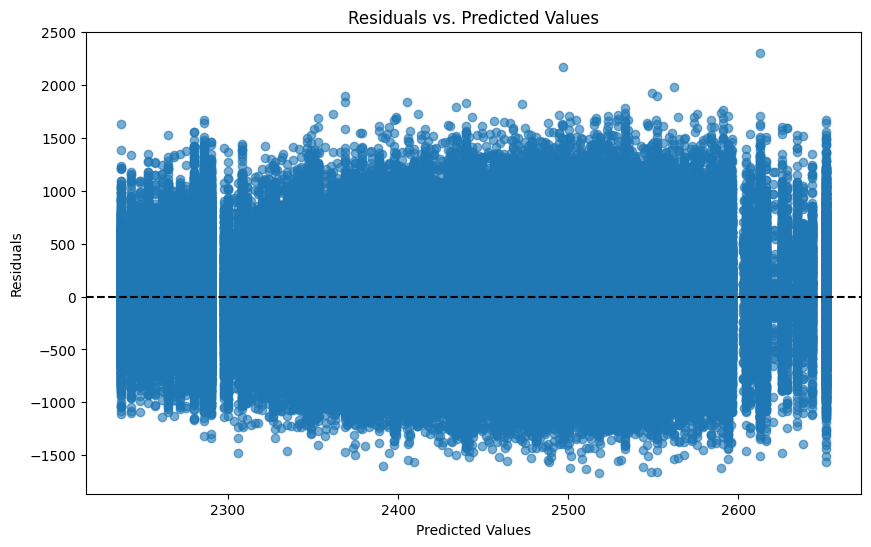

Mean Squared Error: 184797.1007057228


In [29]:
# Build the multiple linear model regression model using SGDRegressor, since stochastic gradient descent
# is more appropriate to the size of the data set. The cost function that will be used is the Mean-Squared Error
estimator = SGDRegressor(
    loss="squared_error",
    max_iter=200, 
    tol=1e-3, 
    penalty="l2", # penalty="l2" adds the Ridge regularization term
    eta0=0.1,   # learning rate of 0.1
    random_state=random_seed
)
# Use RFE to select best features
selector = RFE(estimator, n_features_to_select=3).fit(train_x, train_y)
train_x_selected = selector.transform(train_x)
test_x_selected = selector.transform(test_x)

print("Selected features:", train_x.columns[selector.support_])
print("Feature ranking:", selector.ranking_)

# Train the model with the best features
estimator.fit(train_x_selected, train_y.values.ravel())

# Plotting Predicted vs Actual Values
test_predictions = estimator.predict(test_x_selected)
plt.figure(figsize=(10, 6))
plt.scatter(test_y, test_predictions, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], "k--", lw=2)
plt.show()
# Plotting Residuals
residuals = test_y.values.ravel() - test_predictions
plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals, alpha=0.6)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

# Min cost obtained
mse = metrics.mean_squared_error(test_y, test_predictions)
print("Mean Squared Error:", mse)

#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance. (10 points)
The second model we will train is a multiple Polynomial model with degree 2, which will add more complexity than the multiple linear model trained for the baseline. For regularization, l2 will be used aswell. Since the underlying relationships identified in the EDA are the same, and since the vulnerabilities between the Linear and Polynomical model are similar, we can use the same features and same pre-processing, and then compare the final results. 

The only exceptions are:
 - The increase of selected features by the RFE, since the polynomial transformation increases the pool of features to choose from and because the goal of a Polynomial model is to add more complexity in the hopes that the added complexity captures more of the real-world relationships, so limiting the model to the same number of features as the previous linear model would not be a good decision.
 
 - The normalization of the scale after the polynomial features are computed (otherwise the higher polynomial degrees will have an advantage over the lower degreed base features).

In [30]:
train_set, test_set = train_test_split(df_value_baseline, test_size=0.2,
                                        random_state=random_seed)

train_y = train_set[["CUST_VALUE"]]
train_x = train_set.drop(columns="CUST_VALUE")
test_y = test_set[["CUST_VALUE"]]
test_x = test_set.drop(columns="CUST_VALUE")

degree = 2
poly_features = PolynomialFeatures(degree=degree)
train_x_poly = poly_features.fit_transform(train_x)
test_x_poly = poly_features.transform(test_x)
feature_names = poly_features.get_feature_names_out(input_features=train_x.columns)

scaler = StandardScaler()
train_x_poly = scaler.fit_transform(train_x_poly)
test_x_poly = scaler.fit_transform(test_x_poly)

Selected features: ['INCOME' 'INCOME^2' 'LENGTH_OF_RESIDENCE^2' 'COLLEGE_DEGREE^2'
 'DATE_OF_BIRTH^2']
Feature ranking: [11  1  6 10  3  1  8  5  9  1  7  2  1  4  1]


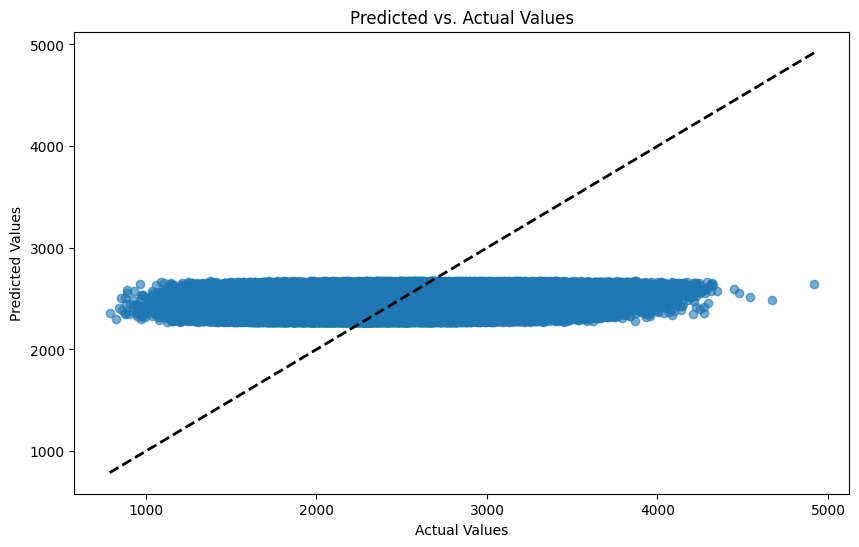

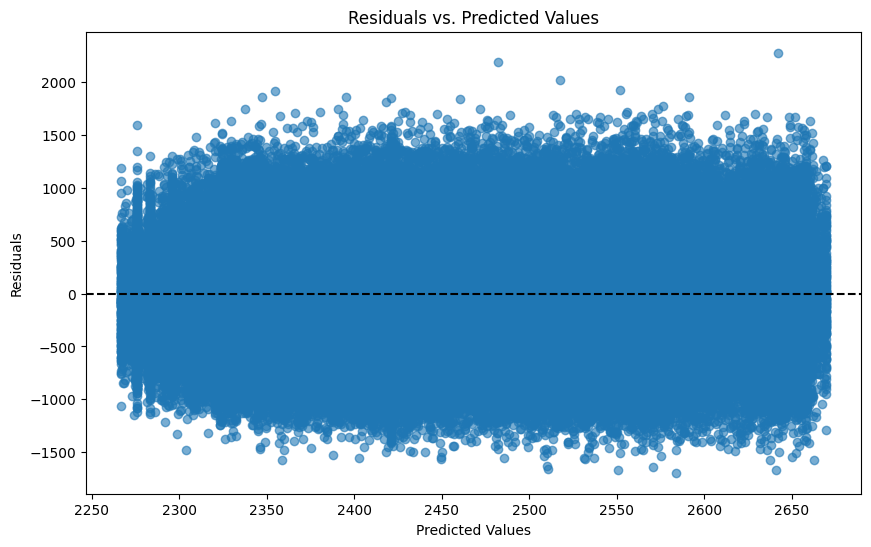

Mean Squared Error: 184310.1569974707


In [32]:
# Build the multiple linear model regression model using SGDRegressor, since stochastic gradient descent
# is more appropriate to the size of the data set. The cost function that will be used is the Mean-Squared Error
estimator = SGDRegressor(
    loss="squared_error",
    max_iter=200, 
    tol=1e-3, 
    penalty="l2", # penalty="l2" adds the Ridge regularization term
    eta0=0.1,   # learning rate of 0.1
    random_state=random_seed
)
# Use RFE to select best features
selector = RFE(estimator, n_features_to_select=5).fit(train_x_poly, train_y)    # Increase the number of selected features
train_x_selected = selector.transform(train_x_poly)
test_x_selected = selector.transform(test_x_poly)

print("Selected features:", feature_names[selector.support_])
print("Feature ranking:", selector.ranking_)

# Train the model with the best features
estimator.fit(train_x_selected, train_y.values.ravel())


# Plotting Predicted vs Actual Values
test_predictions = estimator.predict(test_x_selected)
plt.figure(figsize=(10, 6))
plt.scatter(test_y, test_predictions, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], "k--", lw=2)
plt.show()
# Plotting Residuals
residuals = test_y.values.ravel() - test_predictions
plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals, alpha=0.6)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

# Min cost obtained
mse = metrics.mean_squared_error(test_y, test_predictions)
print("Mean Squared Error:", mse)

del df_value_baseline, scaled_data, df_value_baseline_scaled, train_set
del test_set, train_y, train_x, test_y, test_x, estimator, selector
del train_x_selected, test_x_selected, test_predictions, residuals
del degree, poly_features, feature_names, scaler, train_x_poly, test_x_poly

#### Model Comparison:
Juding the outputs of both models, we can immediately identify that, despite following the correct steps in EDA and Feature Engeneering and Selection, as well as using the right Validation tools with Train, Test Split; both models obtained have very bad results. A big part of this, is because the raw data used to feed the models did not contain, according to the EDA outputs, many meaningful variables that could explain the annual insurance payments of customers. This is why in the plot comparing the predictions vs the actual values, a variation in the actual value is not accompanied by an accurate prediction, because the parameters were calculated based on variables that do not have very high correlations with the target variable.

Still, if we were to compare both models, we can observe that the second model obtained a MSE of 184310.1569974707, while the linear model obtained has a slightly higher MSE of 184797.1007057228. Therefore, the linear model was able to obtain a similar error in the test set, while it has a simpler model that will more likely also better fit additional data. Also, the polynomial model is must more sensitive to deviations from normality and multicollinearity effects, which are very hard to remove completely, than the linear model. So, even the slightly better results obtained by the polynomial model need to be taken with a grain of salt. For all these reasons, it is much more logical to use the linear model instead of the polynomial one.

#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

In a real world scenario where we would have to suggest a model for the marketing department, say, in order map out more accurately the value of current customers and the value of potential customers, with the goal of directing marketing efforts and optimizing the use of resources when investing in customer acquisition (e.g. discounts, man hours spent calling new customers, buying add space in media) or customer retention (e.g. contract renegotiations, discounts, offering of new products, loyalty plans), the Linear model would be the best option out of the two that were tested to the reasons laid out in the previous paragraph.

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)
The model goal is to predict the customers that will churn, which is a qualitative (categorical) variable. Therefore, this is a classification task. For the baseline model, we will train a Logistic Regression, using RSE to select the best features, out of a pool of manually selected features based on the correlations. But before we decide on the features pool, we need to repeat the some of the steps of the EDA, more specifically, drop problematic date rows and compute two new variables:
- drop rows where ORIG_DATE or SUSPD_DATE are greater than current time or SUSPD_DATE is before ORIG_DATE
- CUST_TIME - equal to the time of the customer with the company in days (SUSPD_DATE - CUST_ORIG_DATE)
- CUST_LEFT - 1 if there is a value for SUSPD_DATE and 0 if there isn't

After analyzing the correlations, it seems that all existing features in the data set have no significant relationship with customer churn, but the amount of days the customer has been with the company, with a correlation of -0.75. This indicates that we would obtain better results with we just build models with only one feature, so we will follow that procedure. However, it is important to recognize that there is some level of data leakage from the target variable CUST_CHURN to the input feature CUST_TIME, as some of the values of CUST_TIME are calculated based on an existing value of SUSPD_DATE, which has an equivalency logical connection with CUST_CHURN. But tests done show that only 90% of the dates were calculated involving the target variable logically, so the the data leakage should not compromise the model that much. 

Since Logistic Regression and SVM are fairly robust against non-normally distributted variables, the distribution of CUST_TIME won't be altered. However, they are sensitive to outliers, so these will be winsorized. Since the model will only have one variable, there is no need to normalize data nor to add a regularization component to the cost function.

In [33]:
# Drop inconsistent dates rows
temp_shape = df_merged.shape
df_merged = df_merged.loc[~(
    (df_merged["SUSPD_DATE"] > dt.datetime.now()) |
    (df_merged["CUST_ORIG_DATE"] > df_merged["SUSPD_DATE"])
)]
print("Number of dropped rows:", temp_shape[0] - df_merged.shape[0])

# Compute new variables
df_merged["CUST_CHURN"] = ~df_merged["SUSPD_DATE"].isna()
df_merged["CUST_TIME"] = np.nan

df_merged.loc[
    ~ df_merged["CUST_CHURN"], "CUST_TIME"
] = df_merged["CUST_ORIG_DATE"].apply(date_to_age)
df_merged.loc[
    df_merged["CUST_CHURN"], "CUST_TIME"
] = (df_merged["SUSPD_DATE"] - df_merged["CUST_ORIG_DATE"]).dt.days

display(df_merged[["SUSPD_DATE", "CUST_ORIG_DATE", "CUST_CHURN", "CUST_TIME"]])

del temp_shape

Number of dropped rows: 83807


,SUSPD_DATE,CUST_ORIG_DATE,CUST_CHURN,CUST_TIME
0,NaT,2018-12-09,False,6.00
1,NaT,2018-01-02,False,6.00
2,NaT,2009-09-23,False,15.00
4,NaT,2006-10-11,False,18.00
5,NaT,2021-08-05,False,3.00
...,...,...,...,...
2256875,NaT,2010-06-09,False,14.00
2256876,NaT,2022-08-14,False,2.00
2256877,NaT,2013-10-22,False,11.00
2256878,NaT,2016-04-28,False,8.00


count   2173073.00
mean        247.33
std        1046.21
min           0.00
25%           6.00
50%          13.00
75%          19.00
max        6745.00
Name: CUST_TIME, dtype: float64

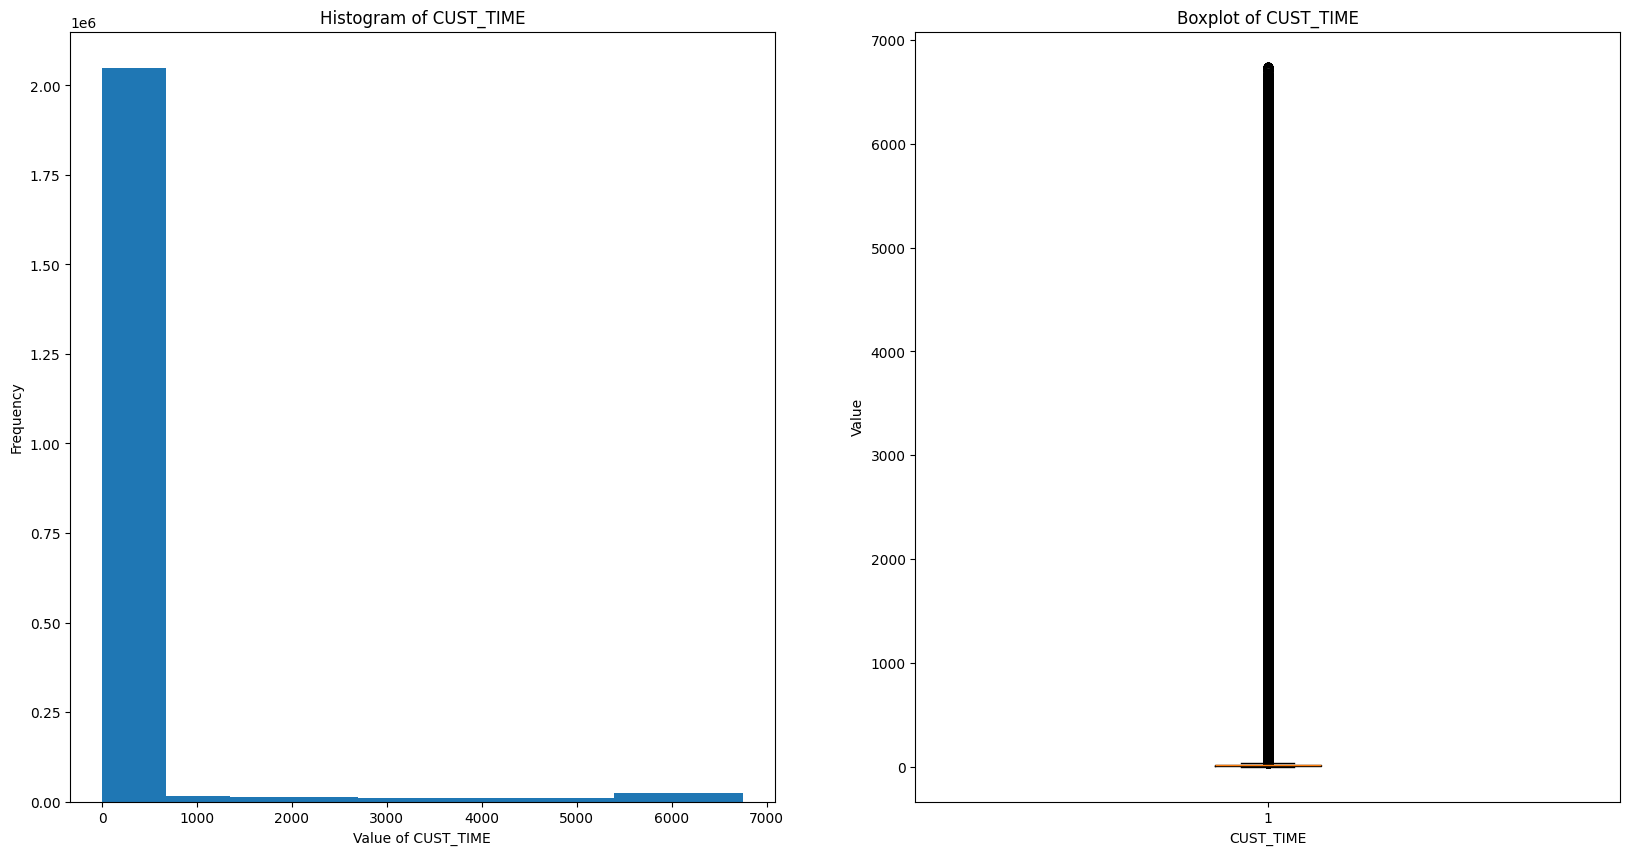

Number of Outliers: 167079
Percentage of Outliers 7.69%
Skewness: 4.751610515893015
Kurtosis: 21.85670565771392
Shapiro: 0.23736440441541418 | p_value: 6.390431378361251e-237 



,DATE_OF_BIRTH,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,CUST_CHURN,CUST_TIME
DATE_OF_BIRTH,1.00,0.08,0.04,0.08,-0.01,-0.16,0.28,0.11,-0.02,0.12,0.07,0.02,-0.03,-0.01,0.04
CURR_ANN_AMT_CAR,0.08,1.00,0.50,0.96,0.13,-0.00,0.19,0.12,0.02,0.12,0.10,0.05,0.04,0.01,0.01
CURR_ANN_AMT_HEALTH,0.04,0.50,1.00,0.48,0.07,-0.00,0.10,0.06,0.01,0.06,0.05,0.03,0.02,0.00,0.00
CURR_ANN_AMT_HOUSE,0.08,0.96,0.48,1.00,0.12,-0.00,0.18,0.12,0.02,0.12,0.10,0.05,0.04,0.01,0.01
INCOME,-0.01,0.13,0.07,0.12,1.00,0.06,0.06,0.25,0.28,0.15,0.12,0.24,0.37,-0.00,0.00
HAS_CHILDREN,-0.16,-0.00,-0.00,-0.00,0.06,1.00,0.03,0.17,-0.00,0.23,0.11,0.05,-0.06,0.01,-0.00
LENGTH_OF_RESIDENCE,0.28,0.19,0.10,0.18,0.06,0.03,1.00,0.19,-0.10,0.40,0.10,0.07,-0.02,-0.02,0.02
MARITAL_STATUS,0.11,0.12,0.06,0.12,0.25,0.17,0.19,1.00,0.05,0.27,0.08,0.08,0.11,0.00,0.01
HOME_MARKET_VALUE,-0.02,0.02,0.01,0.02,0.28,-0.00,-0.10,0.05,1.00,-0.08,0.05,0.08,0.12,-0.00,-0.00
HOME_OWNER,0.12,0.12,0.06,0.12,0.15,0.23,0.40,0.27,-0.08,1.00,0.19,0.15,-0.03,-0.01,0.01


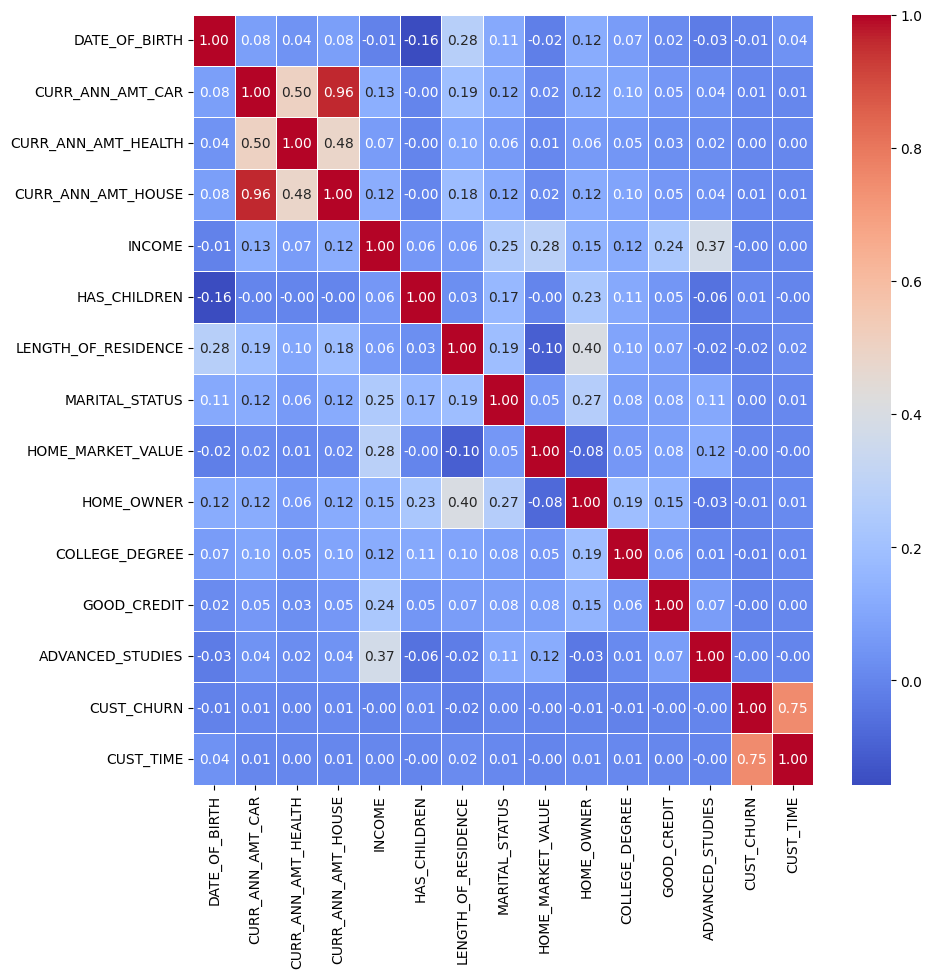

In [34]:
# Distribution of CUST_TIME
display(df_merged["CUST_TIME"].describe())
distribution(df_merged["CUST_TIME"])

# Correlation Matrix
df_corr = df_merged.drop(columns=[
    "INDIVIDUAL_ID", "ADDRESS_ID", "SOCIAL_SECURITY_NUMBER", "CUST_ORIG_DATE",
    "CUST_START_DATE", "SUSPD_DATE"
])

correlation_matrix = df_corr.corr()
display(correlation_matrix)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=.5, cbar=True)
plt.show()

del df_corr, correlation_matrix

In [35]:
# Quantify Data Leakage:
temp_n_row = df_merged["CUST_CHURN"].sum()
print("Number of Rows:", temp_n_row)
temp_p_row = round(100 * temp_n_row / df_merged.shape[0], 2)
print("Percentage of Rows:", str(temp_p_row) + "%")

del temp_n_row, temp_p_row

Number of Rows: 180164
Percentage of Rows: 8.29%


In [36]:
# Winsorizing outliers
df_churn_baseline = df_merged[["CUST_TIME", "CUST_CHURN"]].copy()

df_churn_baseline["CUST_TIME"] = winsorize(df_churn_baseline["CUST_TIME"],
                                         limits=[0.05, 0.05])
display(df_churn_baseline["CUST_TIME"].describe())

count   2173073.00
mean         94.72
std         325.63
min           2.00
25%           6.00
50%          13.00
75%          19.00
max        1447.00
Name: CUST_TIME, dtype: float64

******************************************************************************************************************************************************
CUST_TIME:


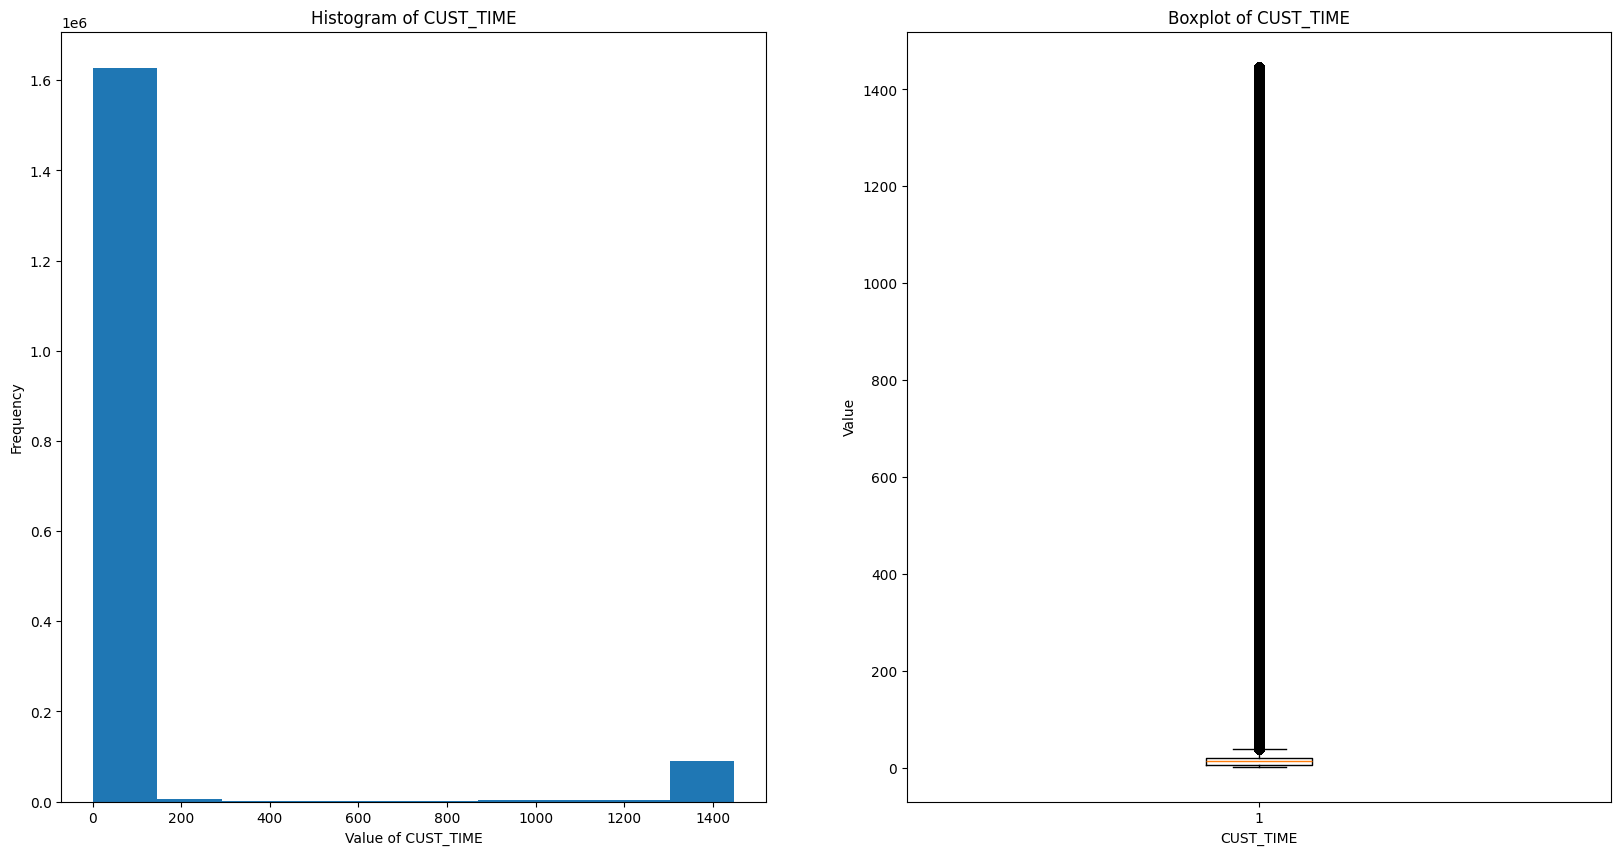

Number of Outliers: 133562
Percentage of Outliers 7.68%
Skewness: 3.807734537765668
Kurtosis: 12.68525554616098
Shapiro: 0.27468945082718366 | p_value: 7.845834570513391e-233 



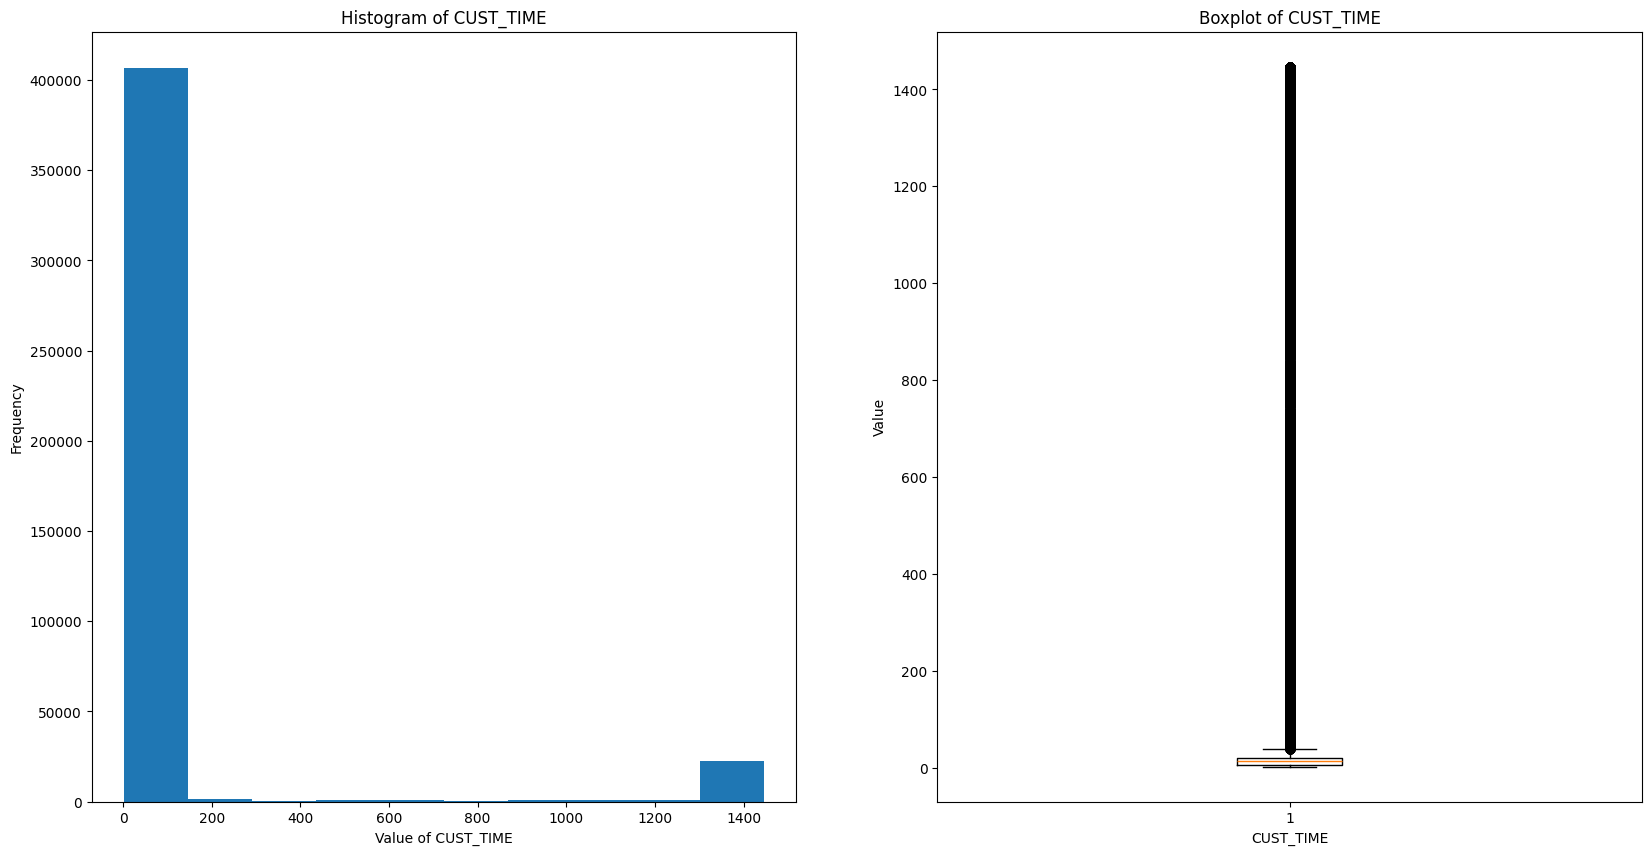

Number of Outliers: 33517
Percentage of Outliers 7.71%
Skewness: 3.801304337942714
Kurtosis: 12.635984567065913
Shapiro: 0.2752066934374616 | p_value: 2.4756940170859345e-210 

******************************************************************************************************************************************************
CUST_CHURN:


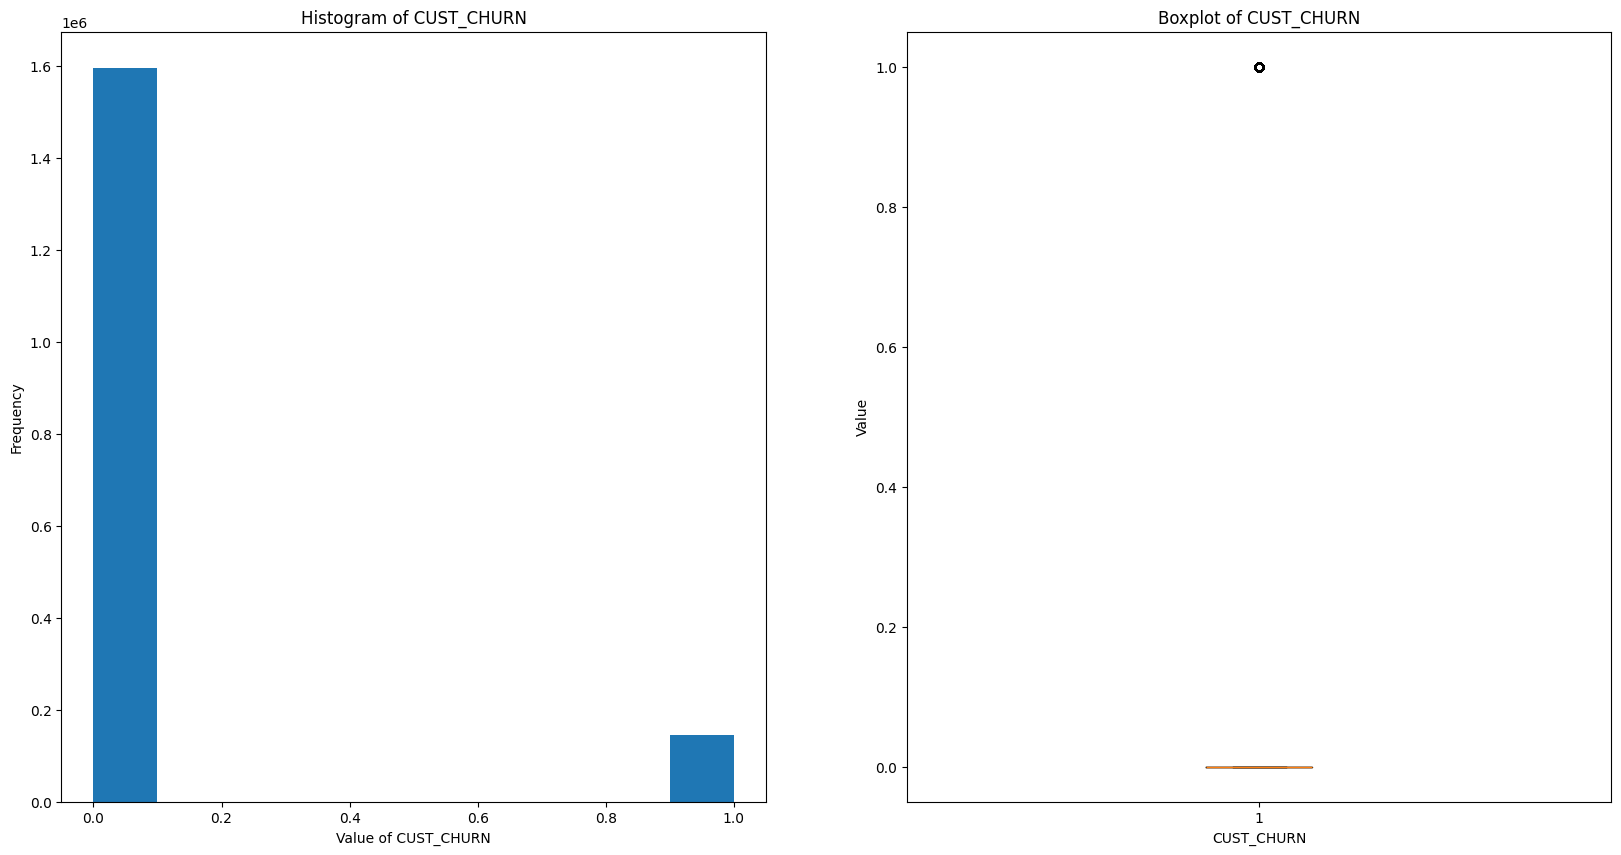

Number of Outliers: 143994
Percentage of Outliers 8.28%
Skewness: 3.027116906425453
Kurtosis: 7.163436765166802
Shapiro: 0.30658948653421436 | p_value: 4.9763084277946073e-231 



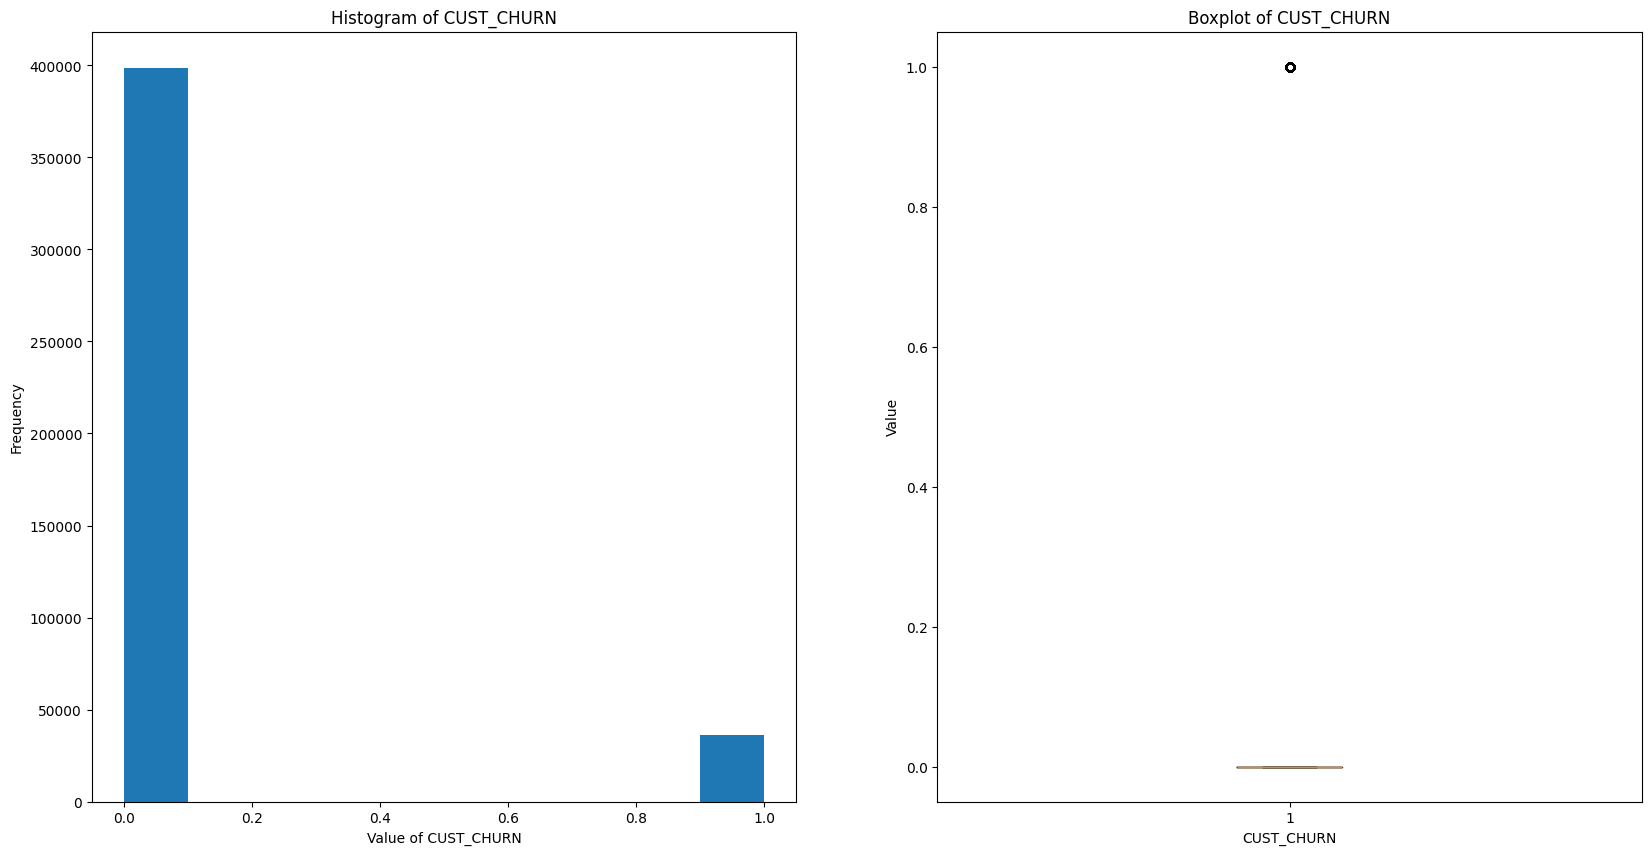

Number of Outliers: 36170
Percentage of Outliers 8.32%
Skewness: 3.0177268019850425
Kurtosis: 7.106675051418874
Shapiro: 0.3074567239080296 | p_value: 1.3385567624106552e-208 



In [37]:
# Divide dataset into train and test
train_set, test_set = train_test_split(df_churn_baseline, test_size=0.2,
                                        random_state=random_seed)
train_y = train_set[["CUST_CHURN"]]
train_x = train_set.drop(columns="CUST_CHURN")
test_y = test_set[["CUST_CHURN"]]
test_x = test_set.drop(columns="CUST_CHURN")

# Minimal EDA to check if train and test sets have similar patterns
print("*" * 150 + "\nCUST_TIME:")
distribution(train_x["CUST_TIME"])
distribution(test_x["CUST_TIME"])

print("*" * 150 + "\nCUST_CHURN:")
# Need to temporarily convert bools to numerical (1 and 0)
distribution(train_y["CUST_CHURN"].apply(lambda x: 1 if x else 0))
distribution(test_y["CUST_CHURN"].apply(lambda x: 1 if x else 0))

# Same distributions between after train-test split

Precision: 0.9945609520665754
Recall: 0.9945284907331776
Accuracy: 0.9945284907331776
F1-Score: 0.9660101197793087


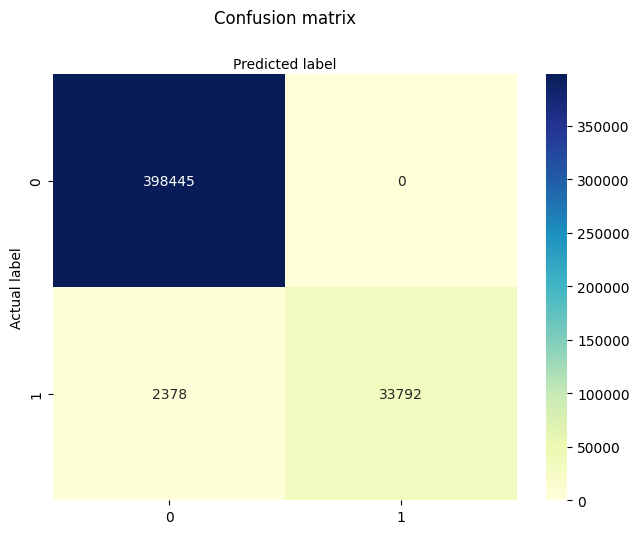

In [38]:
# Build the Logistic Regression model. Even though our dataset is big, because we are only using one feature there is no need for SGD.
lr = LogisticRegression(
    solver = "lbfgs",   # 'lbfgs' is better single feature models
    C=10,               # relatively relaxed regularization due to simplicity of our model and the large dataset
    max_iter = 500,     # can do more iterations due to simpler model
    random_state = random_seed 
)
lr.fit(train_x, train_y)

# To compute metrics must convert bool to int
test_predictions = lr.predict(test_x).astype(int)
test_y = test_y.astype(int)

# Model Evaluation
cnf_matrix = metrics.confusion_matrix(test_y, test_predictions, 
                                      labels=test_y["CUST_CHURN"].unique())
heatmap = sns.heatmap(pd.DataFrame(cnf_matrix, index=test_y["CUST_CHURN"].unique(),
                                    columns=test_y["CUST_CHURN"].unique()), 
                                    annot=True, cmap="YlGnBu" , fmt='g')
heatmap.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Precision:", metrics.precision_score(test_y, test_predictions, average='weighted'))
print("Recall:", metrics.recall_score(test_y, test_predictions, average='weighted'))
print("Accuracy:", metrics.accuracy_score(test_y, test_predictions))
print("F1-Score:", metrics.f1_score(test_y, test_predictions))

#### Q3.2 Build a second model and compare the model performance. (15 points)

For the second model, we will build a Support Vector Machine model using sklearn.svm. For the hyperparameters, the kernel should be linear due to the one input feature, making the class likely linearly seperable. The same regularization as the previous model, C=10, will be used for the same reason. Due to poor results in a first attempt, another SVM model using rbf kernel was attempted.

Precision: 0.006926081460519364
Recall: 0.0832230824983031
Accuracy: 0.0832230824983031
F1-Score: 0.15365825164353156


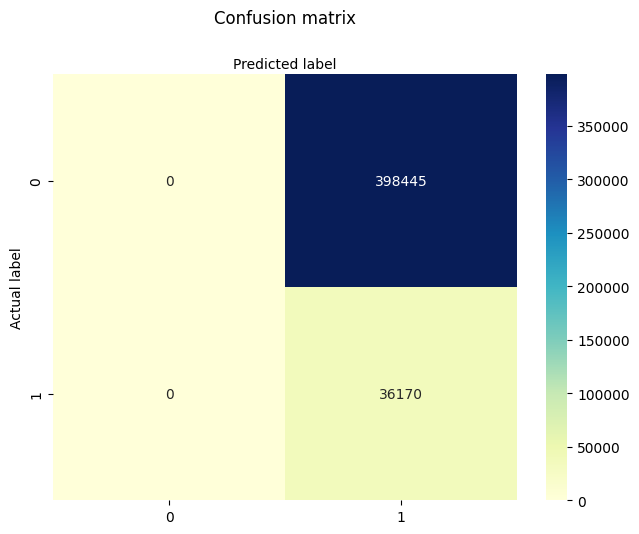

In [39]:
# Build the Logistic Regression model. Even though our dataset is big, because we are only using one feature there is no need for SGD.
svm_1 = svm.SVC(
    kernel = "linear",   
    C=10,   
    max_iter = 500,
    random_state = random_seed
)
svm_1.fit(train_x, train_y)

# To compute metrics must convert bool to int
test_predictions = svm_1.predict(test_x).astype(int)
test_y = test_y.astype(int)

# Model Evaluation
cnf_matrix = metrics.confusion_matrix(test_y, test_predictions, 
                                      labels=test_y["CUST_CHURN"].unique())
heatmap = sns.heatmap(pd.DataFrame(cnf_matrix, index=test_y["CUST_CHURN"].unique(),
                                    columns=test_y["CUST_CHURN"].unique()), 
                                    annot=True, cmap="YlGnBu" , fmt='g')
heatmap.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Precision:", metrics.precision_score(test_y, test_predictions, average='weighted'))
print("Recall:", metrics.recall_score(test_y, test_predictions, average='weighted'))
print("Accuracy:", metrics.accuracy_score(test_y, test_predictions))
print("F1-Score:", metrics.f1_score(test_y, test_predictions))

Precision: 0.9059520948756429
Recall: 0.657621112939038
Accuracy: 0.657621112939038
F1-Score: 0.2803279084951515


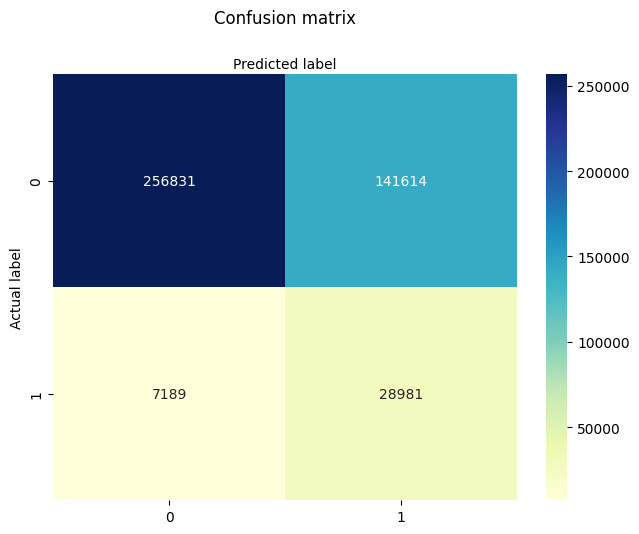

In [40]:
# Build the Logistic Regression model. Even though our dataset is big, because we are only using one feature there is no need for SGD.
svm_2 = svm.SVC(
    kernel = "rbf",   
    C=10,   
    max_iter = 500,
    random_state = random_seed
)
svm_2.fit(train_x, train_y)

# To compute metrics must convert bool to int
test_predictions = svm_2.predict(test_x).astype(int)
test_y = test_y.astype(int)

# Model Evaluation
cnf_matrix = metrics.confusion_matrix(test_y, test_predictions, 
                                      labels=test_y["CUST_CHURN"].unique())
heatmap = sns.heatmap(pd.DataFrame(cnf_matrix, index=test_y["CUST_CHURN"].unique(),
                                    columns=test_y["CUST_CHURN"].unique()), 
                                    annot=True, cmap="YlGnBu" , fmt='g')
heatmap.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Precision:", metrics.precision_score(test_y, test_predictions, average='weighted'))
print("Recall:", metrics.recall_score(test_y, test_predictions, average='weighted'))
print("Accuracy:", metrics.accuracy_score(test_y, test_predictions))
print("F1-Score:", metrics.f1_score(test_y, test_predictions))

#### Model Comparison:
By comparing the models metrics - Precision, Recall, Accuracy and F1-Score - we can observe the logistic regression is better all round than the SVM models trained. There was however a major improvement in the second SVM when the kernel was changed to rbf instead of linear, indicating that the relationship between the customer churn and the customer time at the company was not as linear as initially proposed.

For a theoretical breakdown of the statistics computed, the Precision is the ratio of correct classifications out of all positive classifications, the Recall is the ratio of correct classifications out of all true classifications, the Accuracy is the ratio of all True Classifications (positive or negative) with all the observations and the F1-Score is calculated as the harmonic mean betweenn the Precision and the Recall, being useful in cases of class imbalance in the dataset (like our case) and giving priority to assessing the performance in limiting False Positives and Negatives (which should be one of the priorities of our model, as explained in the next question).

Another thing to point out is that Logistic Regression usually does a good job in problems of classification that are either binary or multiclass with low number that are robust in nature, working well in models with low dimensionality, large sample size and some level of linear seperability. This would explain the superior performance, as SVM models are more characterised by their efficiency, versatility and well match with high-dimensionality and non-linear problems.

#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

Let us consider this hypothetical scenario. The head of marketing provided the dataset with the objective of tackling the insurance company's biggest problem: a growing trend in customer churn without a clear explanation. In that sense, he collected as much data as possible about the customers of the company, in order for us to find the variables that identify customers at risk of churing in the near future. THe marketing head wants to identify these customers, because he wants to effectively spend his marketing budget into reversing this trend and retaining as much as possible market share.

Some examples of policies that the marketing head might implement with out model would be loyalty programs offering discounts to specific clients that have been with the company for a lot of time, or expand the insurance coverage for no additional cost, etc. Of course, measures like this are expensive and would end up profit if implemented blindly, so, a classification model would allow the marketing head to offer these deals to customers that really are in the verge of churning.

In that sense, the model we should apply to this scenario should be the Logistic Regression, not only because it is a better model by all metrics, but specially because it has great Recall, Precision and F1-Score, meaning that the model is particularly good at avoiding False Positives that would lead the Marketing Department  to spend moeny on a person that wasn't going to leave the company, but also False Negatives, causing a customer to churn without giving the Marketing Department the chance to offer them better deals to retain the customer.